## **Problem Statement**
### **Perform clustering (Hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.**
### Draw the inferences from the clusters obtained.
+ Clustering analysis is an unsupervised learning method that separates the data points into several specific bunches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense.

+ It comprises of many different methods based on different distance measures. E.g. K-Means (distance between points), Affinity propagation (graph distance), Mean-shift (distance between points), DBSCAN (distance between nearest points), Gaussian mixtures (Mahalanobis distance to centers), Spectral clustering (graph distance), etc.

+ Centrally, all clustering methods use the same approach i.e. first we calculate similarities and then we use it to cluster the data points into groups or batches. Here we will focus on the Density-based spatial clustering of applications with noise (DBSCAN) clustering method.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [ ]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Data display customization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

## **1) Case Summary**
East-West Airlines is trying to learn more about its customers. Key issues are their flying patterns, earning and use of frequent flyer rewards, and use of the airline credit card. The task is to identify customer segments via clustering. The file EastWestAirlines.xls contains information on 4000 passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar charactersitics for the purpose of targeting different segments for different types of mileage offers.

In [ ]:
# Importing dataset
data = pd.read_excel('/content/sample_data/EastWestAirlines.xlsx',sheet_name='data')

# Column rename.
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

#Set ID as Index Column
data.set_index('ID',inplace=True)
data

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
1     28143    0           1          1          1          174           
2     19244    0           1          1          1          215           
3     41354    0           1          1          1          4123          
4     14776    0           1          1          1          500           
5     97752    0           4          1          1          43300         
...     ...   ..          ..         ..         ..          ...           
4017  18476    0           1          1          1          8525          
4018  64385    0           1          1          1          981           
4019  73597    0           3          1          1          25447         
4020  54899    0           1          1          1          500           
4021  3016     0           1          1          1          0             

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
1     1            0                  0                7000                
2     2            0                  0                6968                
3     4            0                  0                7034                
4     1            0                  0                6952                
5     26           2077               4                6935                
...  ..           ..                 ..                 ...                
4017  4            200                1                1403                
4018  5            0                  0                1395                
4019  8            0                  0                1402                
4020  1            500                1                1401                
4021  0            0                  0                1398                

      Award  
ID           
1     0      
2     0      
3     0      
4     0      
5     1      
...  ..      
4017  1      
4018  1      
4019  1      
4020  0      
4021  0      

[3999 rows x 11 columns]

## **1.1 Data Description:**
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

+ ID --Unique ID

+ Balance--Number of miles eligible for award travel

+ Qual_mile--Number of miles counted as qualifying for Topflight status

+ cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

+ cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

+ cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

**Note:**

1 = under 5,000 2 = 5,000 - 10,000 3 = 10,001 - 25,000 4 = 25,001 - 50,000 5 = over 50,000

+ Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

+ Bonus_trans--Number of non-flight bonus transactions in the past 12 months

+ Flight_miles_12mo--Number of flight miles in the past 12 months

+ Flight_trans_12--Number of flight transactions in the past 12 months

+ Days_since_enrolled--Number of days since enrolled in flier program

+ Award--whether that person had award flight (free flight) or not

## **2. Data Exploration**
### **Descriptive Statistics**

In [ ]:
data.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03  3999.000000   3999.000000  3999.000000  3999.000000   
mean   7.360133e+04  144.114529    2.059515     1.014504     1.012253      
std    1.007757e+05  773.663804    1.376919     0.147650     0.195241      
min    0.000000e+00  0.000000      1.000000     1.000000     1.000000      
25%    1.852750e+04  0.000000      1.000000     1.000000     1.000000      
50%    4.309700e+04  0.000000      1.000000     1.000000     1.000000      
75%    9.240400e+04  0.000000      3.000000     1.000000     1.000000      
max    1.704838e+06  11148.000000  5.000000     3.000000     5.000000      

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count  3999.000000    3999.00000   3999.000000        3999.000000       
mean   17144.846212   11.60190     460.055764         1.373593          
std    24150.967826   9.60381      1400.209171        3.793172          
min    0.000000       0.00000      0.000000           0.000000          
25%    1250.000000    3.00000      0.000000           0.000000          
50%    7171.000000    12.00000     0.000000           0.000000          
75%    23800.500000   17.00000     311.000000         1.000000          
max    263685.000000  86.00000     30817.000000       53.000000         

       Days_since_enroll        Award  
count  3999.00000         3999.000000  
mean   4118.55939         0.370343     
std    2065.13454         0.482957     
min    2.00000            0.000000     
25%    2330.00000         0.000000     
50%    4096.00000         0.000000     
75%    5790.50000         1.000000     
max    8296.00000         1.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [ ]:
# different cc_miles have different max values.
# so, we want to check what values these columns can take

print('unique_cc1',data.cc1_miles.unique())
print('unique_cc2',data.cc2_miles.unique())
print('unique_cc3',data.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


## **2.1 Missing Values**

In [ ]:
# As a part of the Data cleansing we check the data for any missing/ na values
# null count for columns

null_count_col = data.isnull().sum().value_counts(ascending=False)

# null percentage for columns

null_percent_col = (data.isnull().sum() * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 0    11
dtype: int64 

Null Percentage for Columns:

 0.0    11
dtype: int64


In [ ]:
# null count for rows

null_count_row = data.isnull().sum(axis=1).value_counts(ascending=False)

# null percentage for rows

null_percent_row = (data.isnull().sum(axis=1) * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    3999
dtype: int64 

Null Percentage for Rows:

 0.0    3999
dtype: int64


## **Duplicated Values**
### **print the duplicated rows**

In [ ]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
data.duplicated().sum()

1

In [ ]:
data[data.duplicated()]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
3899  1000     0           1          1          1          0             

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
3899  0            0                  0                1597                

      Award  
ID           
3899  0

In [ ]:
data=data.drop_duplicates().reset_index()
data[data.duplicated()]


Empty DataFrame
Columns: [ID, Balance, Qual_miles, cc1_miles, cc2_miles, cc3_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12, Days_since_enroll, Award]
Index: []

### **Observation: There are duplicated values in the dataset**
+ Hence, we dropped those values

## **3. Exploratory Data Analysis**

**Lets analyze the features by creating histograms to understand the distributio**n

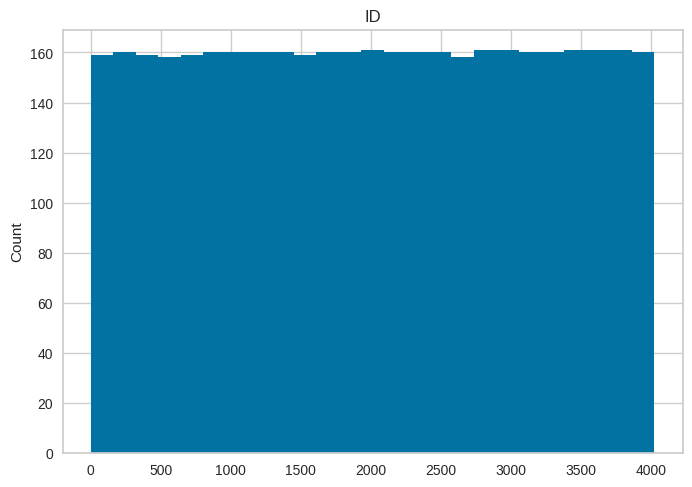

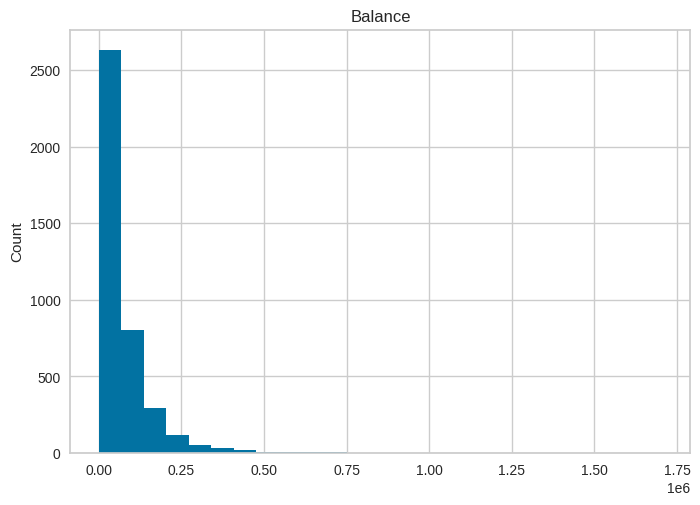

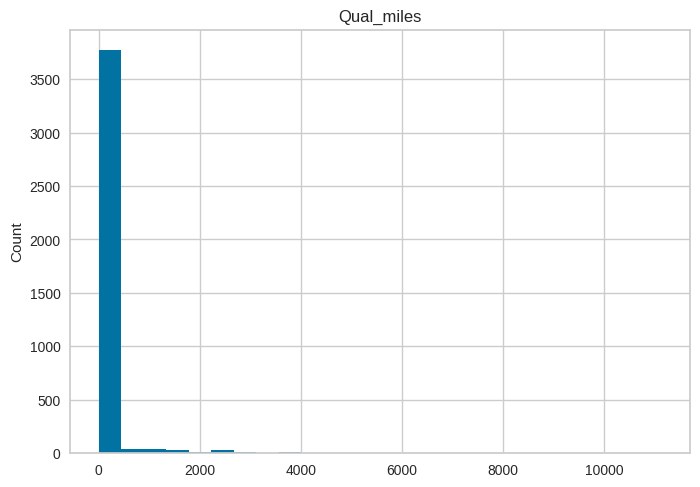

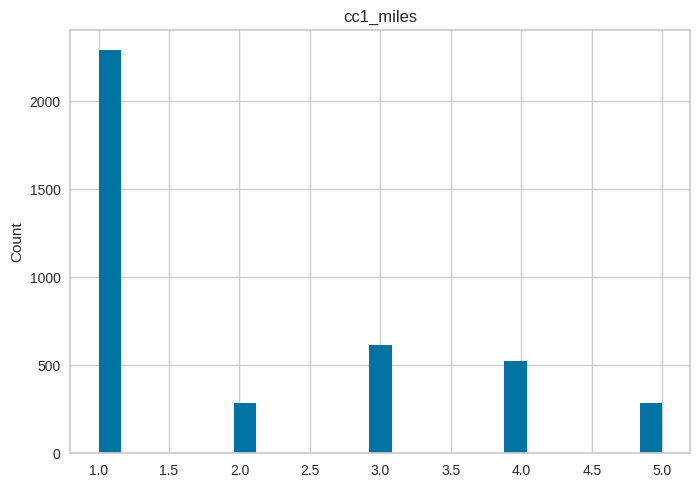

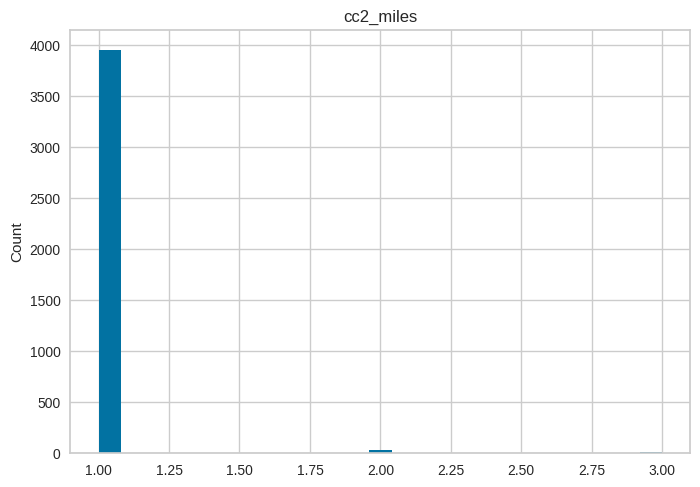

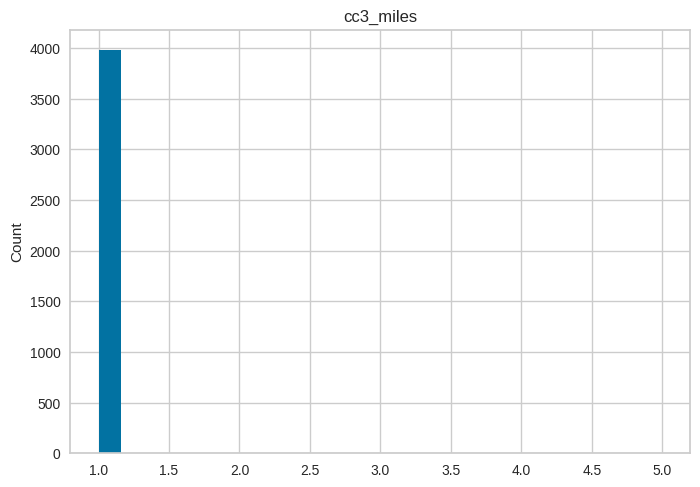

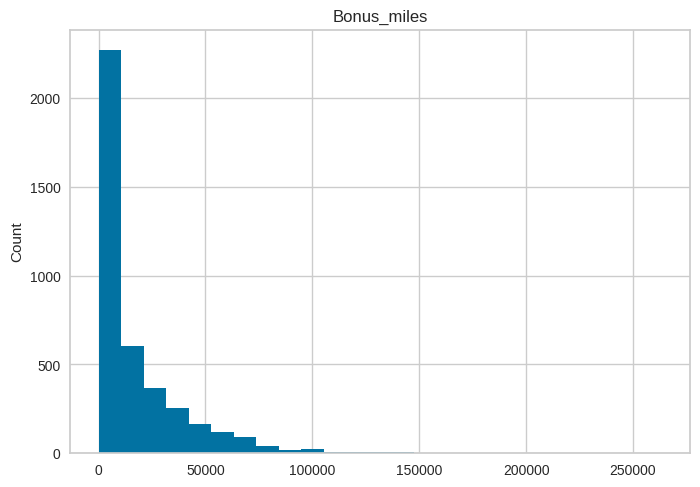

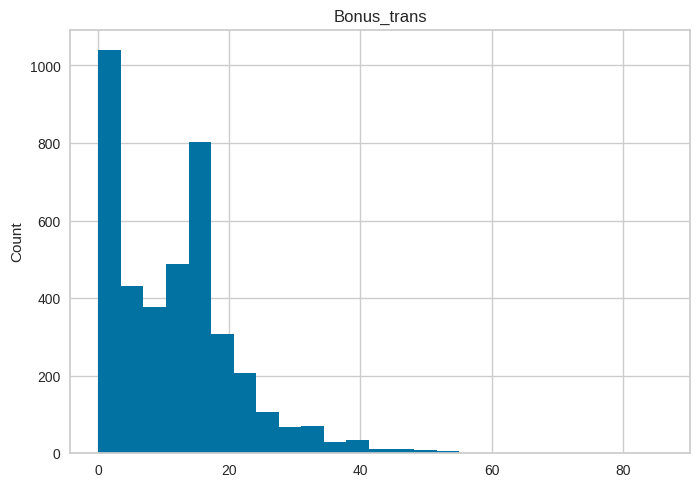

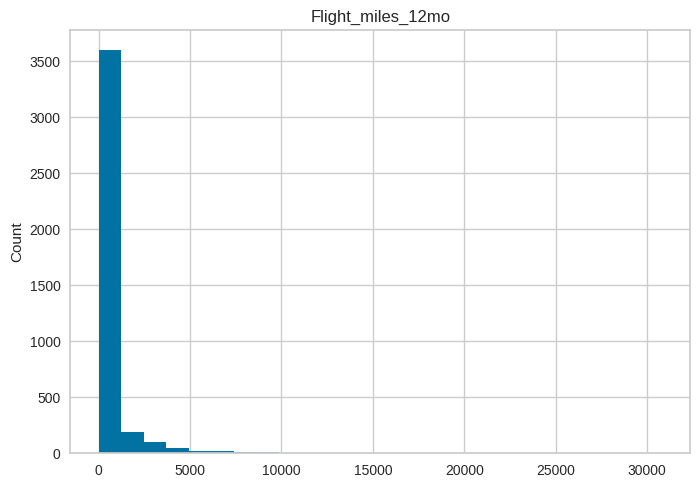

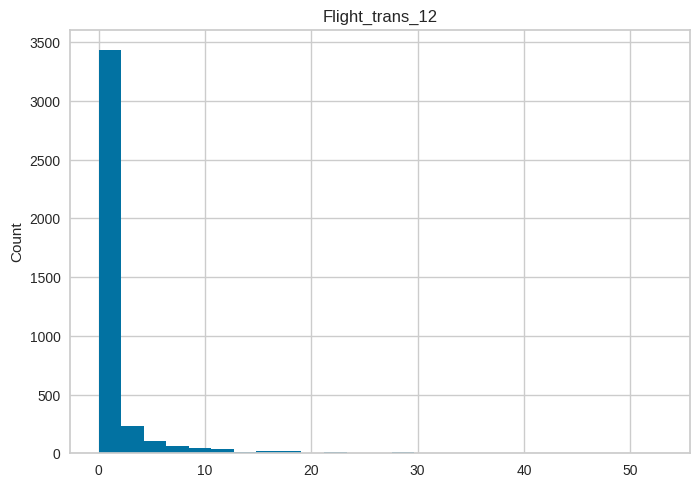

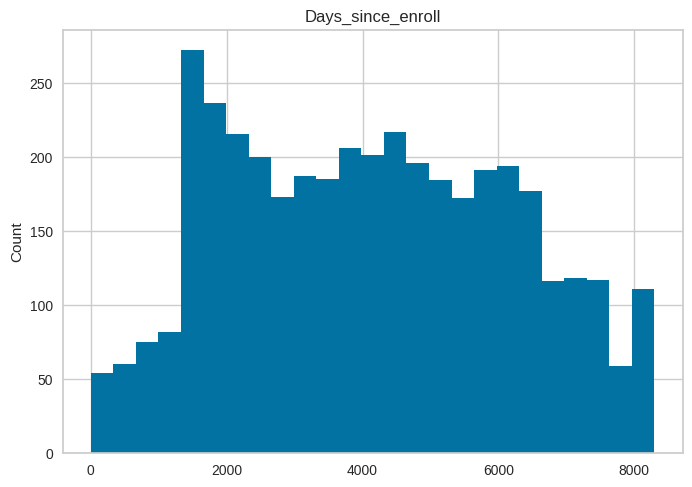

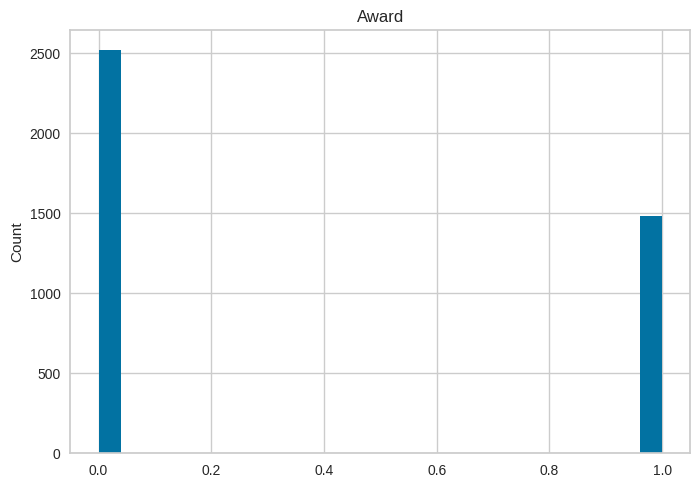

In [ ]:
for feature in data.columns:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

ID


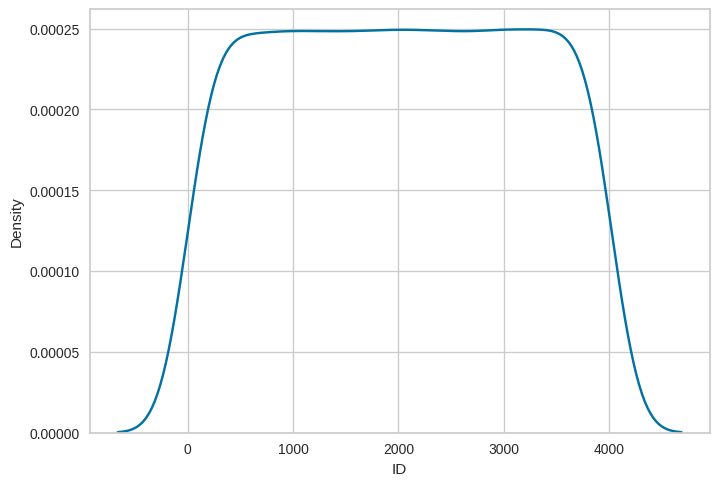

Balance


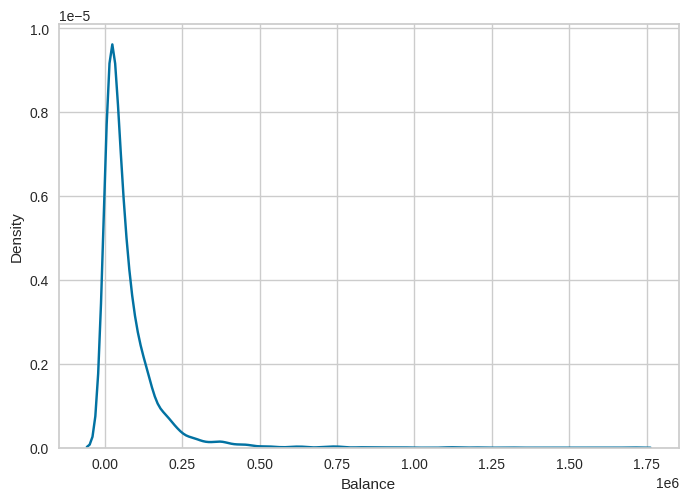

Qual_miles


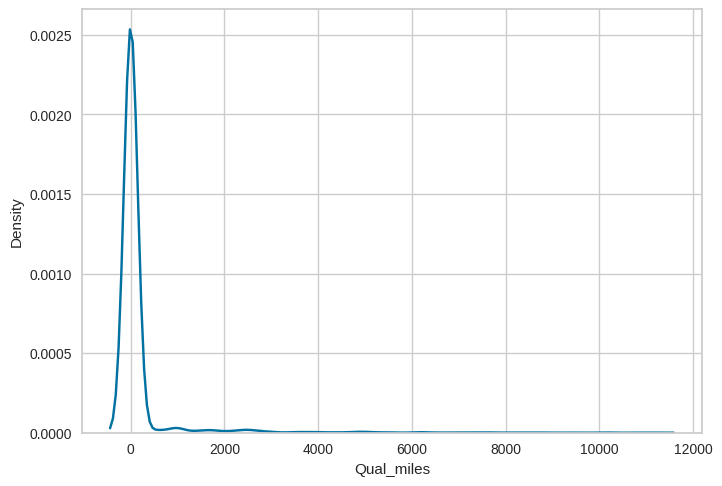

cc1_miles


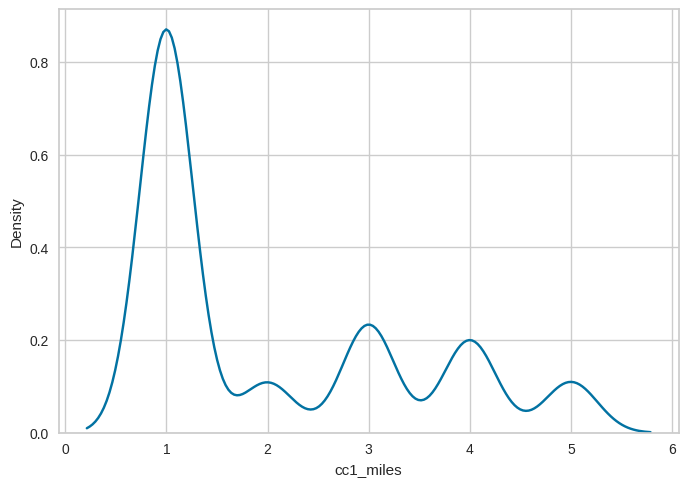

cc2_miles


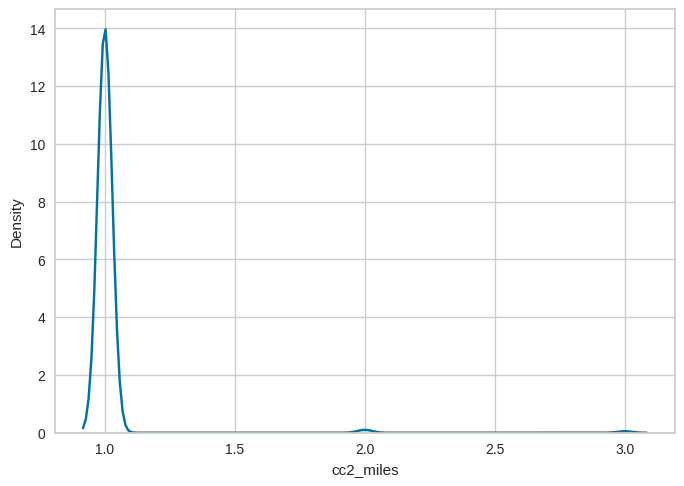

cc3_miles


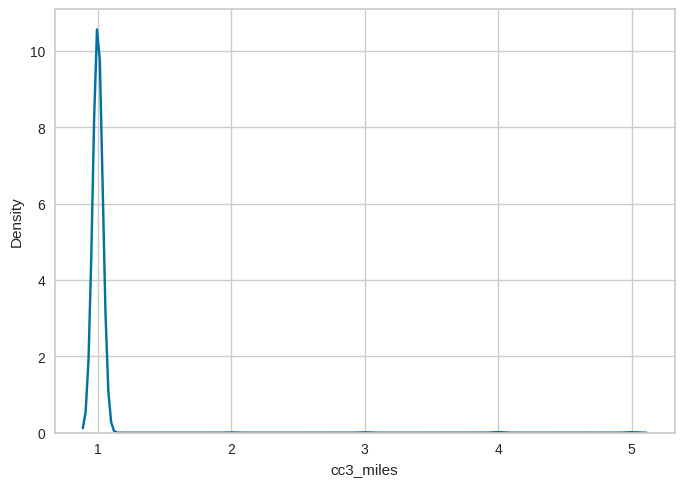

Bonus_miles


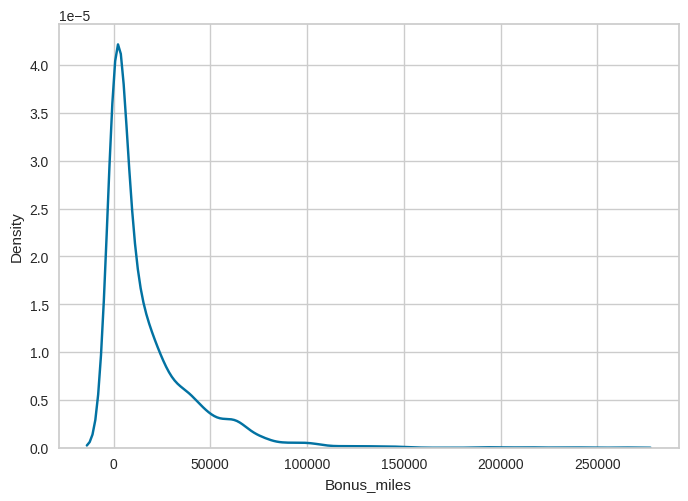

Bonus_trans


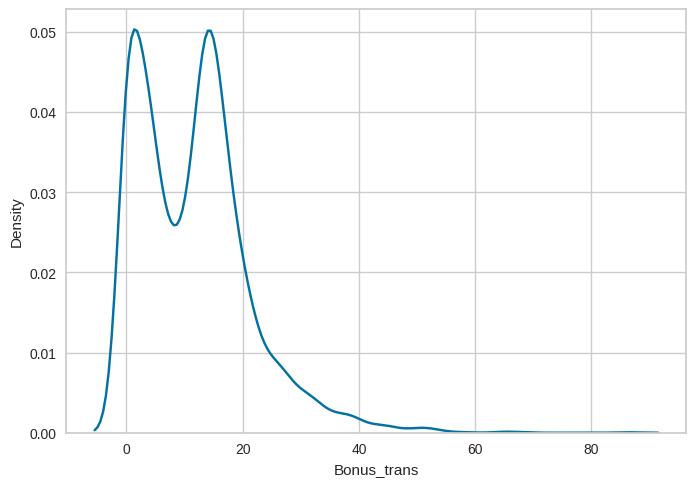

Flight_miles_12mo


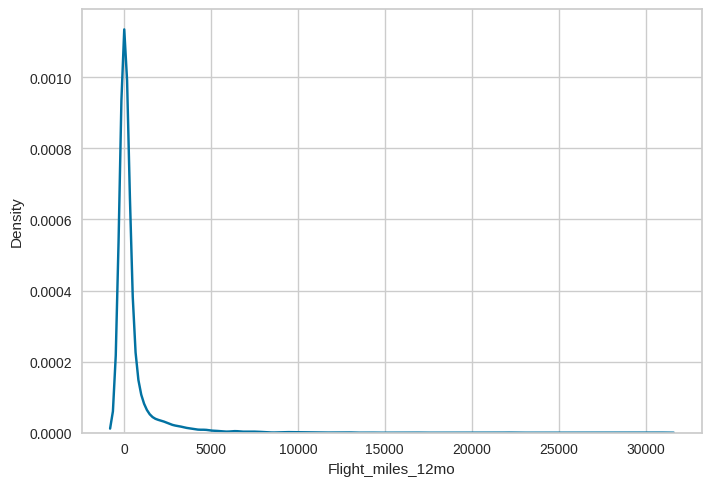

Flight_trans_12


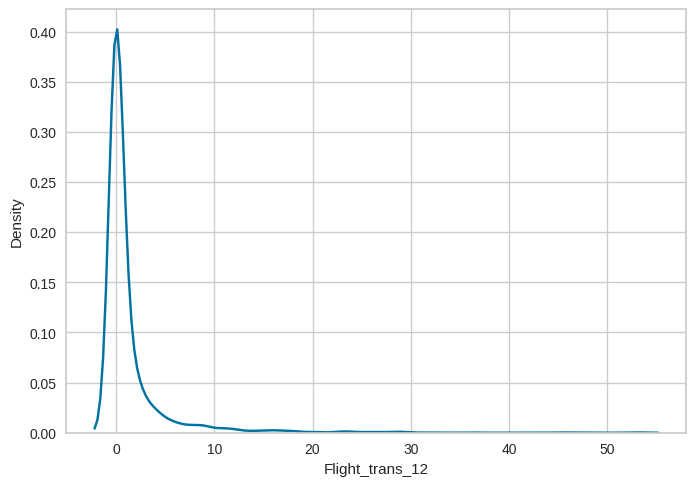

Days_since_enroll


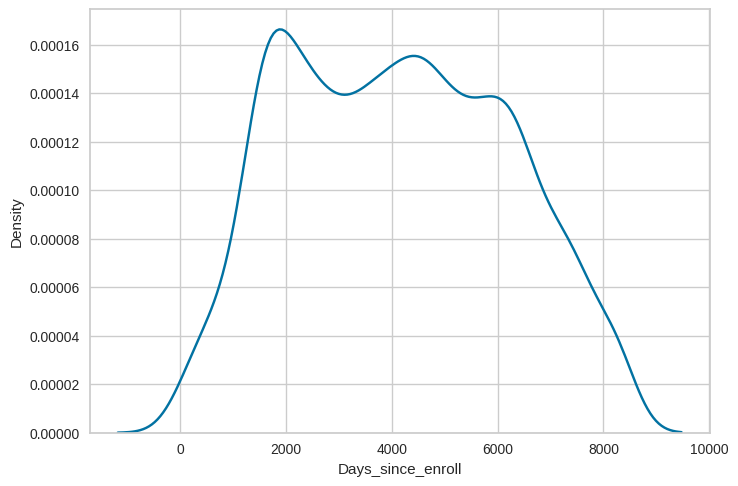

Award


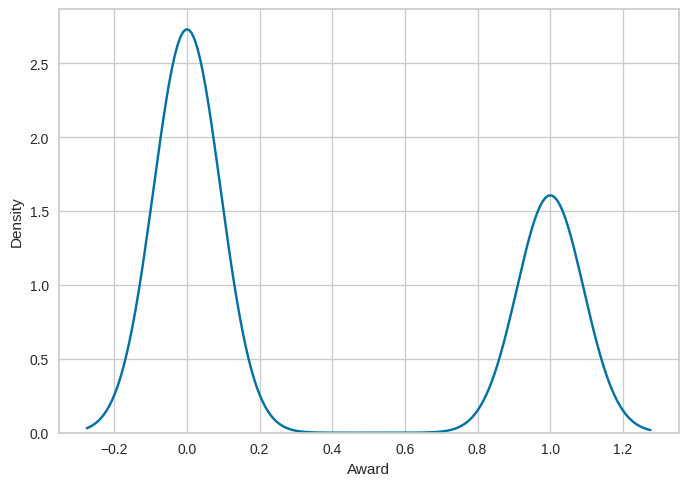

In [ ]:
 #Kernel Density for every feature, singled out

for n in data.columns:
    print(n)
    sns.kdeplot(data[n])
    plt.show()

## **3.1 Outliers Detection**

In [ ]:
data.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

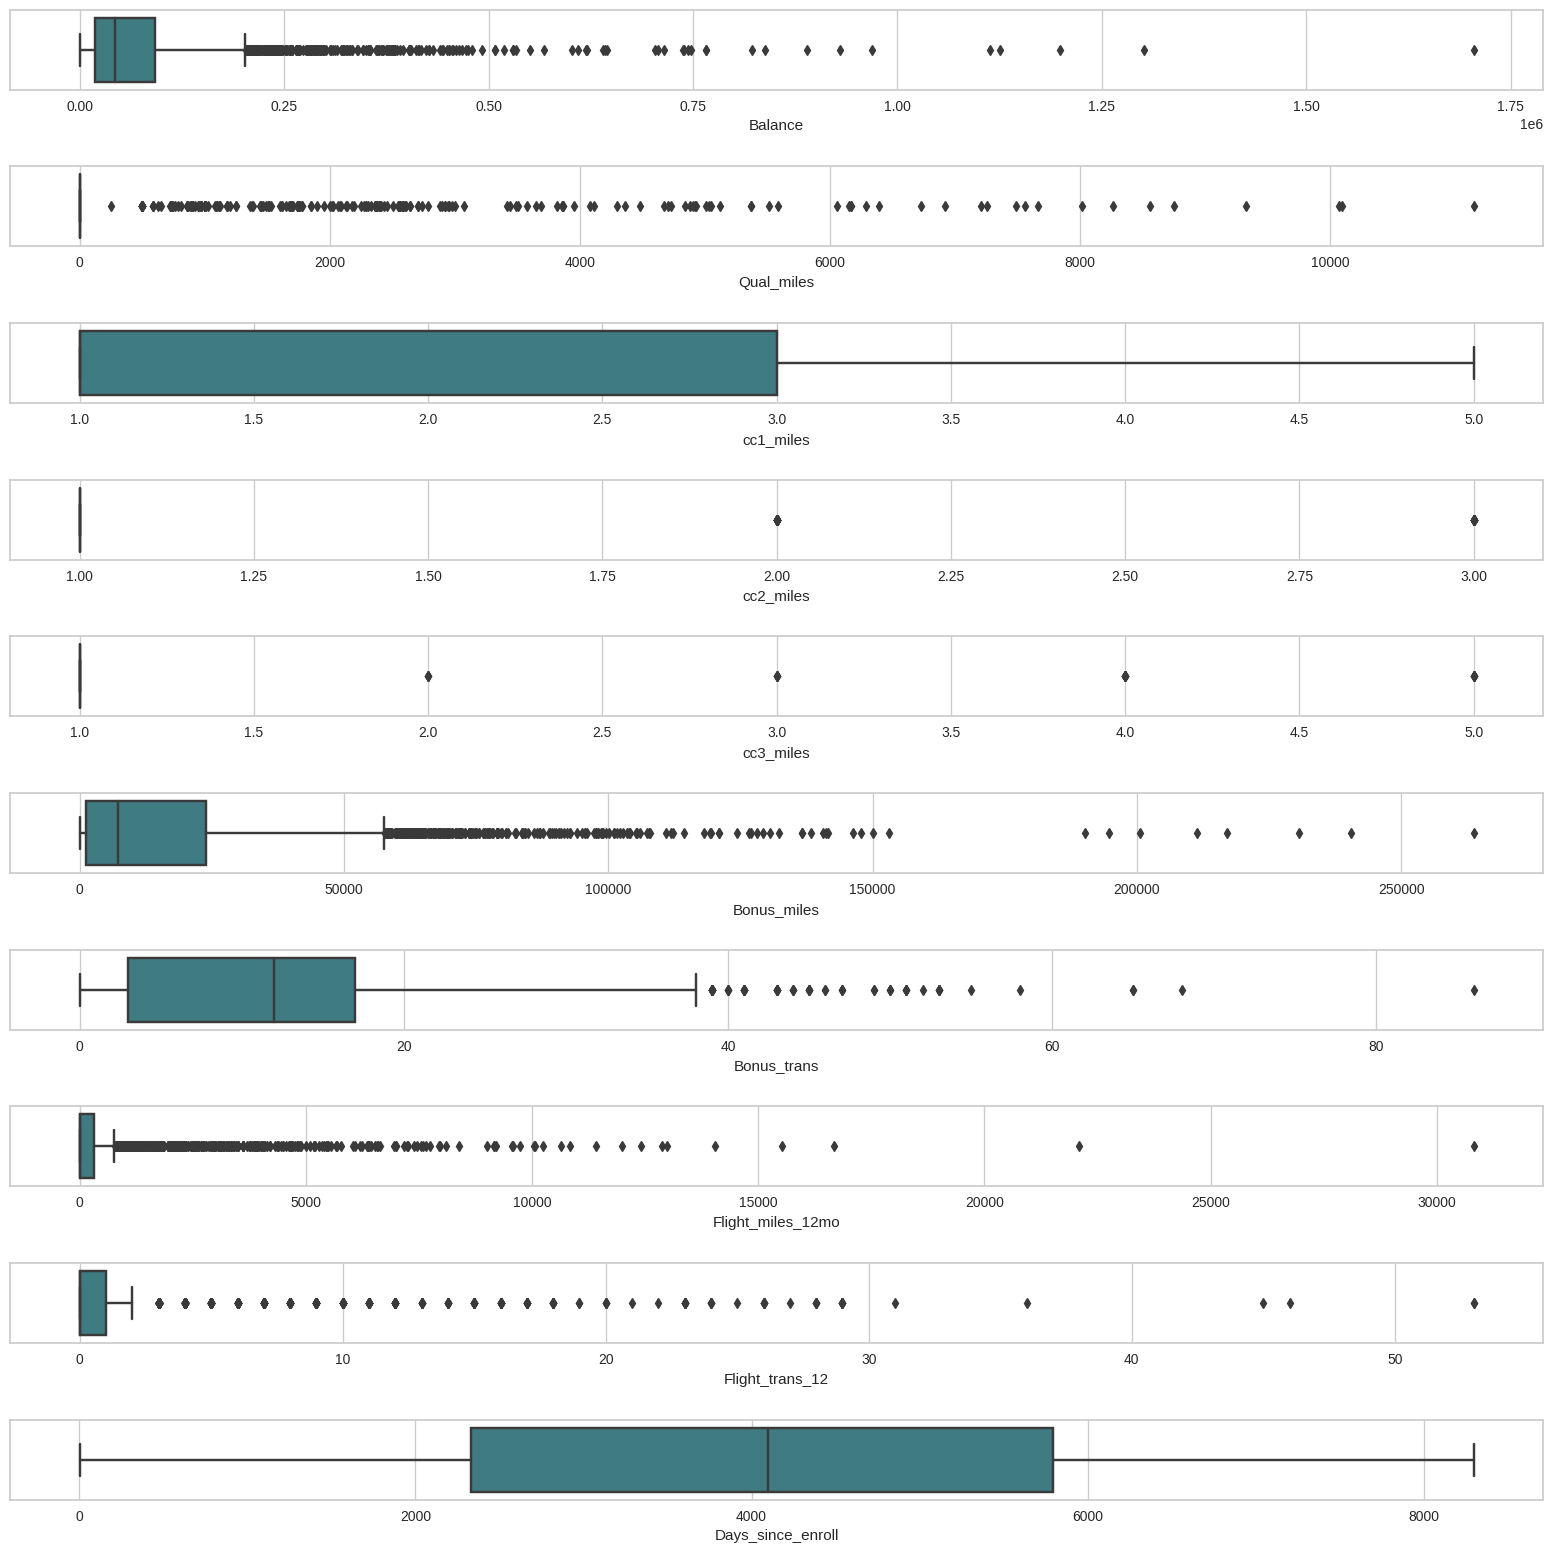

In [ ]:
ot=data.copy()
fig, axes=plt.subplots(10,1,figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=ot,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

<Axes: >

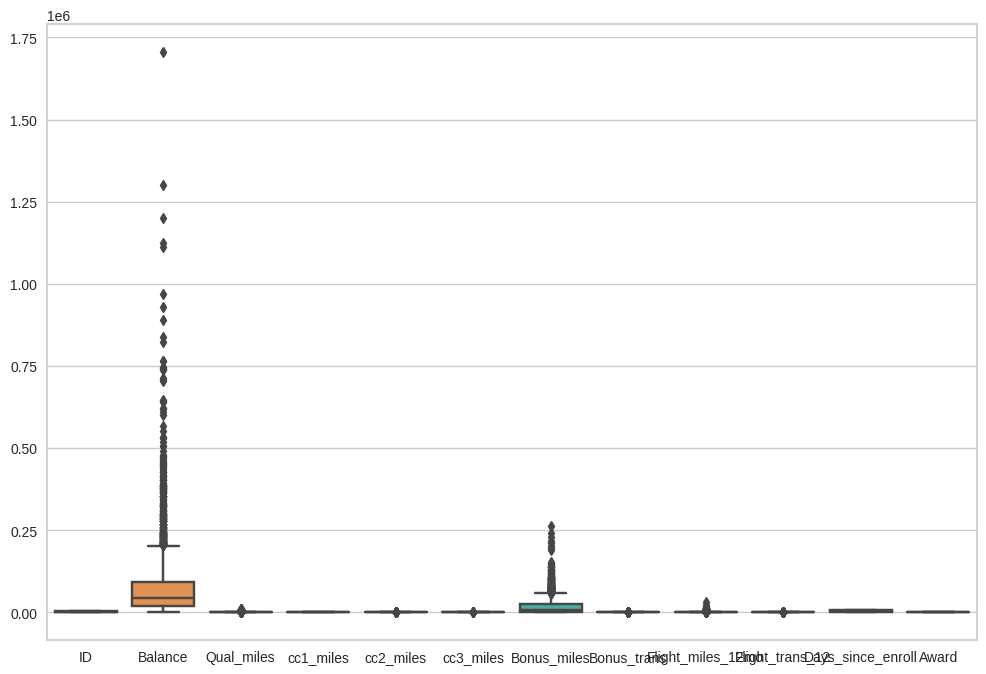

In [ ]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8))
sns.boxplot(data=data)

<Axes: >

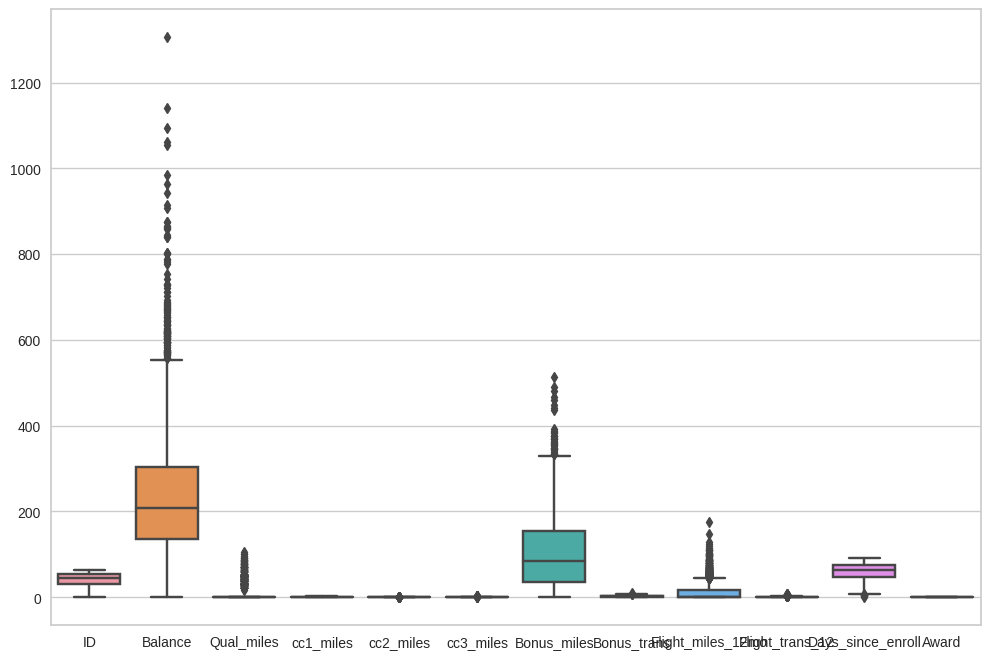

In [ ]:
# we use sqrt() to see more clearly despite the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(data))

## **4. Data Visualization**

In [ ]:
countNotermdeposit = len(data[data.Award == 0])
counthavetermdeposit = len(data[data.Award == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(data.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((counthavetermdeposit / (len(data.Award))*100)))

Percentage of Customer doesn't have a Award: 62.96%
Percentage of Customer does have a Award: 37.04%


Text(0.5, 1.0, 'Whether the client has a Award or not ')

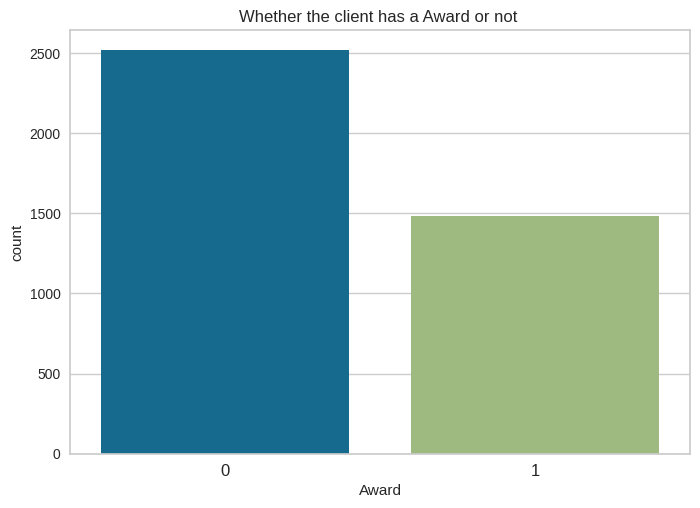

In [ ]:
sns.countplot(x='Award', data=data,
              order=data['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ')

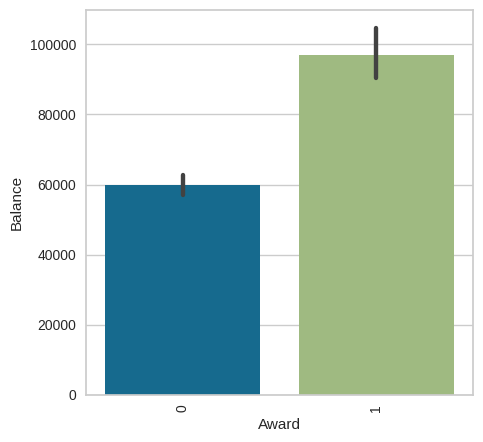

In [ ]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
Balance = data[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# what is correlated with Balance?

corr_matrix = data.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403410
cc1_miles            0.338252
Bonus_trans          0.324797
Days_since_enroll    0.262975
Flight_trans_12      0.255656
Flight_miles_12mo    0.217509
Award                0.178380
Qual_miles           0.108696
cc3_miles            0.035234
cc2_miles           -0.008822
ID                  -0.243540
Name: Balance, dtype: float64

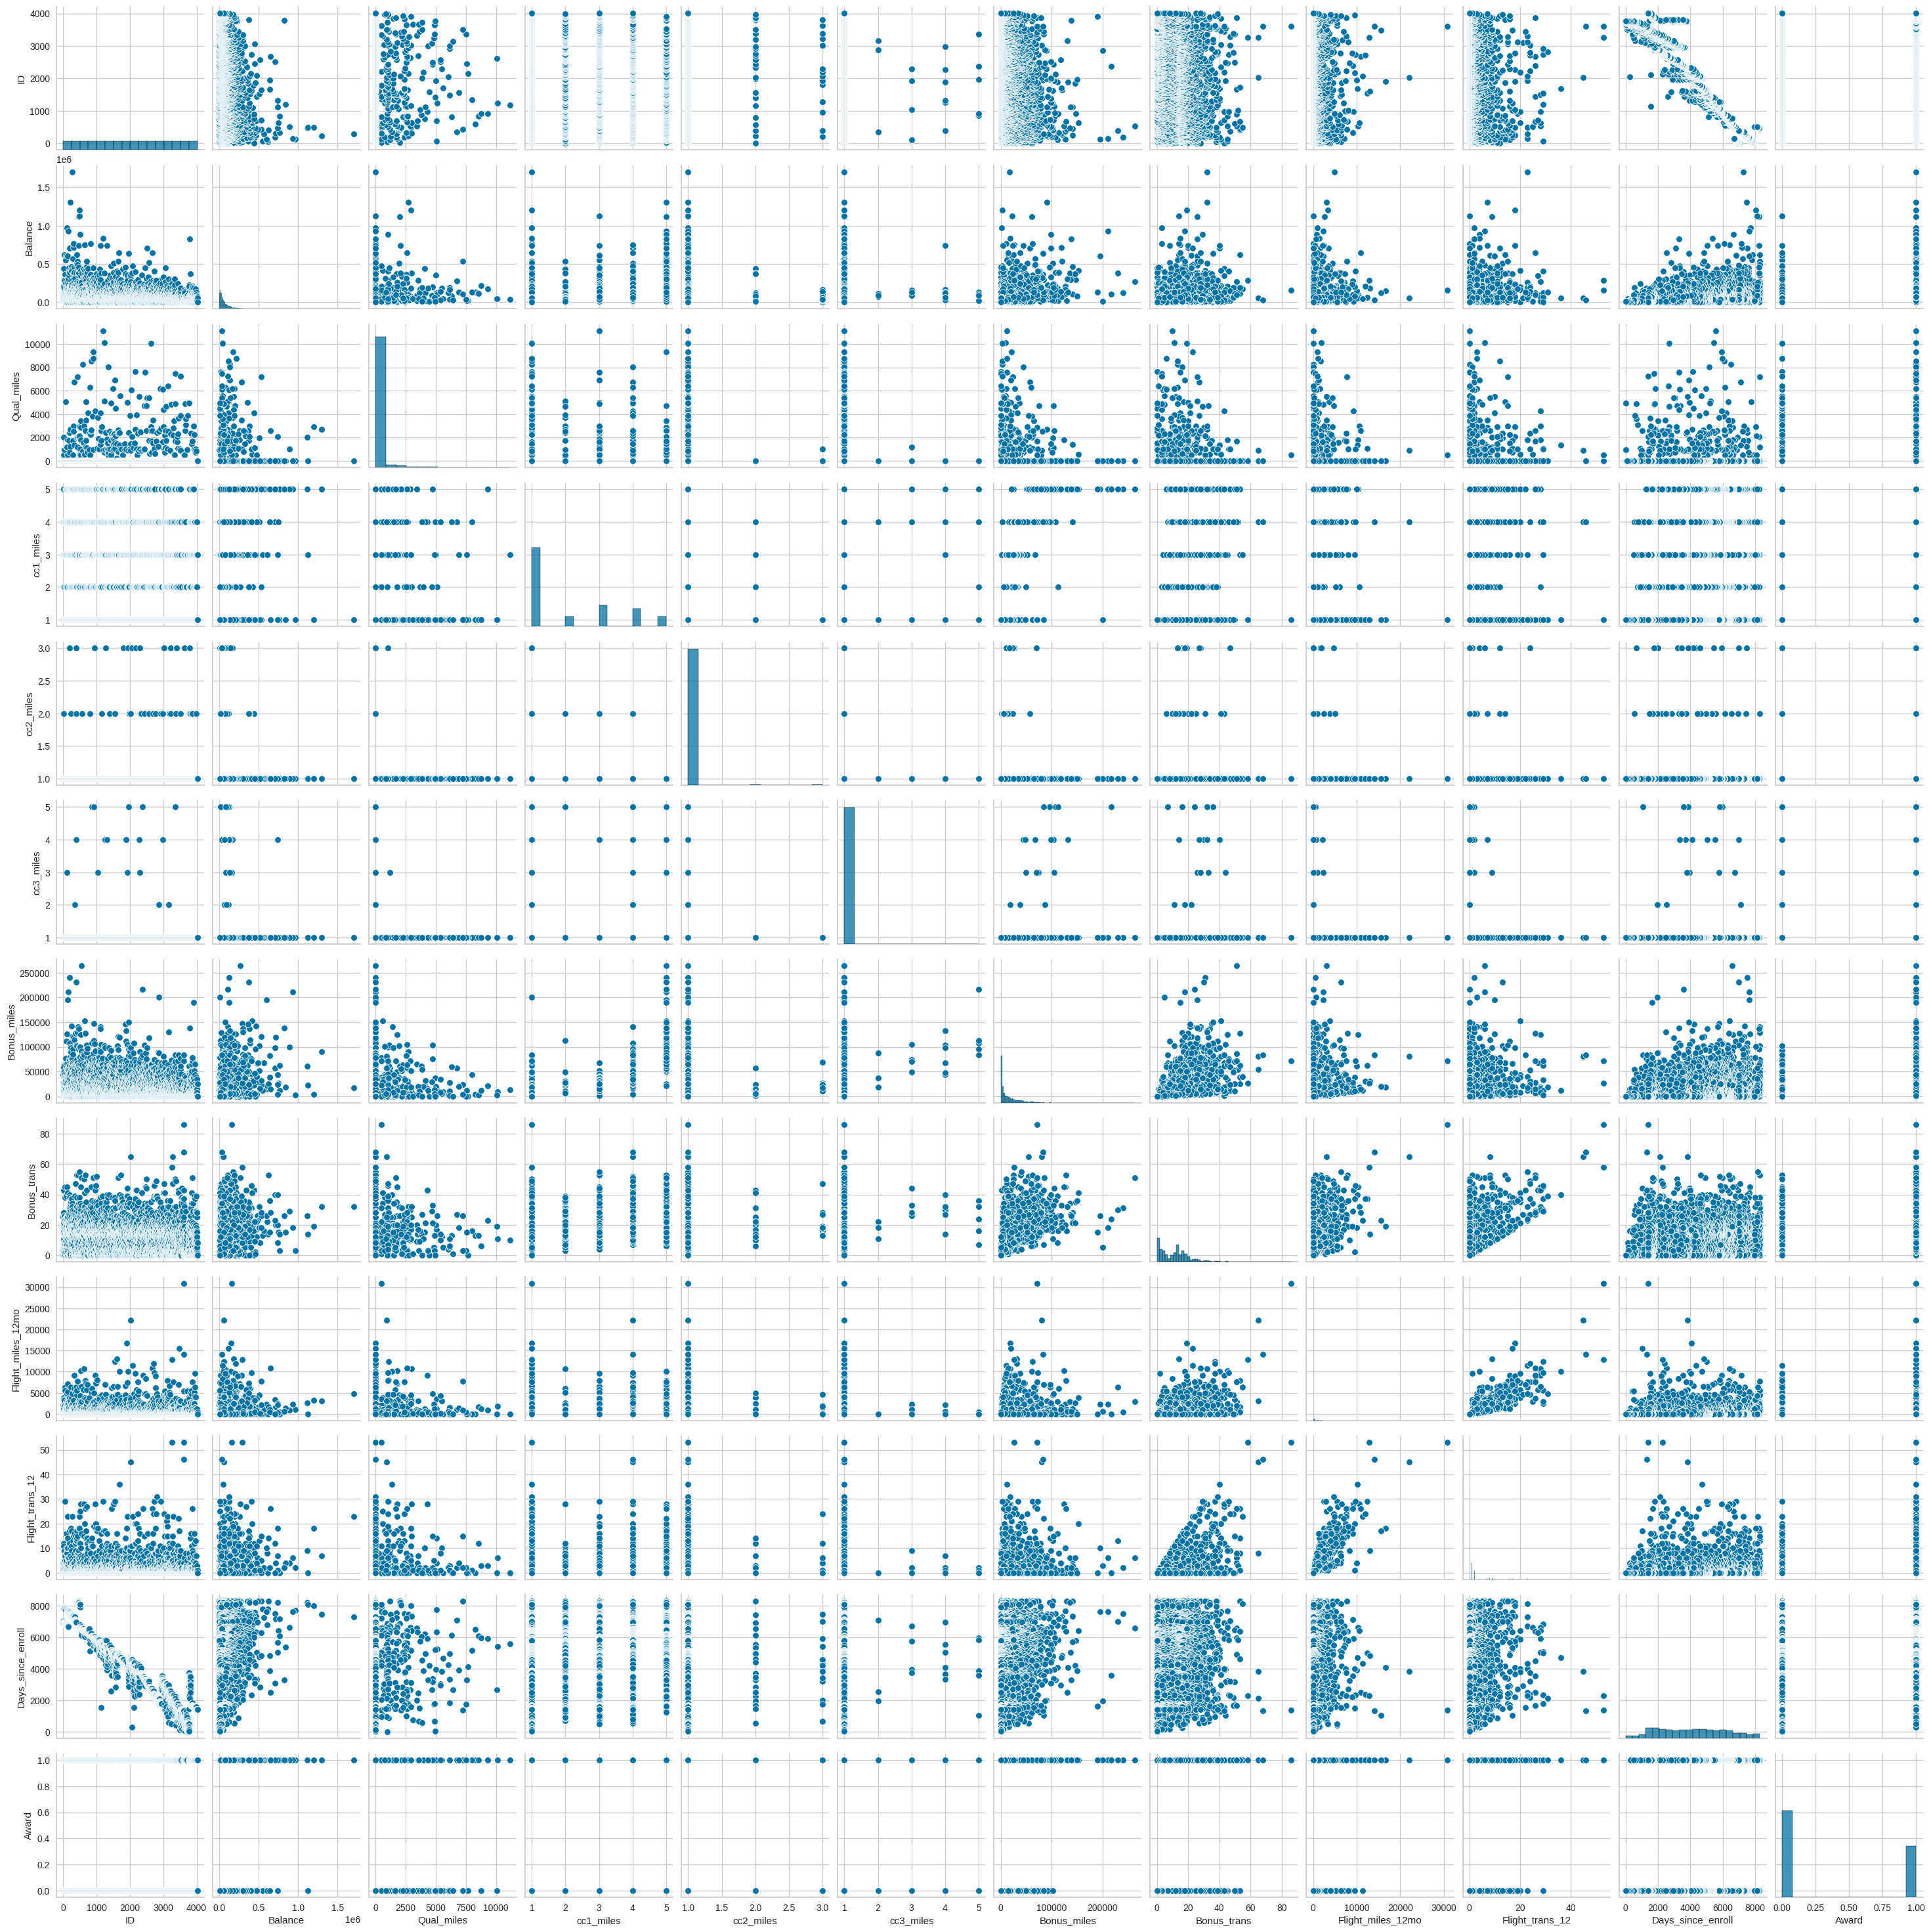

In [ ]:

sns.pairplot(data)

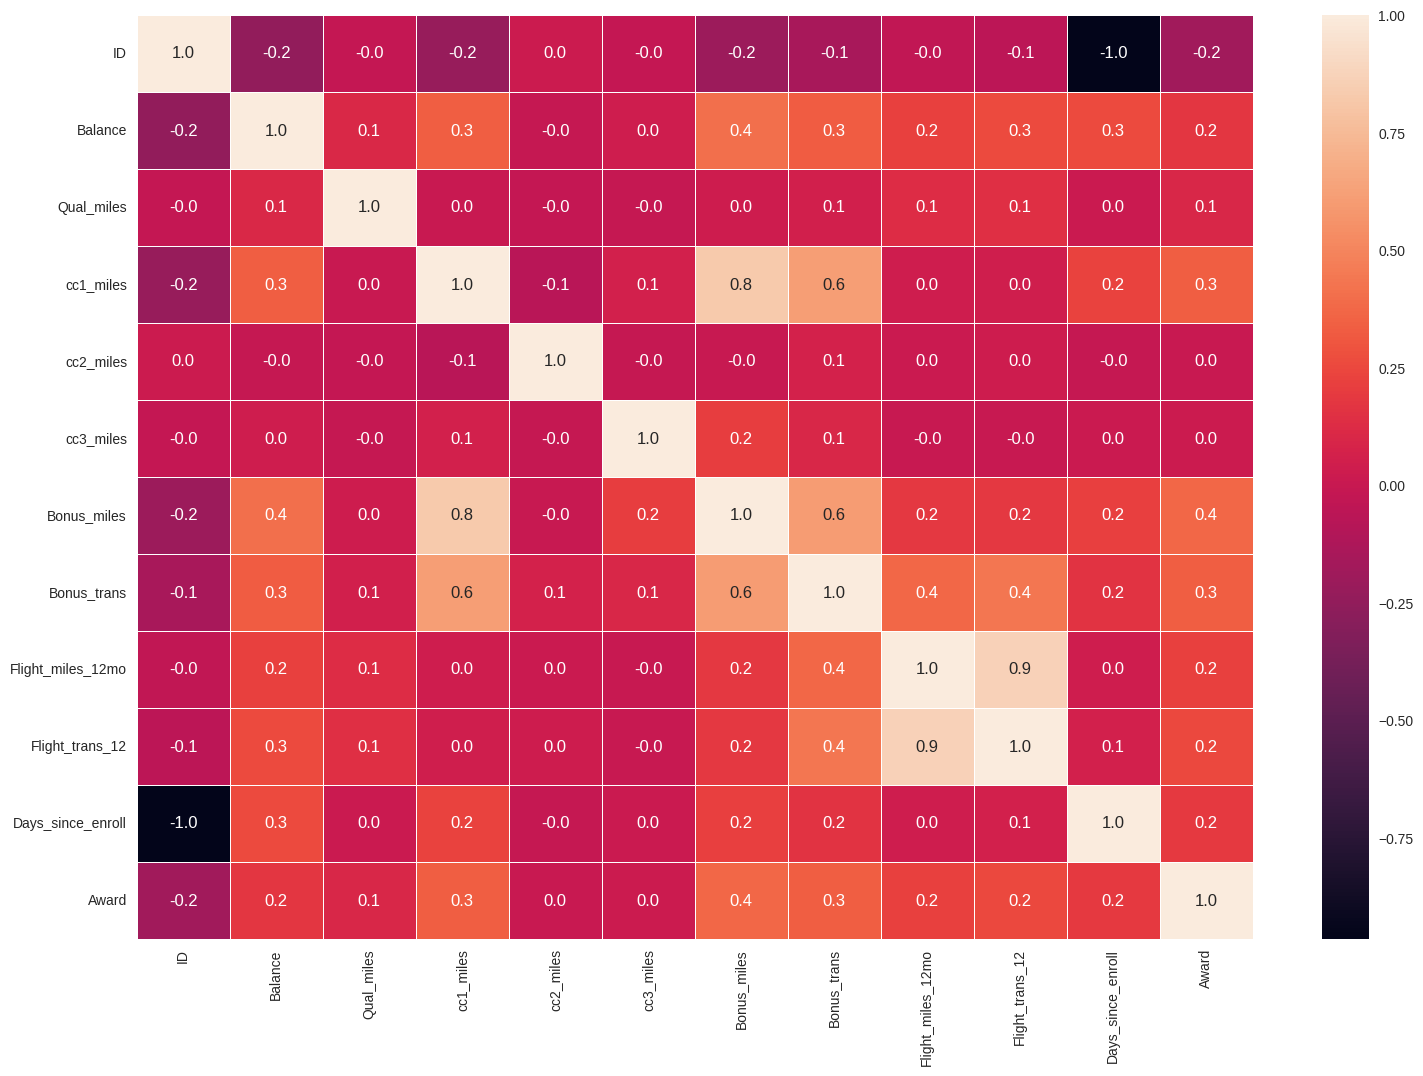

In [ ]:
# correlation heatmap
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

Unique points in this correlation matrix:

+ flight_trans_12 is positively correlated with flight_miles_12mo
+ bonus_trans is positively correlated with cc1_miles
+ bonus_trans is positively correlated with bonus_miles
+ bonus_miles is positively correlated with cc1_miles

In other words, the following are positively correlated

+ Number of flight transactions in the past 12 months <-> Number of flight miles in the past 12 months
+ Miles passengers earn with the freq. flyer credit card <-> Amount of non-flight transactions
+ Number of non-flight bonus transactions <-> Miles passengers earn from non-flight bonus transactions
+ Miles passengers earn from non-flight bonus transactions <-> Miles passengers earn with the freq. flyer credit card


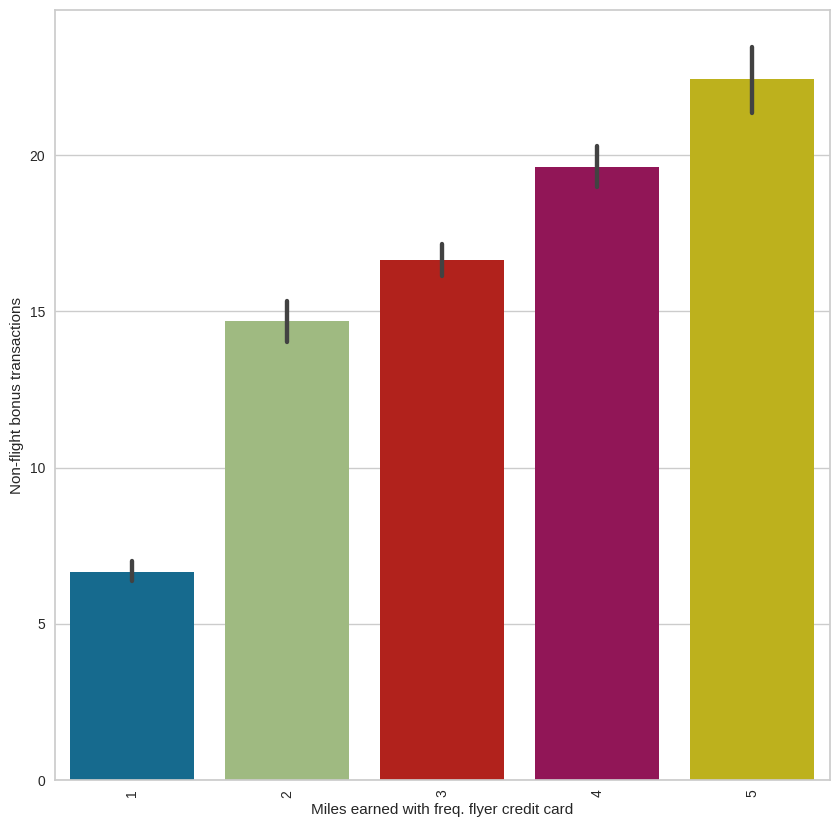

In [ ]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions
plt.figure(figsize = (10,10))
sorted_data = data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

### **People who fly more frequently use bonus transactions more**
## **5. Data Preprocessing**
### **5.1) Standardizing the Data**

In [ ]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(data)
std_df.shape

(3998, 12)

### **5.2) Normalizing the data**

In [ ]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(data)
minmax_df.shape

(3998, 12)

## **6. KMeans Clustering**

After all the analyses we now start with the K-Means Clustering procedure

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid. The first step in k-means is to pick the number of clusters, k. Then keep the iterations running until one of the below satisifes:

+ Centroids of newly formed clusters do not change
+ Points remain in the same cluster
+ Maximum number of iterations are reached

In K Means clustering we need to first assign the K number of clusters which can be taken up using the thumb rule of "Sqrt(n)/2" or plotting the Elbow curve, aka Scree plot.

### **6.1 Elbow Method for Determining Cluster Amount**
**Standard Scaler Applied on Data**

In [ ]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0   1             47976.000000  
1   2             39011.227928  
2   3             34529.062499  
3   4             30611.316504  
4   5             26890.422281  
5   6             23499.282626  
6   7             20919.938577  
7   8             19327.646427  
8   9             17983.979251  
9   10            16769.701818  
10  11            15837.941173  
11  12            15026.813123  
12  13            14177.362641  
13  14            13710.386095

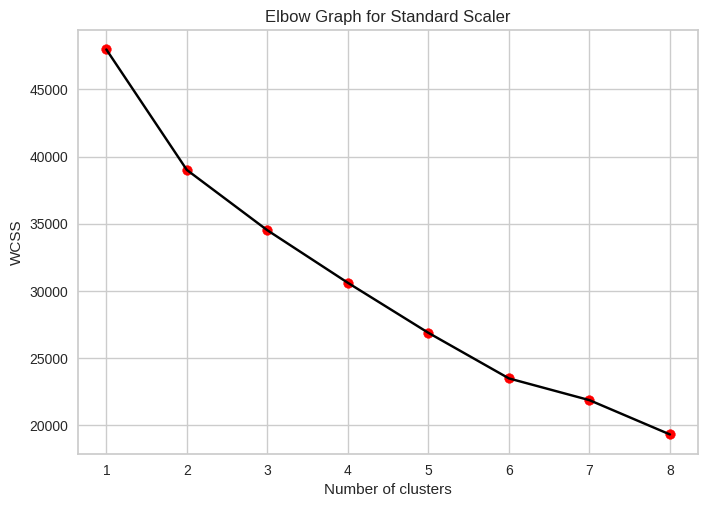

In [ ]:
# within-cluster sum-of-squares criterion
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change.

wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**There is no clear "elbow" visible. A choice of 3 or 4 clusters seems to be fair. Let's see the silhouette score**
### **Internal measures for cluster validation**

+ The goal of partitioning clustering algorithms is to split the data set into clusters of objects, such that:

the objects in the same cluster are similar as much as possible, and the objects in different clusters are highly distinct That is, we want the average distance within cluster to be as small as possible; and the average distance between clusters to be as large as possible.

Internal validation measures reflect often the compactness, the connectedness and the separation of the cluster partitions.

+ Compactness or cluster cohesion: Measures how close are the objects within the same cluster. A lower within-cluster variation is an indicator of a good compactness (i.e., a good clustering). The different indices for evaluating the compactness of clusters are base on distance measures such as the cluster-wise within average/median distances between observations.
+ Separation: Measures how well-separated a cluster is from other clusters. The indices used as separation measures include:

distances between cluster centers the pairwise minimum distances between objects in different clusters

+ Connectivity: corresponds to what extent items are placed in the same cluster as their nearest neighbors in the data space. The connectivity has a value between 0 and infinity and should be minimized.

Generally most of the indices used for internal clustering validation combine compactness and separation measures as follow:

Index=(α×Separation)(β×Compactness)

Where α and β are weights.

In this section, we’ll describe the two commonly used indices for assessing the goodness of clustering: the silhouette width and the Dunn index. These internal measure can be used also to determine the optimal number of clusters in the data.

### **6.2 Silhouette Score**
**Silhouette coefficient**

+ The silhouette analysis measures how well an observation is clustered and it estimates the average distance between clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters.

For each observation i, the silhouette width si is calculated as follows:

For each observation i, calculate the average dissimilarity ai between i and all other points of the cluster to which i belongs.
For all other clusters C, to which i does not belong, calculate the average dissimilarity d(i,C) of i to all observations of C. The smallest of these d(i,C) is defined as bi=minCd(i,C). The value of bi can be seen as the dissimilarity between i and its “neighbor” cluster, i.e., the nearest one to which it does not belong.

+ Finally the silhouette width of the observation i is defined by the formula: Si=(bi−ai)/max(ai,bi).\

Silhouette width can be interpreted as follow:

Observations with a large Si (almost 1) are very well clustered.
A small Si (around 0) means that the observation lies between two clusters.
Observations with a negative Si are probably placed in the wrong cluster.

In [ ]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

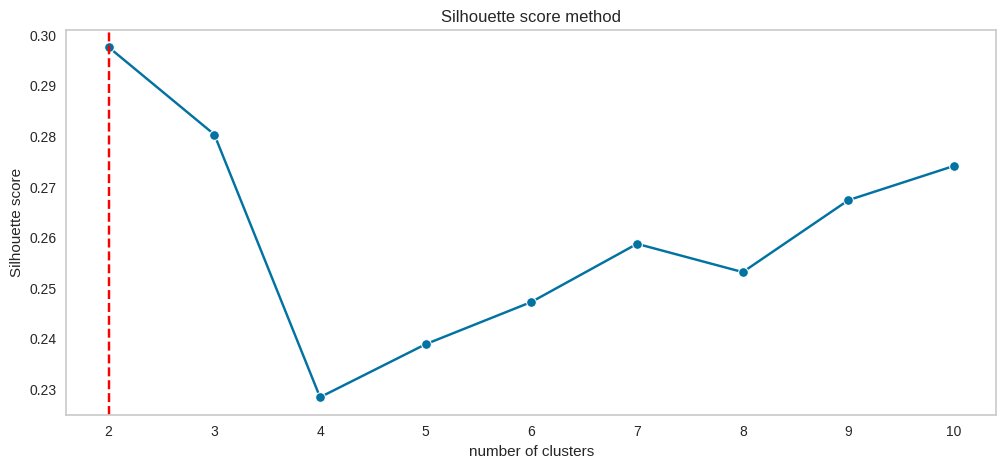

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(data=pd.DataFrame({'n_clusters': n_clusters, 's_scores': s_scores}),
             x='n_clusters', y='s_scores', marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

**Silhouette score method indicates the best options would be respectively 2 clusters.**

Elbow Plot for Standard Scaler data


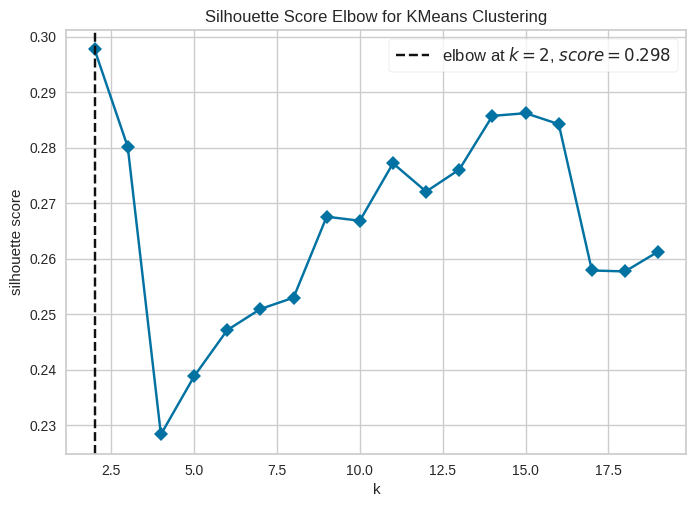

In [ ]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will use Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(std_df)
visualizer.poof()
plt.show()

In [ ]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= sil(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.29801268900579253
For n_clusters = 3 The average silhouette_score is : 0.2812256436404711
For n_clusters = 4 The average silhouette_score is : 0.22839705260825136
For n_clusters = 5 The average silhouette_score is : 0.23882223424633095
For n_clusters = 6 The average silhouette_score is : 0.24722615020419486
For n_clusters = 7 The average silhouette_score is : 0.2586145498859596
For n_clusters = 8 The average silhouette_score is : 0.2529301629017694
For n_clusters = 9 The average silhouette_score is : 0.258933636796744


For n_clusters = 2 The average silhouette_score is : 0.29801268900579253
For n_clusters = 3 The average silhouette_score is : 0.2812256436404711
For n_clusters = 4 The average silhouette_score is : 0.22839705260825136
For n_clusters = 5 The average silhouette_score is : 0.23882223424633095
For n_clusters = 6 The average silhouette_score is : 0.24722615020419486
For n_clusters = 7 The average silhouette_score is : 0.2586145498859596
For n_clusters = 8 The average silhouette_score is : 0.2529301629017694
For n_clusters = 9 The average silhouette_score is : 0.258933636796744


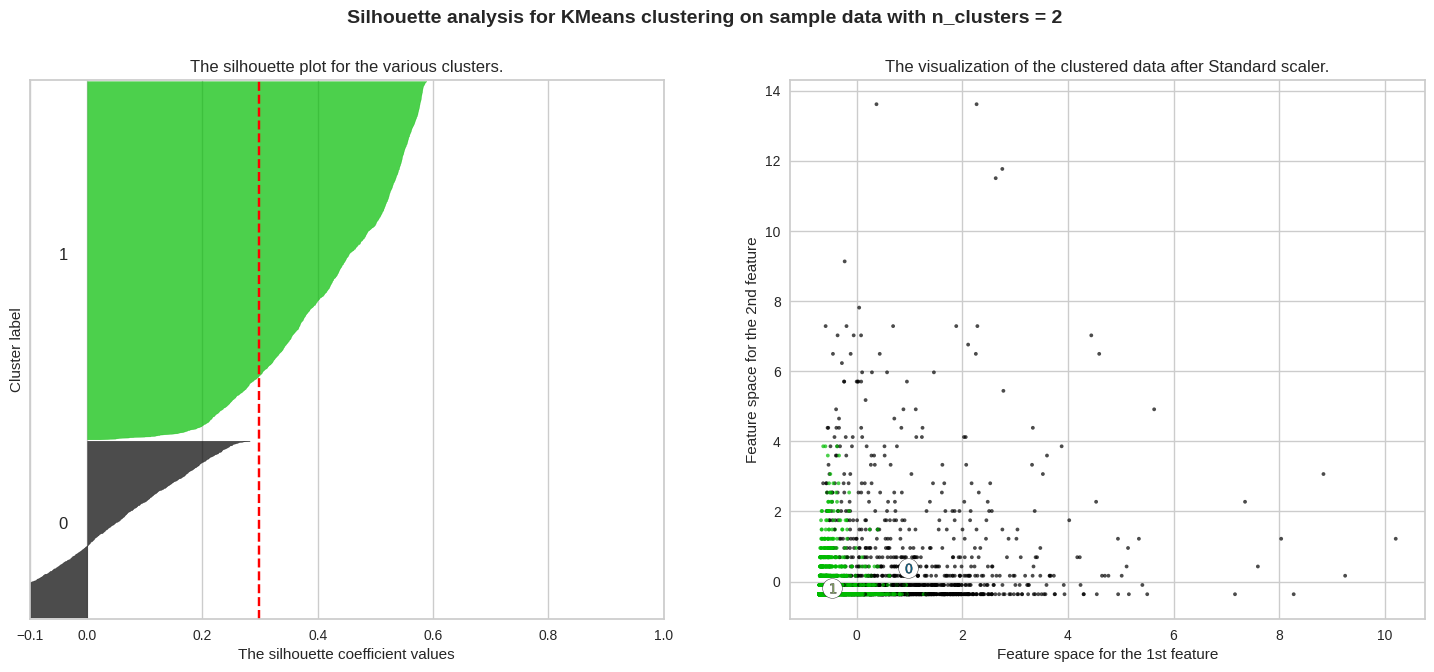

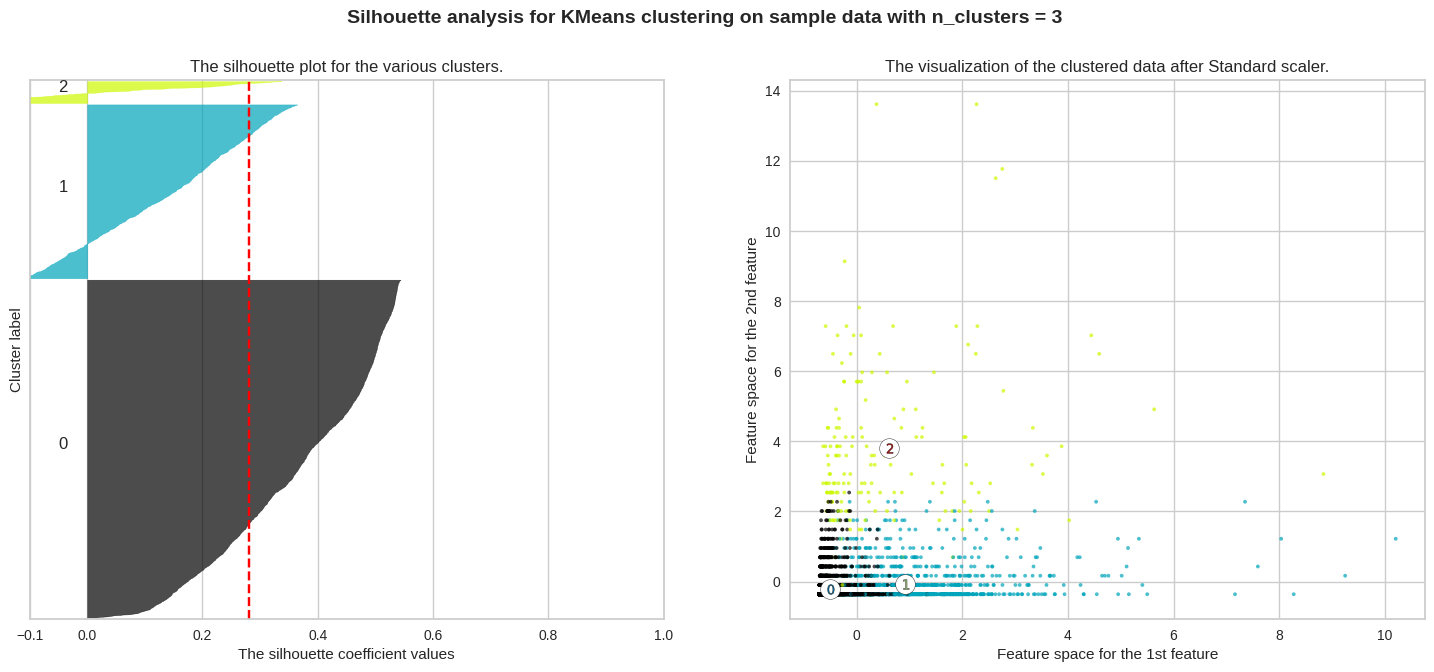

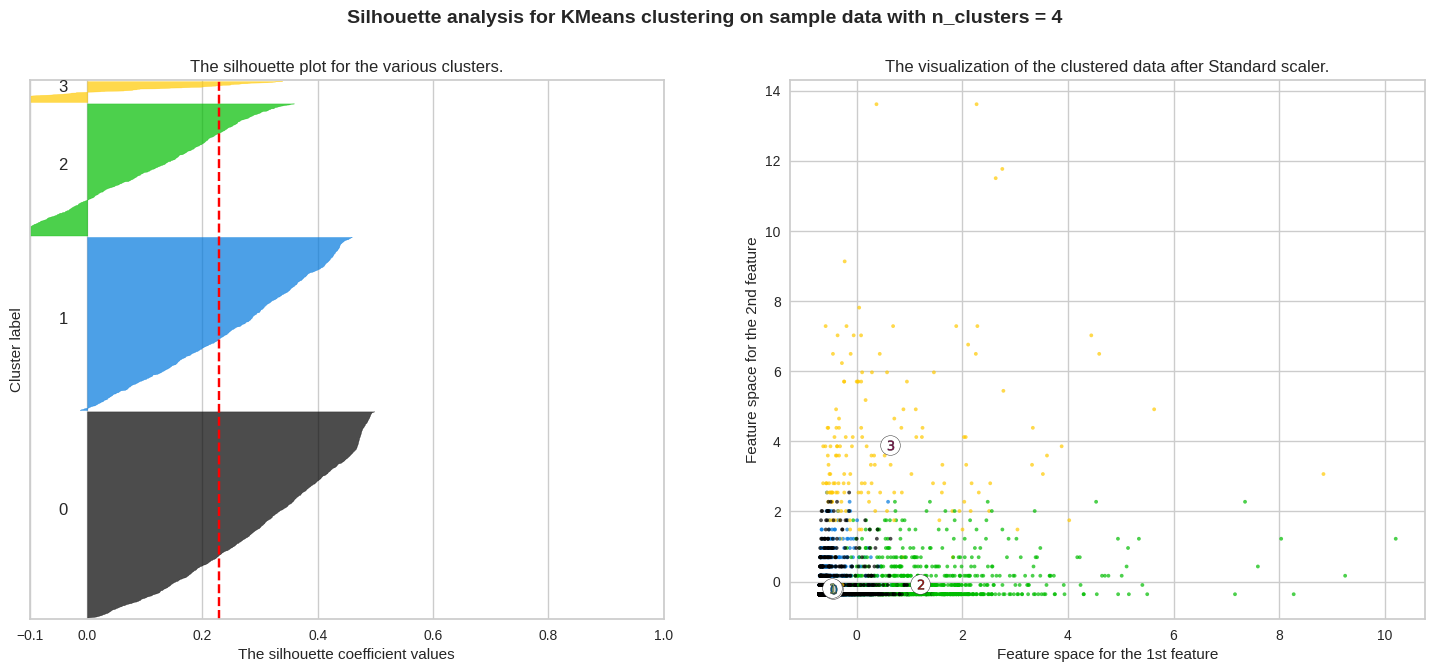

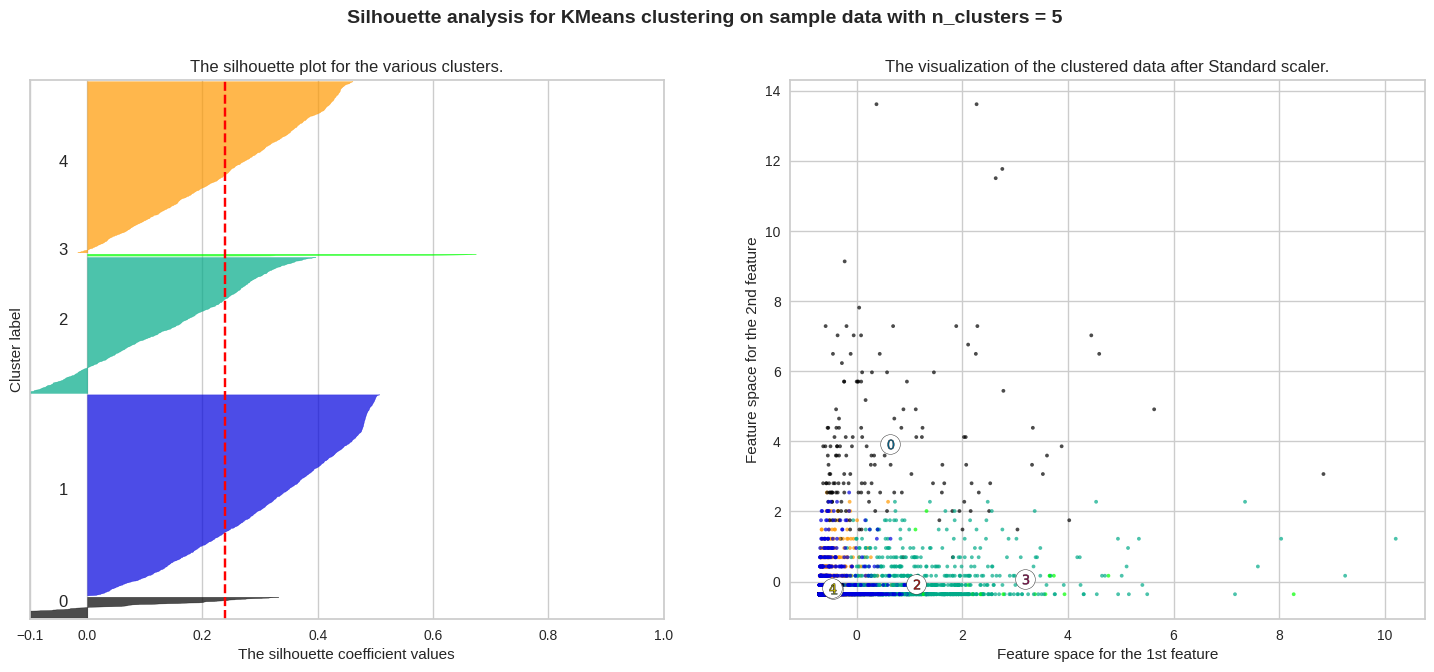

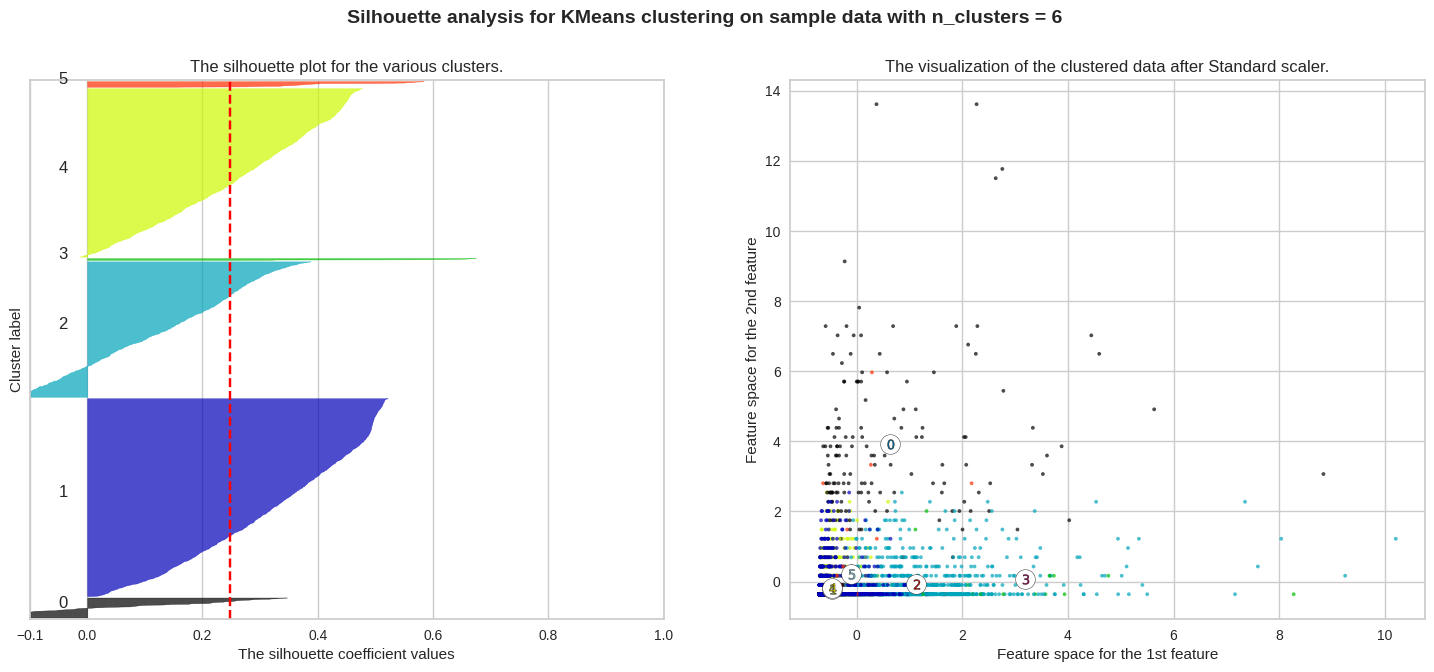

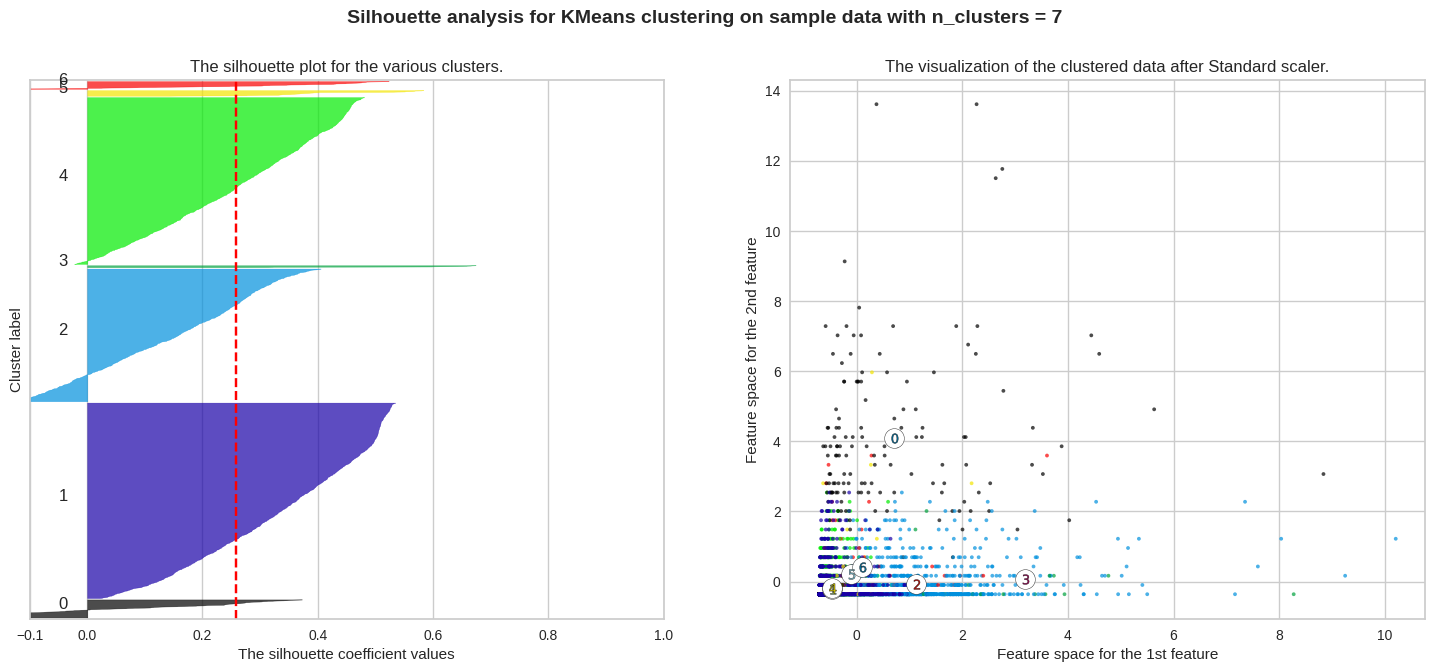

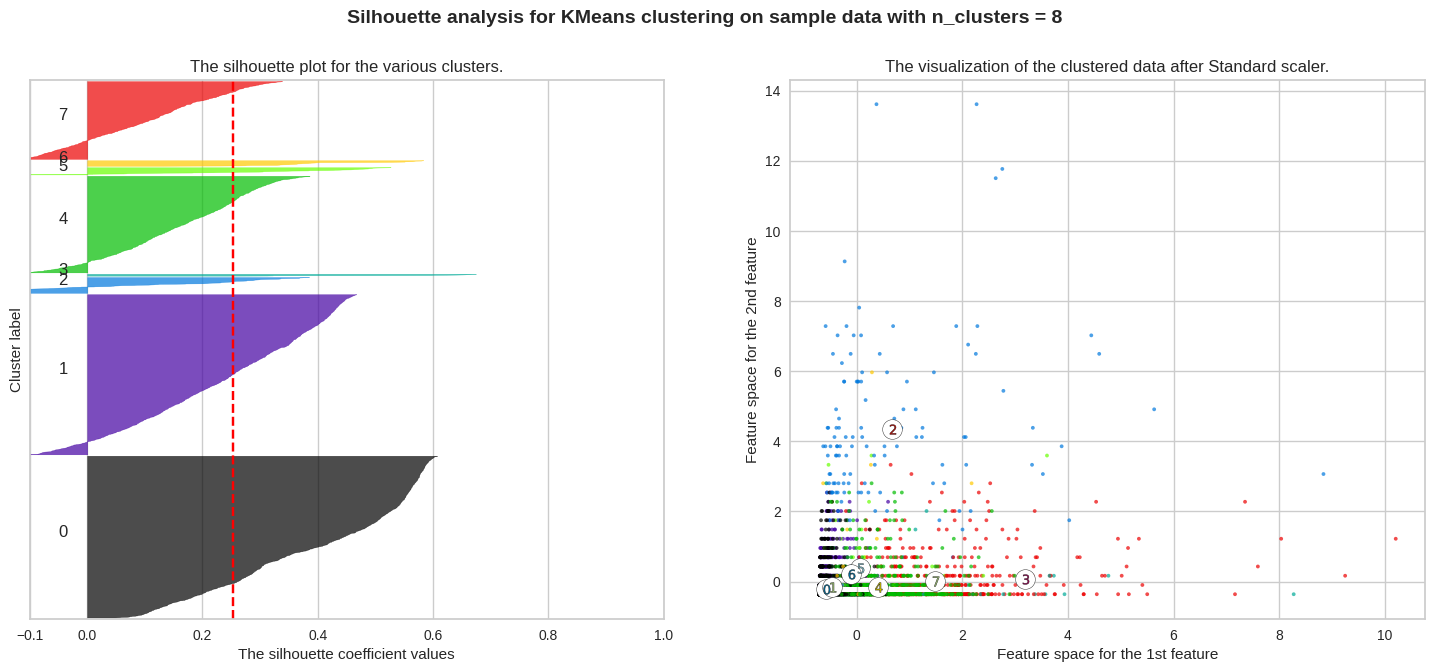

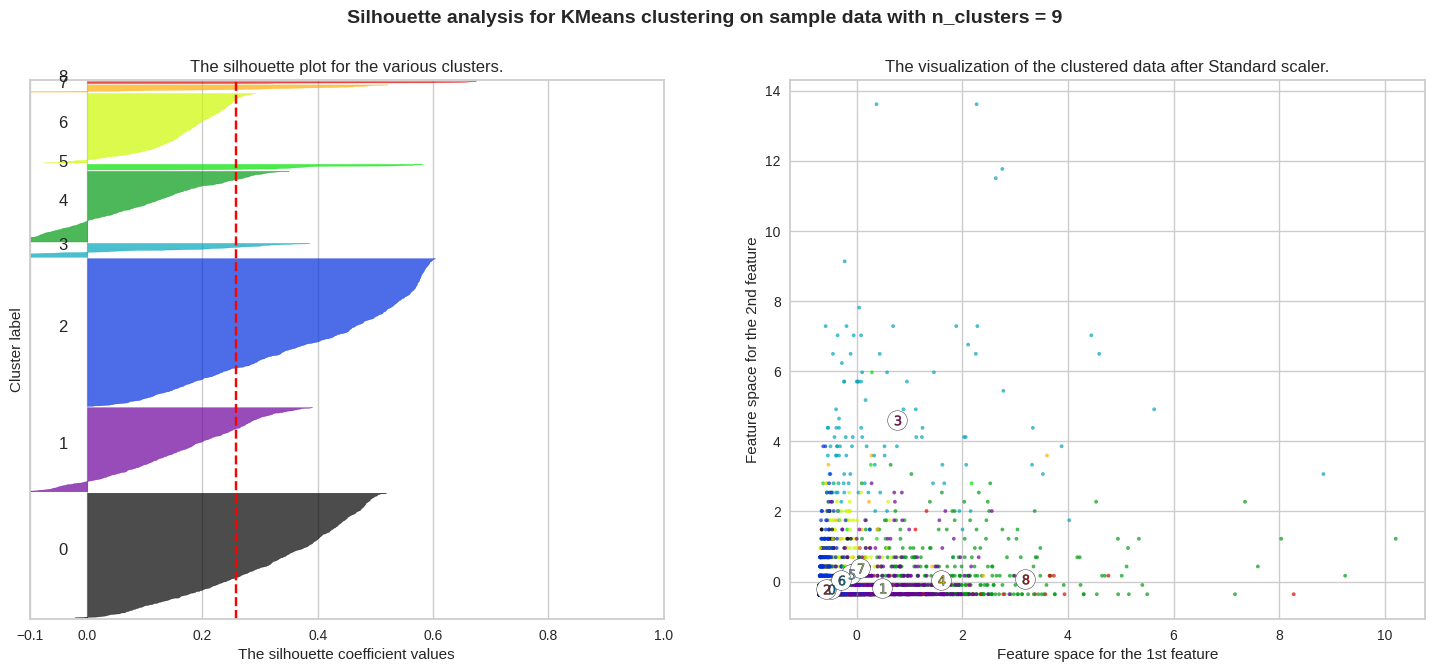

In [ ]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(std_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(std_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(std_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(std_df[:,6], std_df[:, 9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,6], centers[:,9], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**Conclusion:**
According the the silhouette score of:

The standardized data, the ideal number of clusters is 6, with a score higher than other options, of 0.33

### **6.3 Build KMeans Cluster algorithm using K=6 and Standard Scaler Applied Dataset**

In [ ]:
# we have found good number of cluster = 6
# model building using cluster numbers = 6

model_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(3998,)

In [ ]:
# these are nothing but cluster labels...

y_predict_kmeans

array([4, 4, 4, ..., 1, 1, 1], dtype=int32)

In [ ]:
model_kmeans.labels_

array([4, 4, 4, ..., 1, 1, 1], dtype=int32)

In [ ]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[-0.24788358,  1.18122215,  0.8780249 ,  0.10569167, -0.09825429,
        -0.06277446,  0.6361529 ,  1.65367082,  3.65889823,  3.92928441,
         0.28736325,  0.91968263],
       [ 0.96635032, -0.33726598, -0.0525475 , -0.50040283, -0.09825429,
        -0.06277446, -0.46149851, -0.41717515, -0.18835279, -0.20710802,
        -0.95767108, -0.35403429],
       [-0.39254298,  0.5142373 ,  0.0280622 ,  1.36092777, -0.09825429,
        -0.052761  ,  1.12432708,  0.7995891 , -0.06325894, -0.06791588,
         0.39553511,  0.69033424],
       [-0.30117806,  0.63950059, -0.08446932,  1.02183982, -0.09825429,
        15.64433492,  3.1793166 ,  1.7144102 ,  0.0332068 ,  0.05959833,
         0.2395819 ,  0.33731815],
       [-0.79375643, -0.16361836, -0.05880273, -0.50878439, -0.09825429,
        -0.05874782, -0.47175919, -0.39048472, -0.16559705, -0.17672058,
         0.77222631, -0.25427272],
       [ 0.21977589, -0.04706705, -0.15626333, -0.66838569,  9.03710982,
        -0.06277446, -

In [ ]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster.
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

23487.256027633062

In [ ]:
#Assign clusters to the data set
df = data.copy()
df.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
df['Kmeans_label'] = model_kmeans.labels_

In [ ]:
# Group data by Clusters (K=6)
df.groupby('Kmeans_label').agg(['mean'])

ID        Balance  Qual_miles cc1_miles cc2_miles  \
                     mean           mean        mean      mean      mean   
Kmeans_label                                                               
0             1726.708609  192650.205298  823.443709  2.205298  1.000000   
1             3135.683400  39633.490629   103.496653  1.370817  1.000000   
2             1558.848485  125438.728250  165.861193  3.933529  1.000000   
3             1664.866667  138061.400000  78.800000   3.466667  1.000000   
4             1093.287736  57131.808176   98.657233   1.359277  1.000000   
5             2269.372093  68876.581395   23.255814   1.139535  2.348837   

             cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo  \
                  mean          mean        mean              mean   
Kmeans_label                                                         
0             1.000000  32511.874172  27.483444   5583.324503        
1             1.000000  6004.201473   7.599063    196.441098         
2             1.001955  44301.009775  19.282502   371.596285         
3             4.066667  93927.866667  28.066667   506.666667         
4             1.000786  5756.411950   7.855346    228.303459         
5             1.000000  14689.837209  17.534884   582.627907         

             Flight_trans_12 Days_since_enroll     Award  
                        mean              mean      mean  
Kmeans_label                                              
0             16.278146       4712.523179       0.814570  
1             0.588353        2141.839357       0.199465  
2             1.116325        4935.870968       0.703812  
3             1.600000        4613.866667       0.533333  
4             0.703616        5713.643868       0.247642  
5             2.209302        3968.930233       0.395349

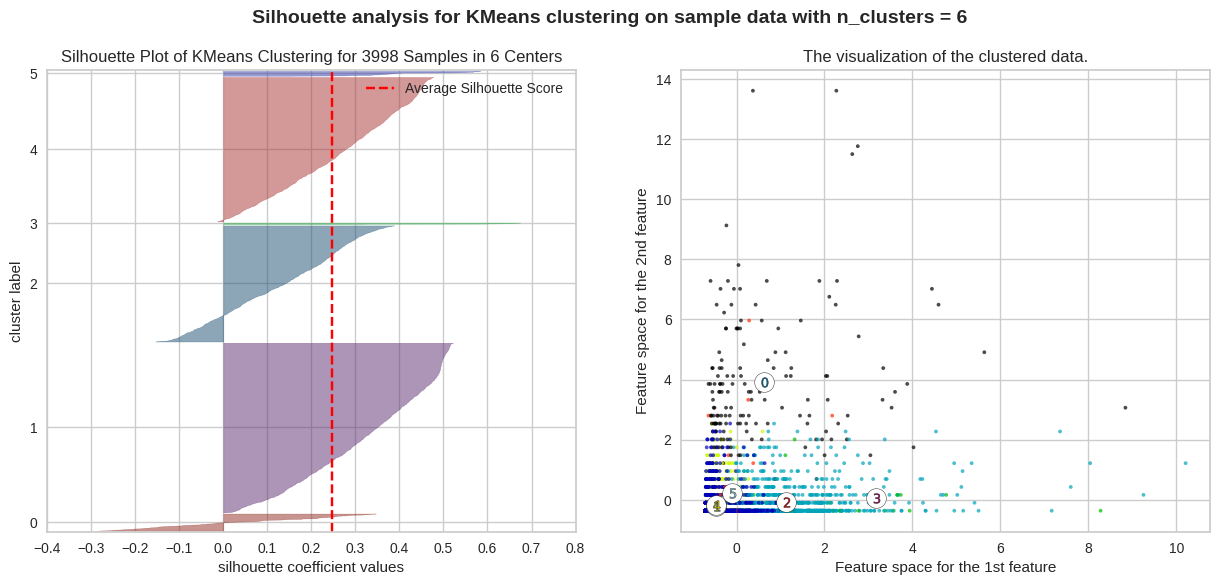

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(std_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(std_df[:, 6], std_df[:, 9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

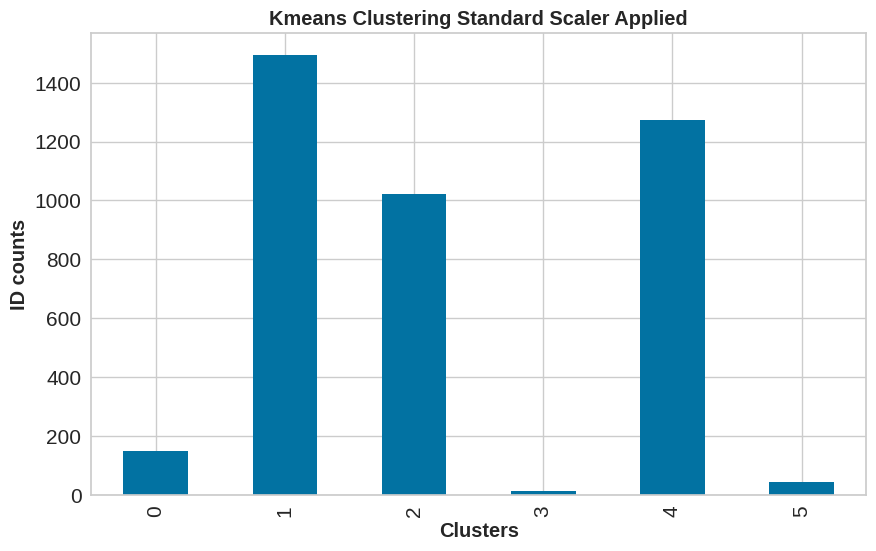

In [ ]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Kmeans_label']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

## **6.4 Elbow Method and Silhouette Score on MinMaxScaler Applied Data**

In [ ]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0   1             2163.581672   
1   2             1146.157800   
2   3             865.204389    
3   4             673.410731    
4   5             536.162579    
5   6             452.187530    
6   7             400.472616    
7   8             346.190014    
8   9             308.493607    
9   10            292.955955    
10  11            277.181529    
11  12            265.919961    
12  13            252.999556    
13  14            242.814151

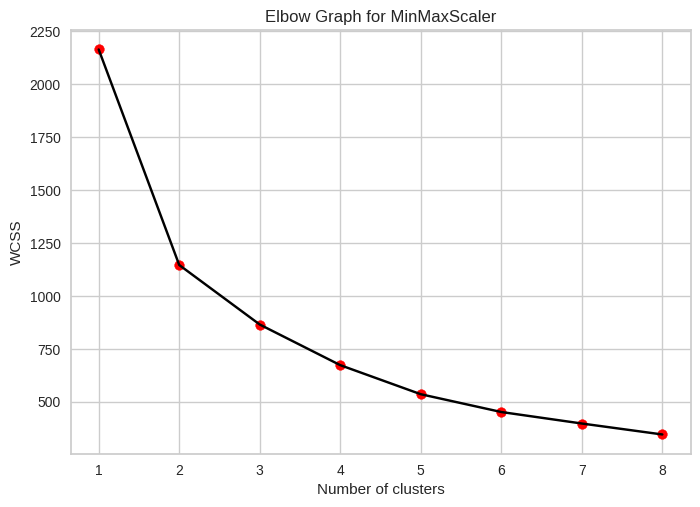

In [ ]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

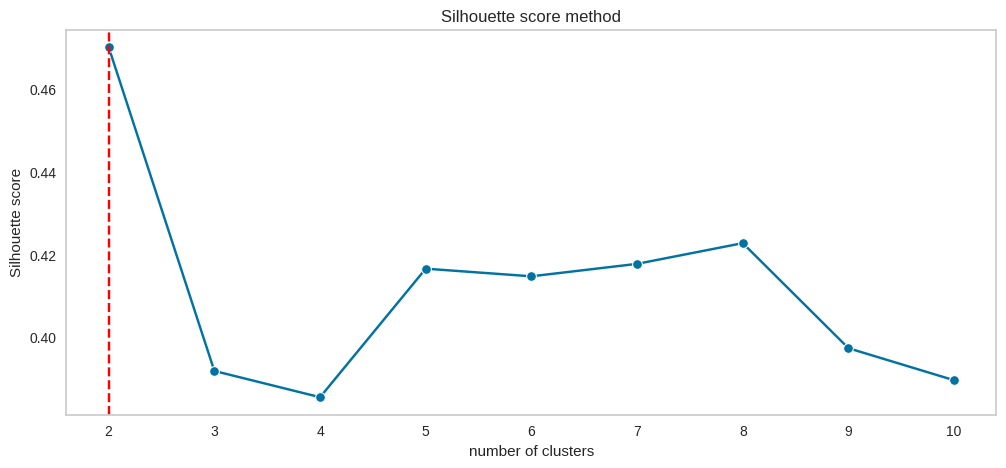

In [ ]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(minmax_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(minmax_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(data=pd.DataFrame({'n_clusters': n_clusters, 's_scores': s_scores}),
             x='n_clusters', y='s_scores', marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for MinMaxScaler data


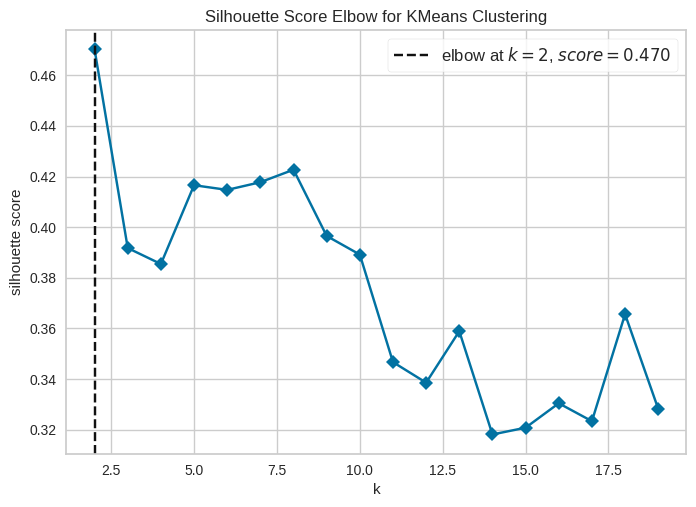

In [ ]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(minmax_df)
visualizer.poof()
plt.show()

In [ ]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(minmax_df)
    sil_score1= sil(minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.47017759216114996
For n_clusters = 3 The average silhouette_score is : 0.39181894121829813
For n_clusters = 4 The average silhouette_score is : 0.38545810540537717
For n_clusters = 5 The average silhouette_score is : 0.41655213688489695
For n_clusters = 6 The average silhouette_score is : 0.4147264212830033
For n_clusters = 7 The average silhouette_score is : 0.41772440381128395
For n_clusters = 8 The average silhouette_score is : 0.42261924864547934
For n_clusters = 9 The average silhouette_score is : 0.3977093332616355


For n_clusters = 2 The average silhouette_score is : 0.47017759216114996
For n_clusters = 3 The average silhouette_score is : 0.3917570711211925
For n_clusters = 4 The average silhouette_score is : 0.38545810540537717
For n_clusters = 5 The average silhouette_score is : 0.4165727278275212
For n_clusters = 6 The average silhouette_score is : 0.4147264212830033
For n_clusters = 7 The average silhouette_score is : 0.4177591915991036
For n_clusters = 8 The average silhouette_score is : 0.4226965554456603
For n_clusters = 9 The average silhouette_score is : 0.3965328572222362


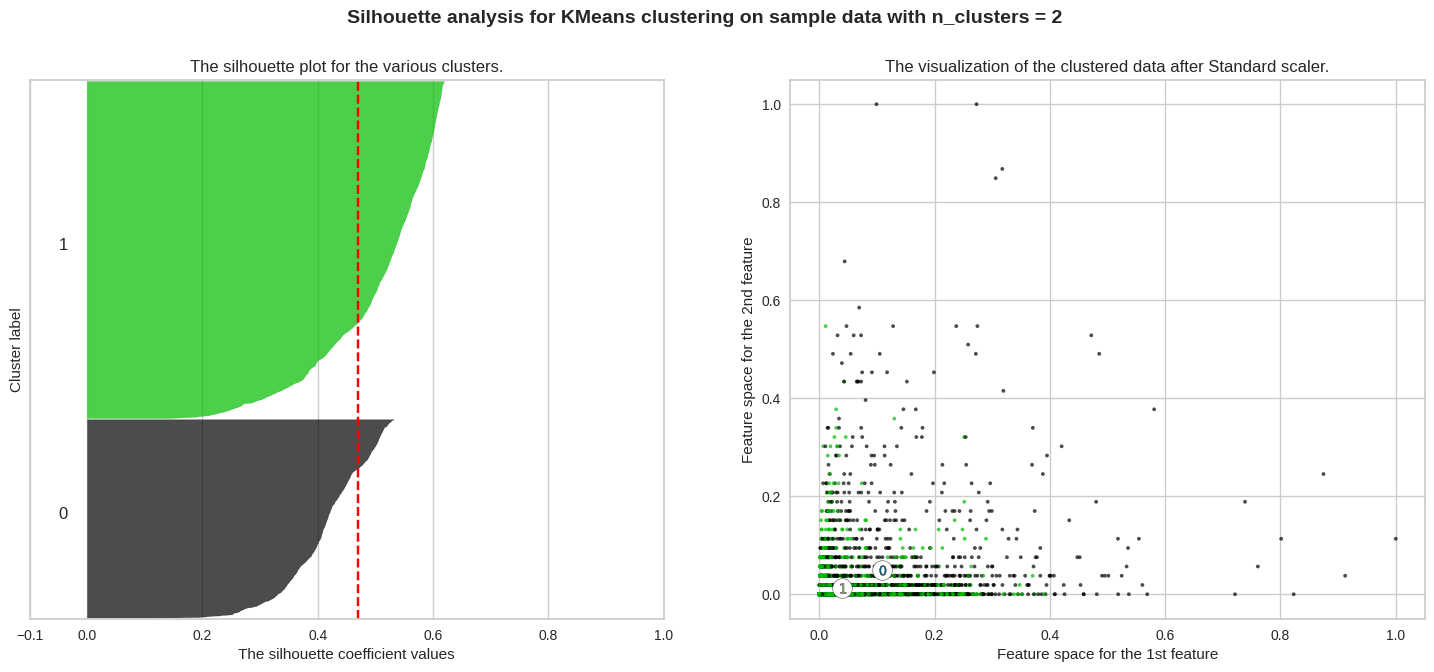

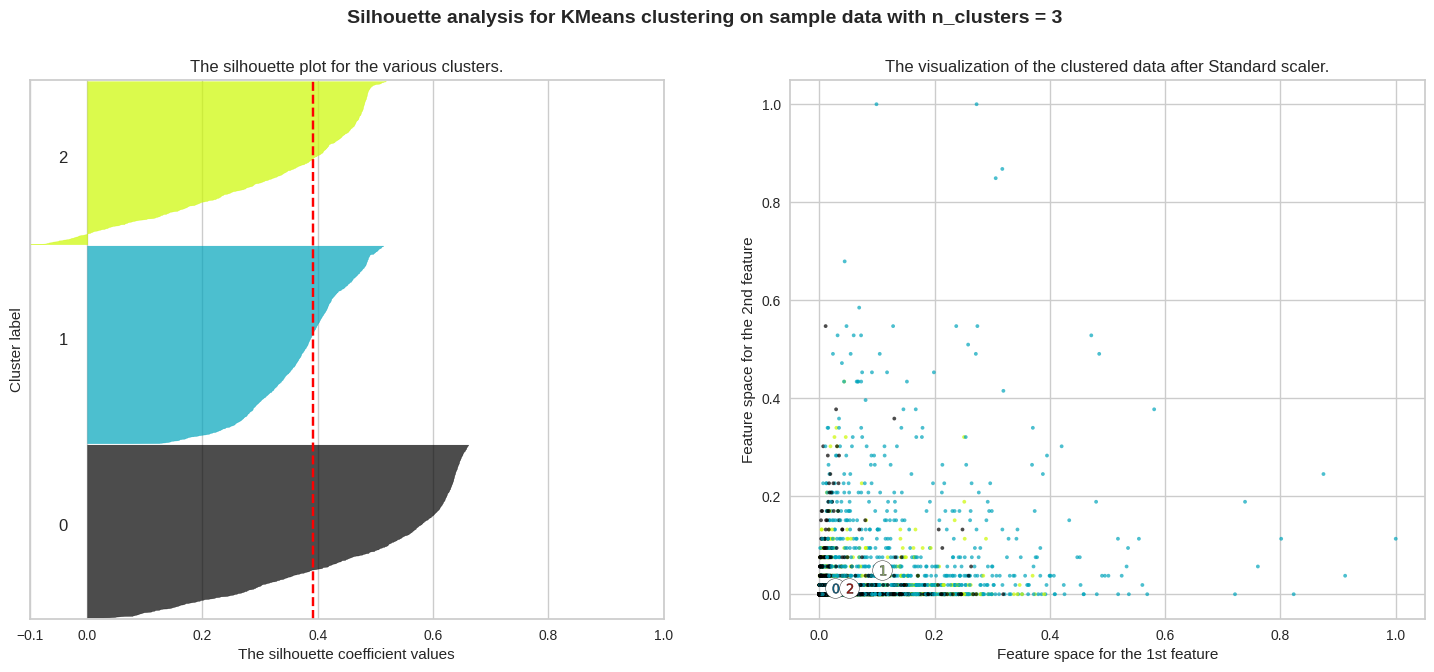

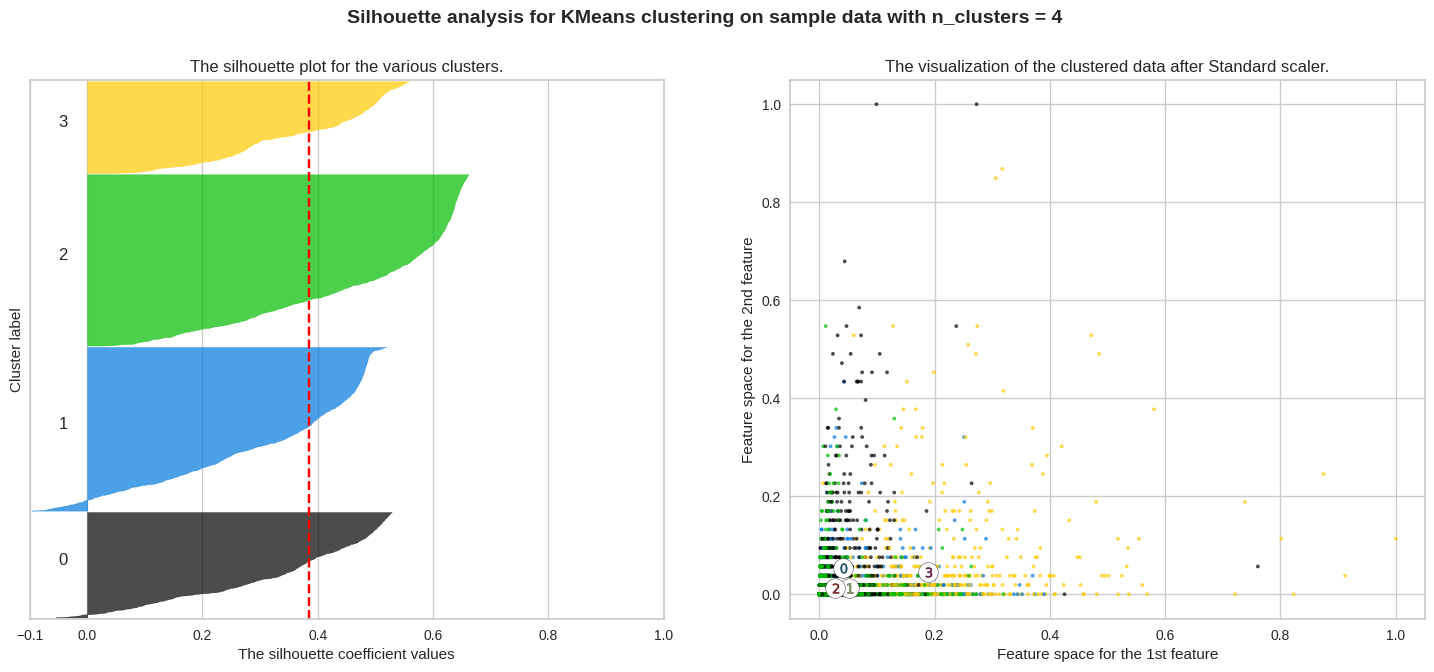

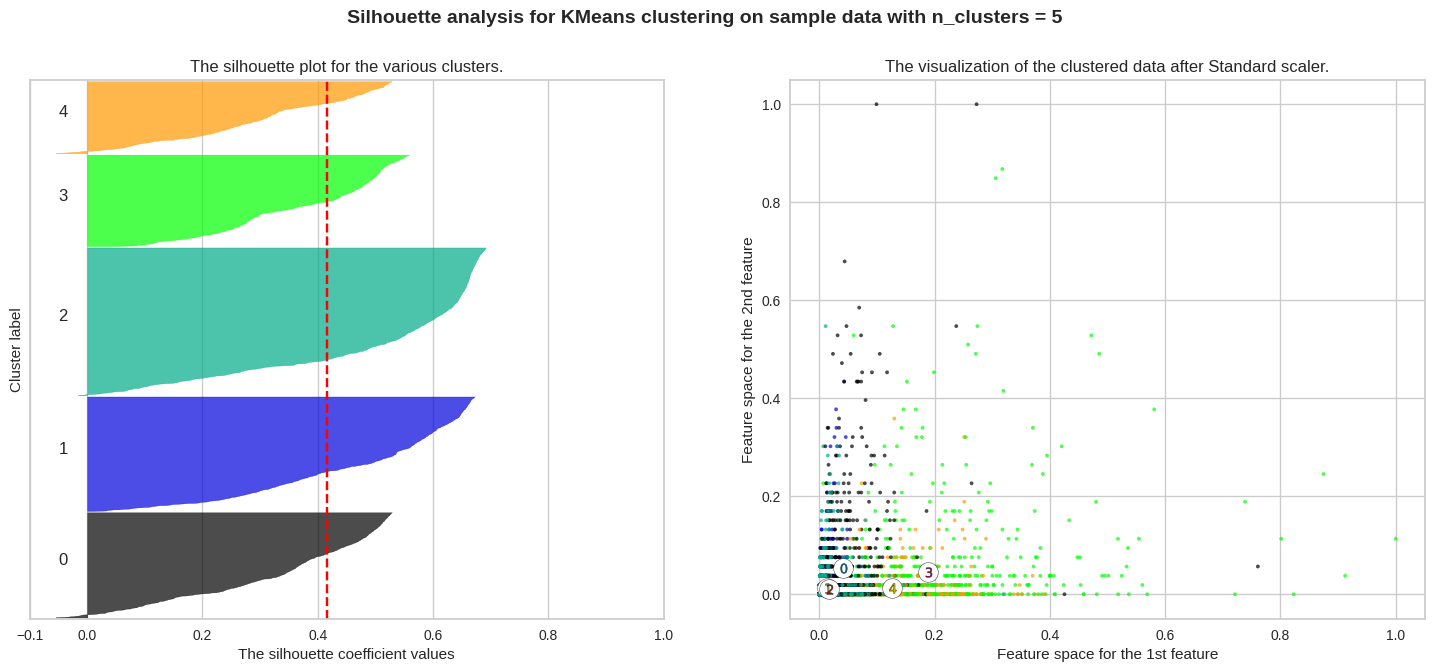

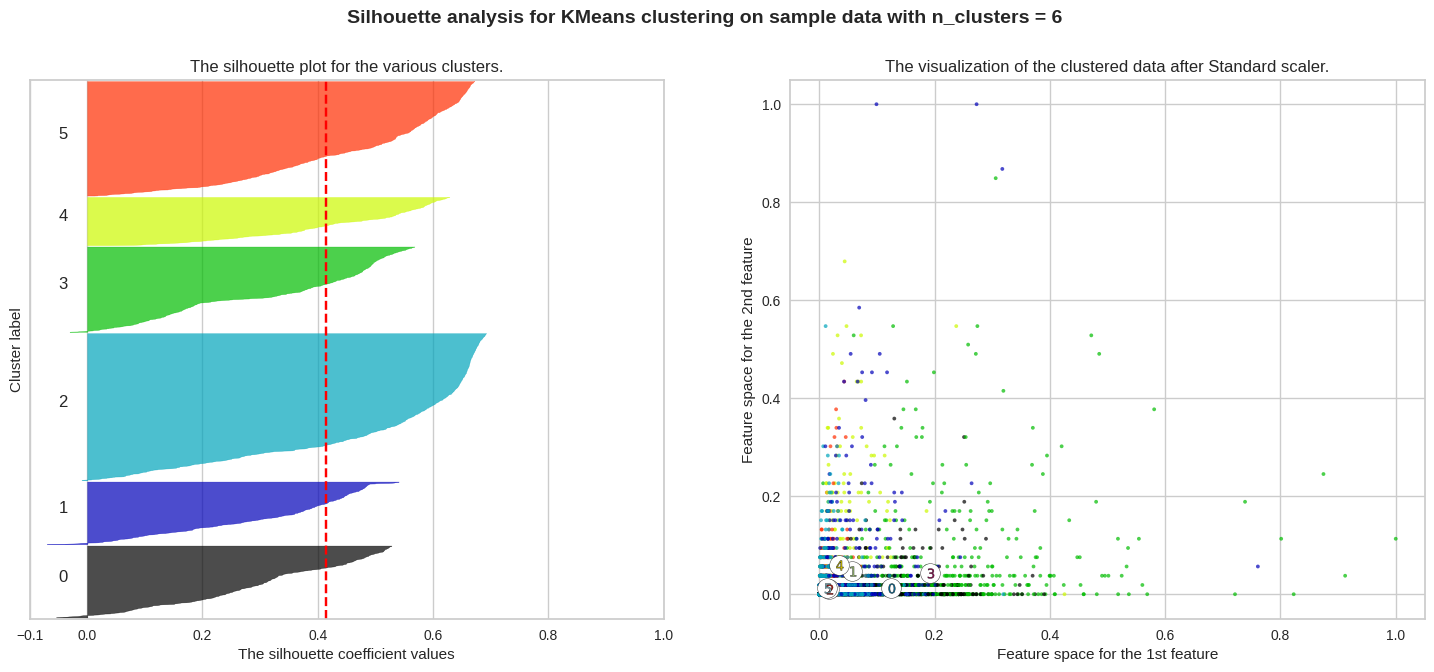

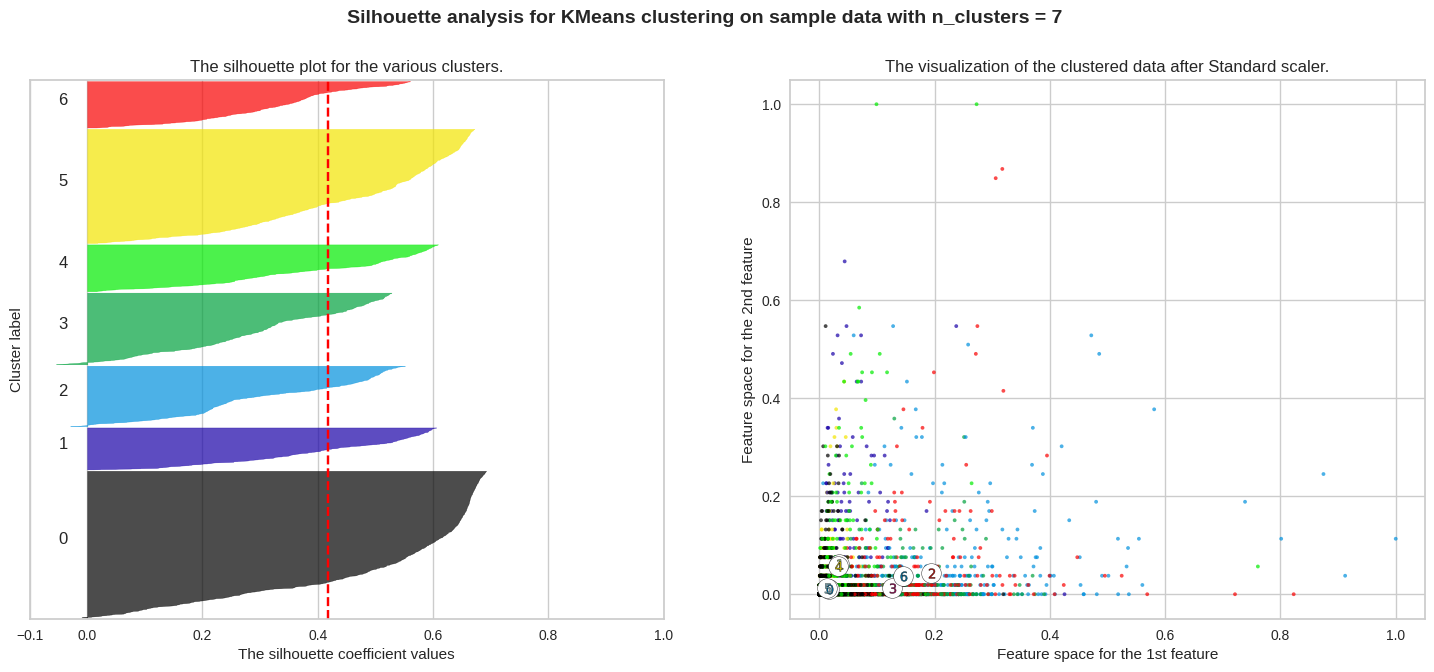

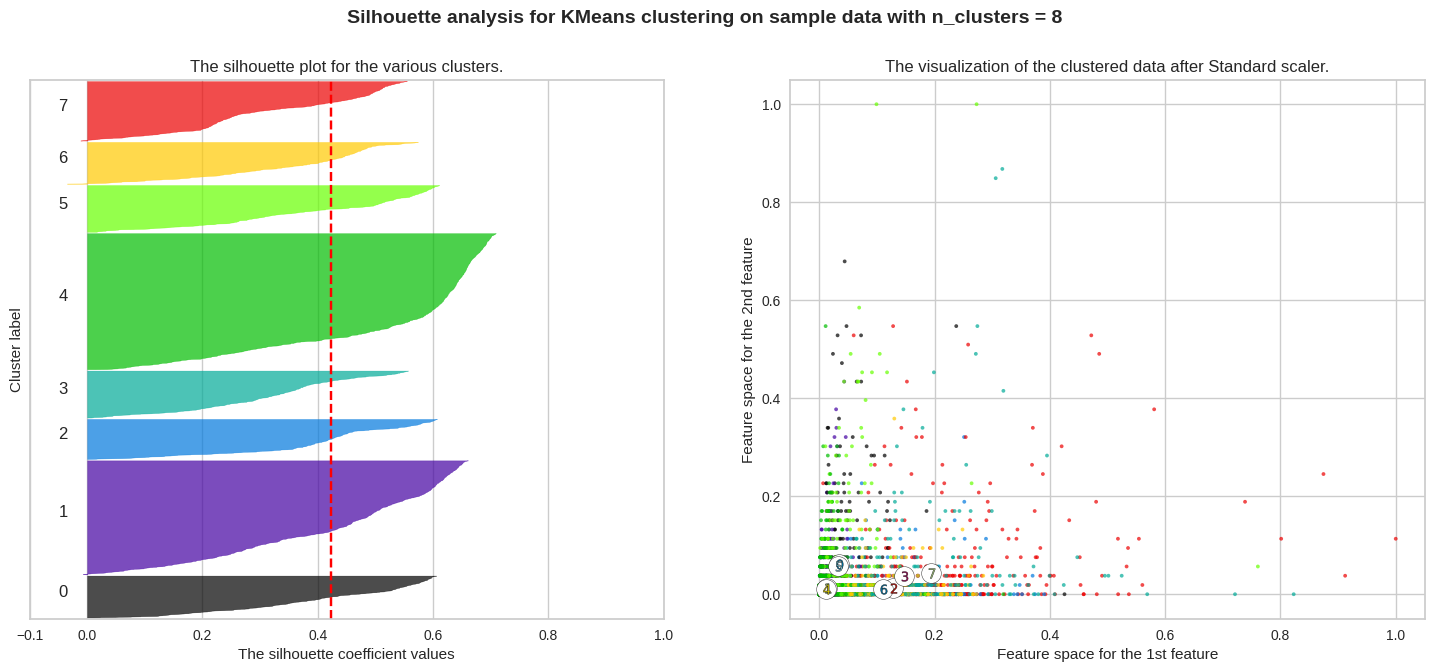

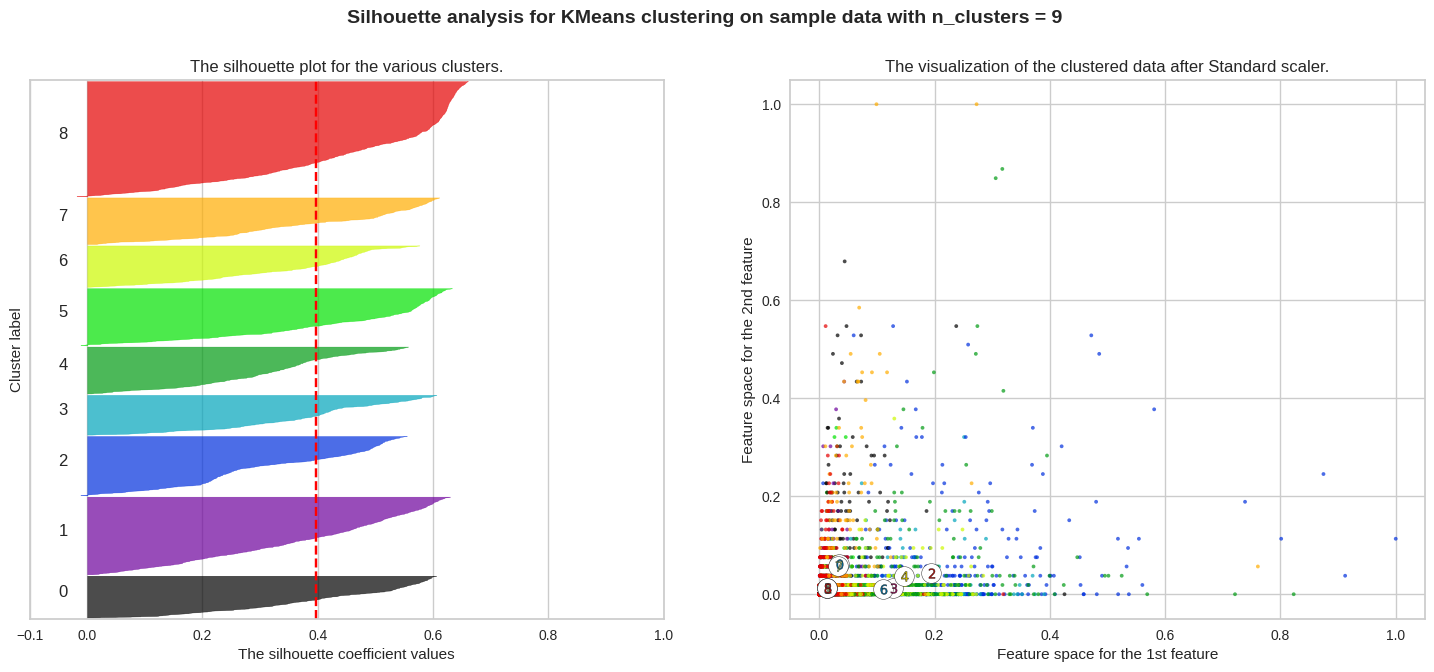

In [ ]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(minmax_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(minmax_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(minmax_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(minmax_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(minmax_df[:,6], minmax_df[:,9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,6], centers[:,9], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**Conclusion:**
According the the silhouette score of:

+ The MinMax Scaler Applied data, the ideal number of clusters is 2, with a score higher than other options, of 0.53, but if you notice the number of cluster 5 has also the best variation within cluster and between cluster with zero to no values going towards -1 and no mismatch in cluster segregation than the consecutive rest

+ If we check silhouette score with Normalize data kmeans model 0.53>0.32. Best score always close to +1.

## **6.5 Build KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset**

In [ ]:
# we have found good number of cluster = 2
# model building using cluster numbers = 2

model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

(3998,)

In [ ]:
# these are nothing but cluster labels...

y_predict_kmeans

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:

model_kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[ 4.33978319e-01,  5.69280197e-02,  2.15461508e-02,
         4.15428764e-01,  7.76502363e-03,  4.55773126e-03,
         1.09621005e-01,  1.83518364e-01,  2.78255837e-02,
         4.90489598e-02,  5.57398375e-01,  1.00000000e+00],
       [ 5.40170028e-01,  3.50949497e-02,  7.86125463e-03,
         1.76400477e-01,  6.95272149e-03,  2.18514104e-03,
         3.88029372e-02,  1.06355850e-01,  7.34601684e-03,
         1.23162495e-02,  4.60517912e-01, -6.99440506e-15]])

In [ ]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster.
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

1146.1577999414565

In [ ]:
#Assign clusters to the data set
# df = pd.read_excel('/content/sample_data/EastWestAirlines.xlsx', sheet_name='data')
data.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
data['Kmeans_label'] = model_kmeans.labels_

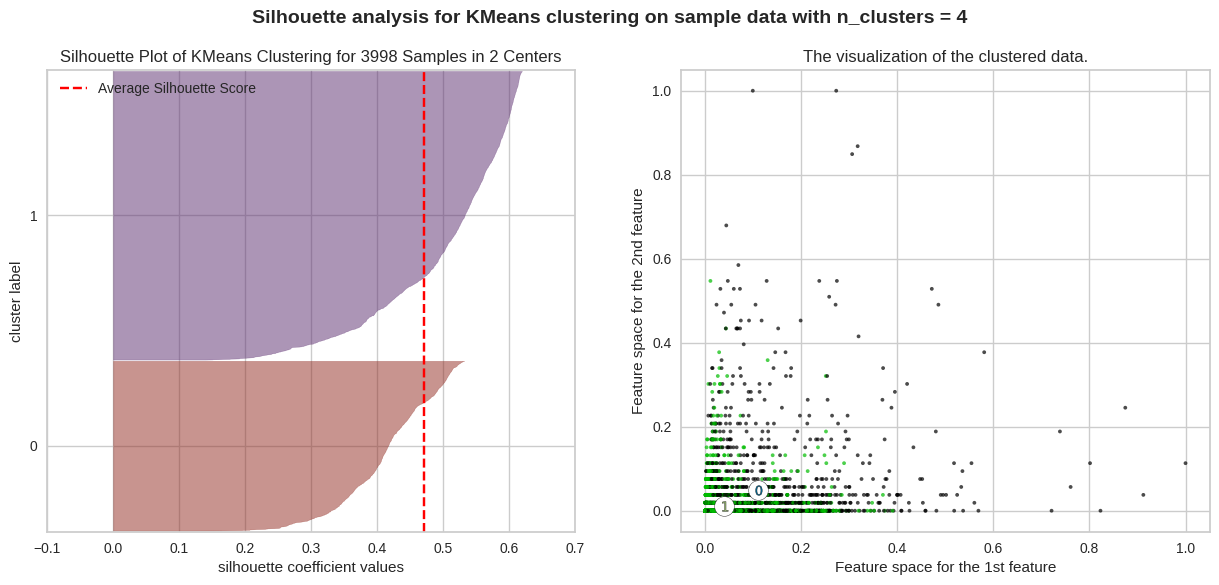

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(minmax_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 2) # 2 is number of clusters
ax2.scatter(minmax_df[:, 6], minmax_df[:, 9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 4),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

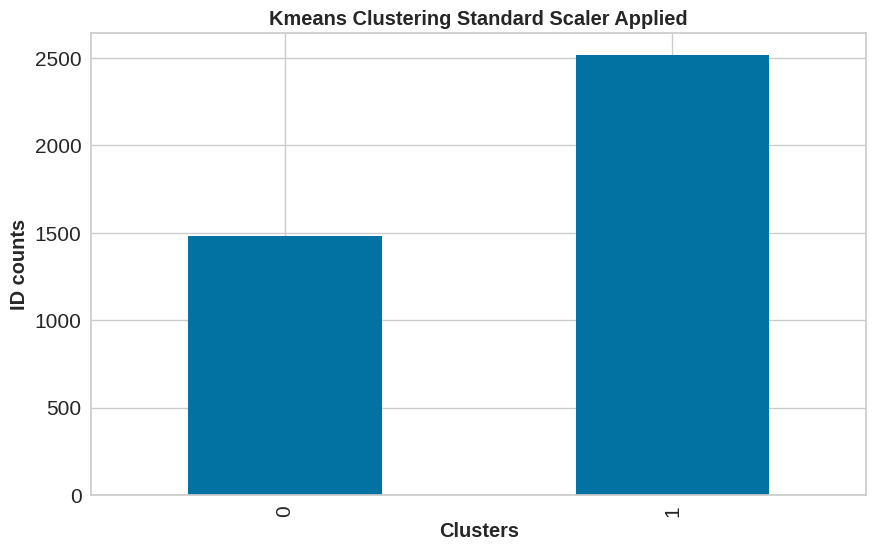

In [ ]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['Kmeans_label']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [ ]:
# Group data by Clusters (K=2)
data.groupby('Kmeans_label').agg(['mean'])

ID       Balance  Qual_miles cc1_miles cc2_miles  \
                     mean          mean        mean      mean      mean   
Kmeans_label                                                              
0             1745.592843  97053.051317  240.196489  2.661715  1.015530   
1             2172.483512  59831.203814  87.637267   1.705602  1.013905   

             cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo  \
                  mean          mean        mean              mean   
Kmeans_label                                                         
0             1.018231  28905.414585  15.782579   857.501013         
1             1.008741  10231.752483  9.146603    226.382201         

             Flight_trans_12 Days_since_enroll Award  
                        mean              mean  mean  
Kmeans_label                                          
0             2.599595        4625.062120       1.0   
1             0.652761        3821.535558       0.0

### We can now clearly see the 2 number of clusters formed, which can be described as under

+ Cluster1, Tier 1 = "1" = Defines the group of fliers that earn the most out of the card and are frequent fliers
+ Cluster0, Tier 2 = "0" = Defines the group of fliers that earn the least and are the least frequent fliers

## **7 Hierarchical Clustering Algorithm**


### **What is Hierarchical Clustering?**
* Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics.One of the major considerations in using the K-means algorithm is deciding the value of K beforehand. The hierarchical clustering algorithm does not have this restriction.The output of the hierarchical clustering algorithm is quite different from the K-mean algorithm as well. It results in an inverted tree-shaped structure, called the dendrogram.

### **Types Of Hierarchical Clustering:**
**There are two types of hierarchical clustering:**

**Agglomerative**: The data points are clustered using a bottom-up approach starting with individual data points.

**Divisive**: The top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

**The key operation in hierarchical agglomerative clustering is to repeatedly combine the two nearest clusters into a larger cluster. There are three key questions that need to be answered first:**

How many numbers of cluster. Also deciding which transformation data we will use to build model.

**Qiuck Notes:**

linkage{“ward”, “complete”, “average”, “single”}, default=”ward” Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

ward minimizes the variance of the clusters being merged.

average uses the average of the distances of each observation of the two sets.

complete or maximum linkage uses the maximum distances between all observations of the two sets.

single uses the minimum of the distances between all observations of the two sets.

## **7.1 Dendogram on MinMaxScaler Applied on Dataset**

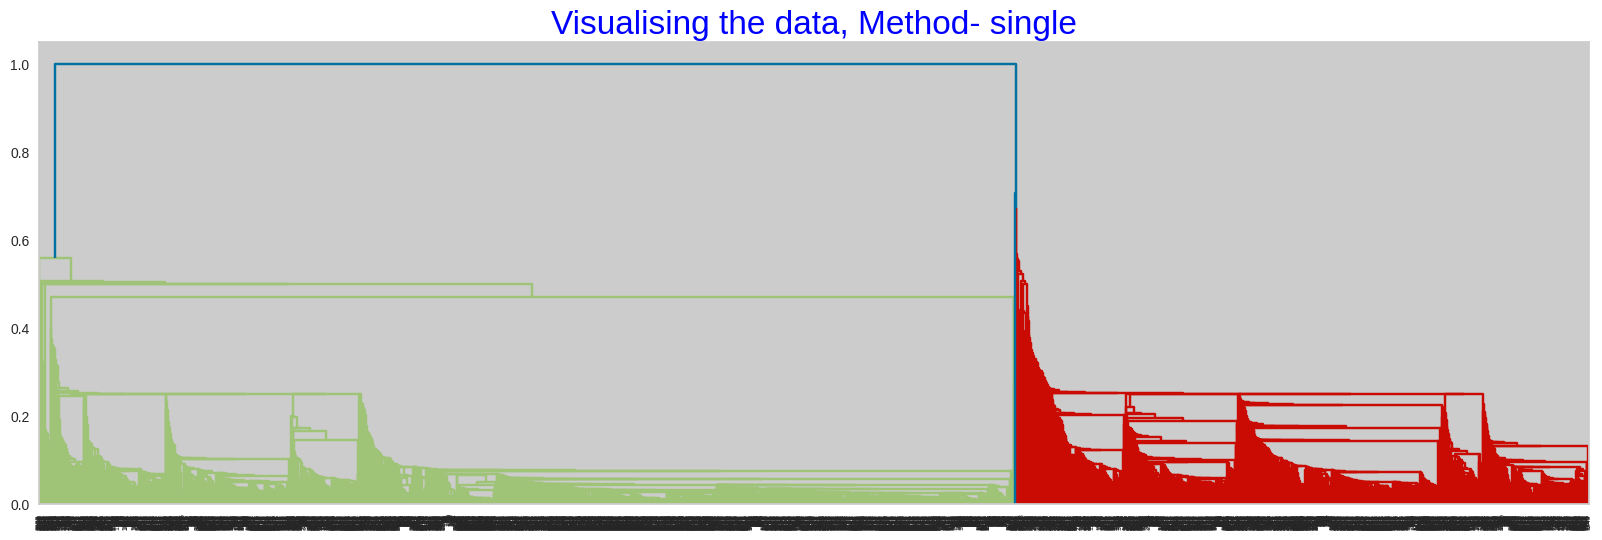

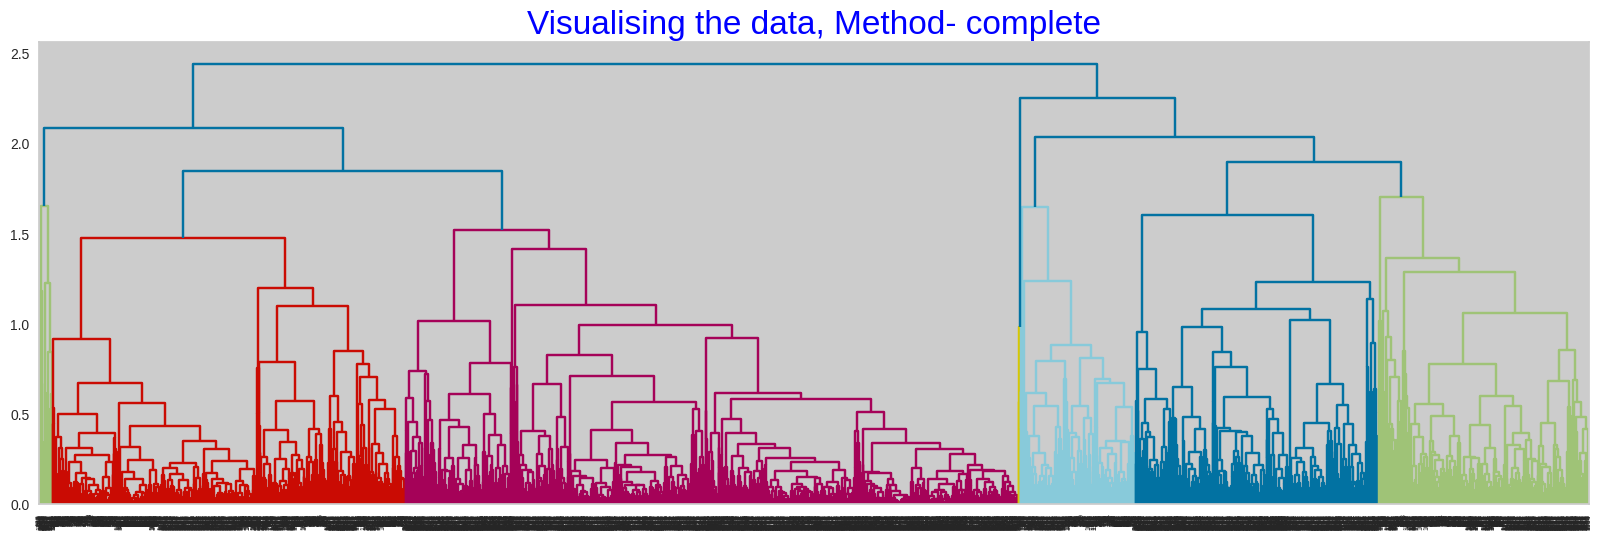

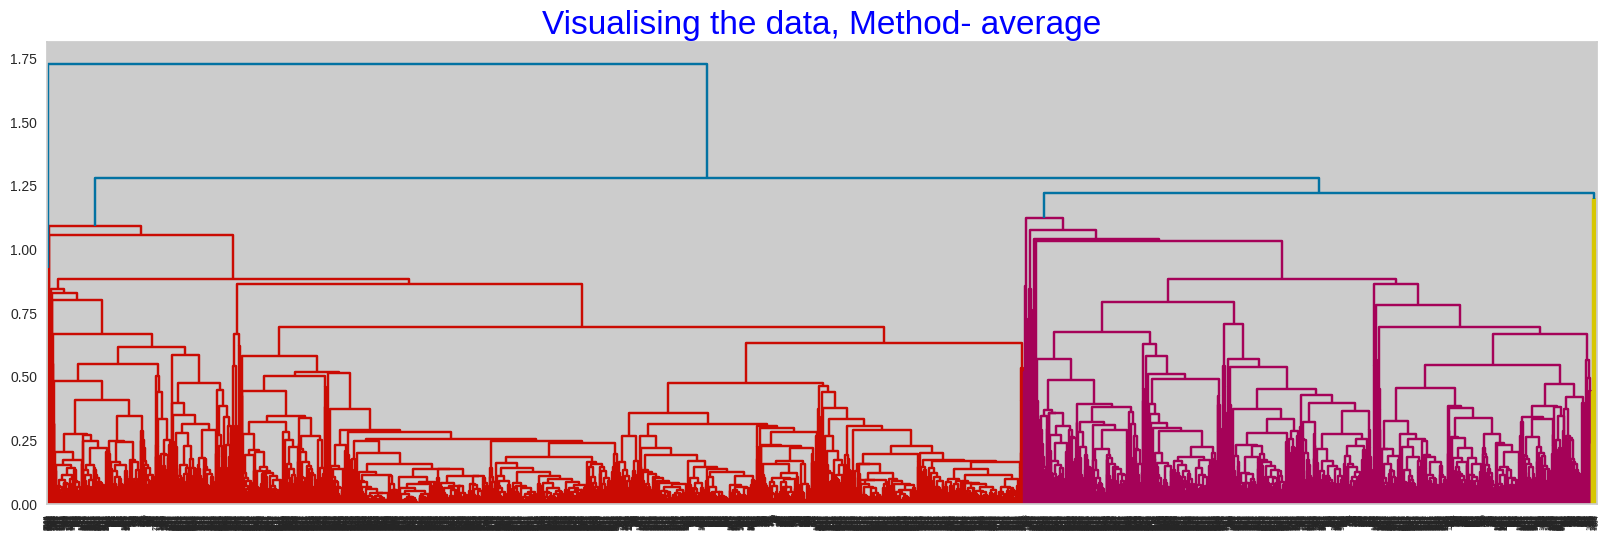

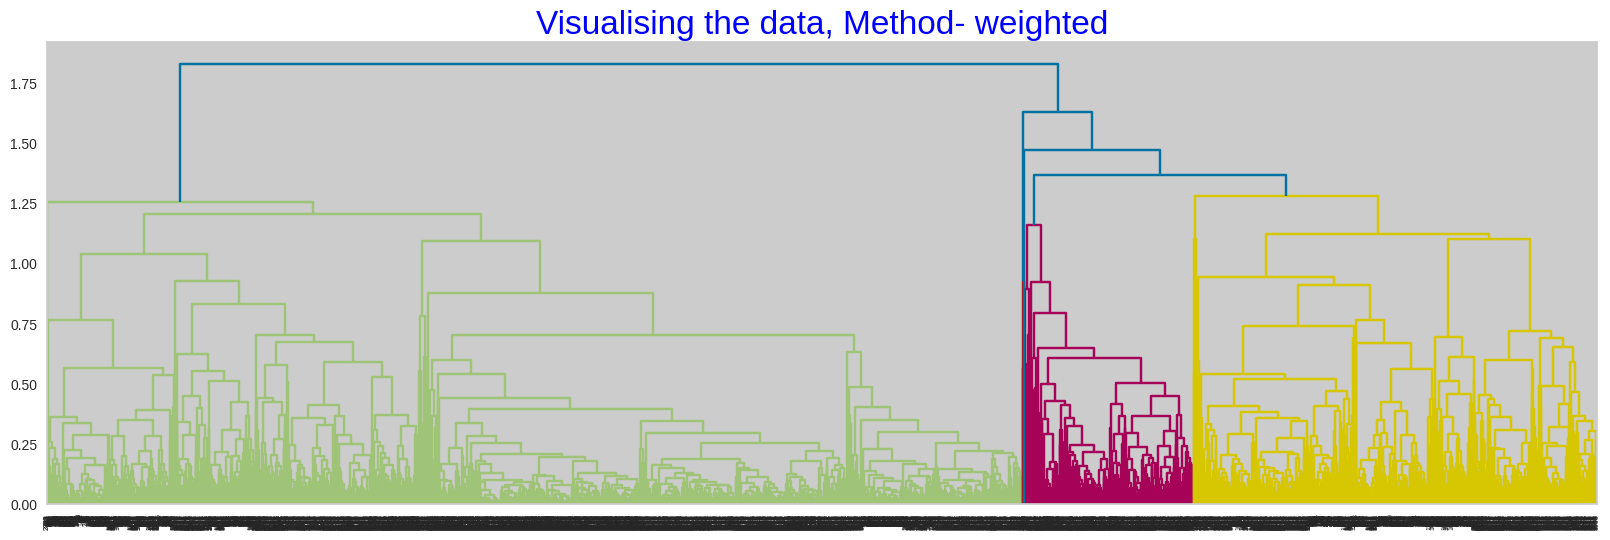

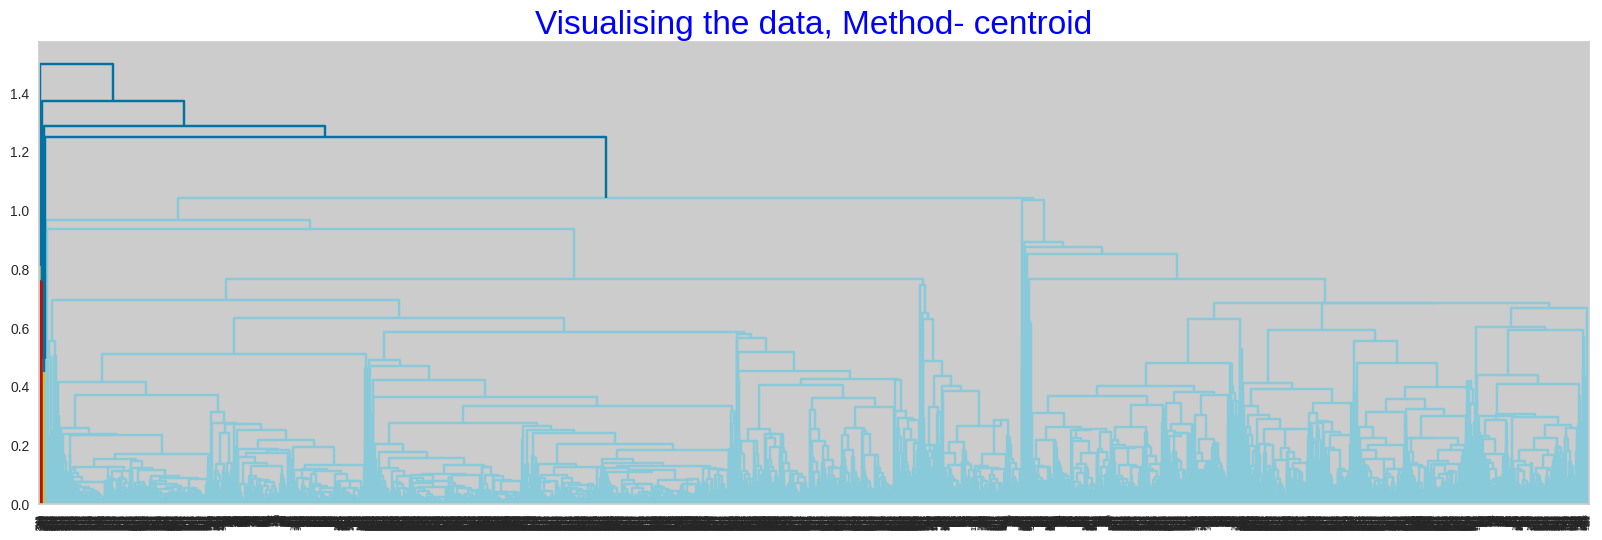

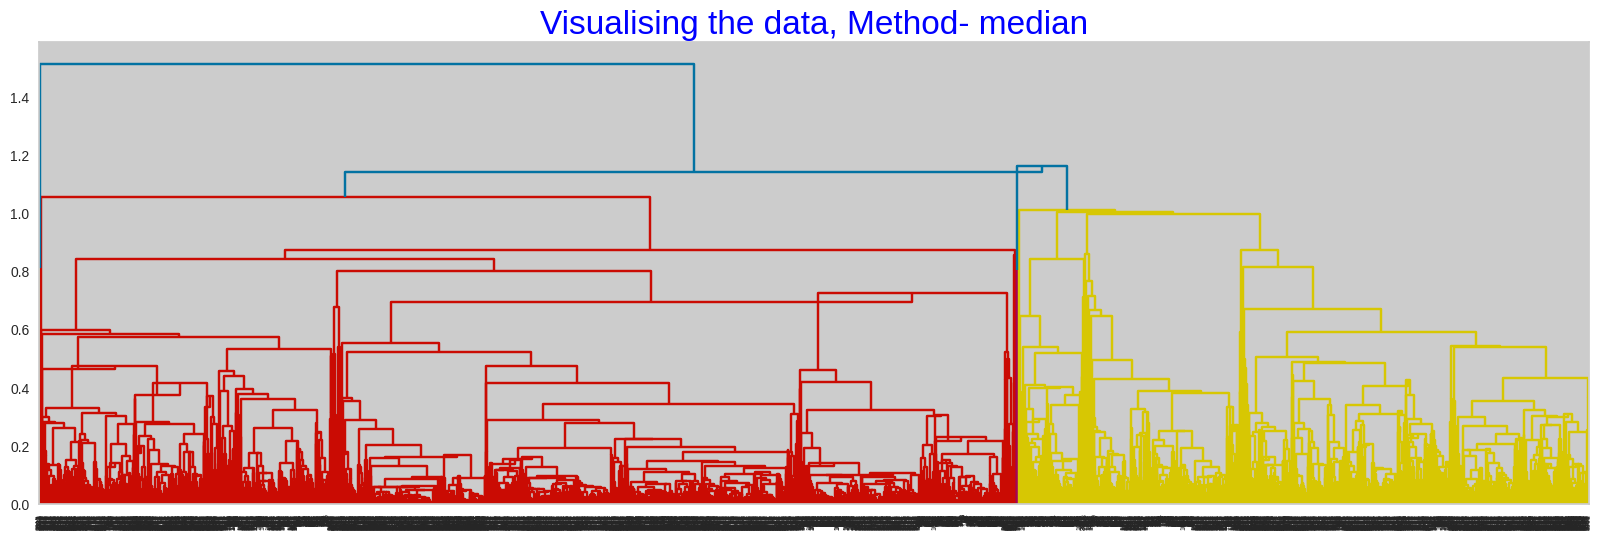

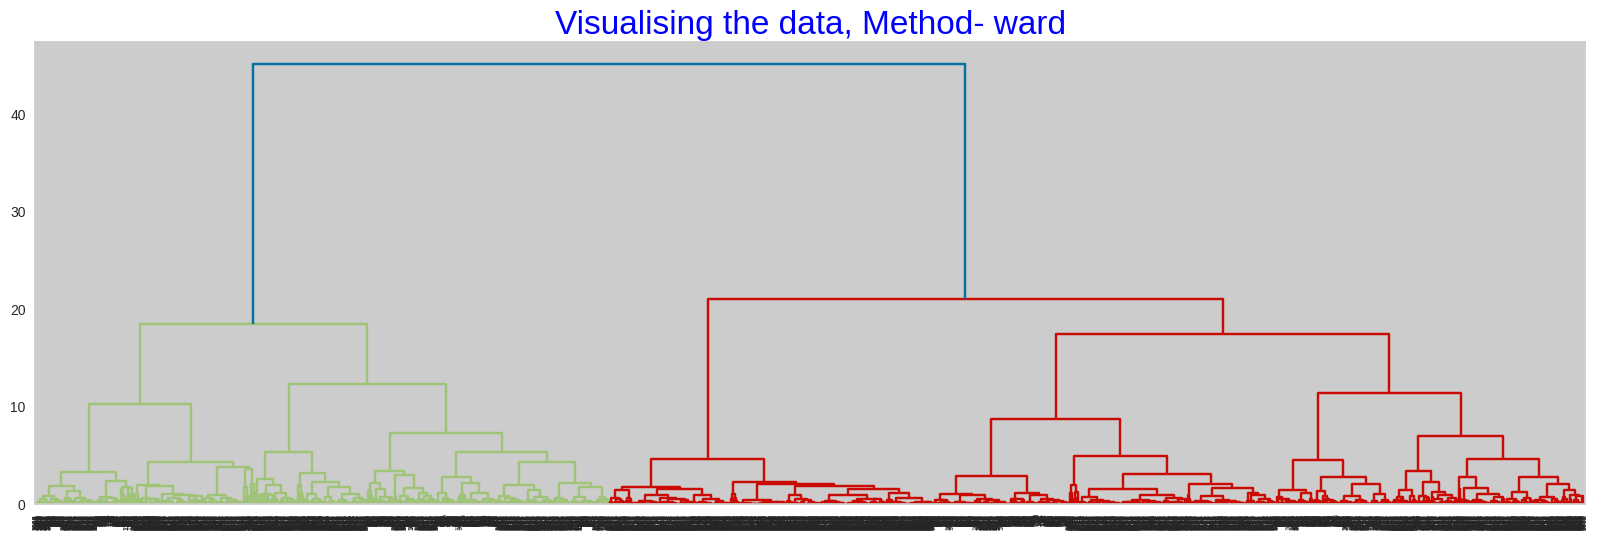

In [ ]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding.
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(20, 6))

    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}

    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [ ]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.47017759216114996
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.46763890255936175
For n_clusters = 2 The average silhouette_score with linkage- average : 0.435630091514725
For n_clusters = 2 The average silhouette_score with linkage- single : 0.47017759216114996

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3433014389762856
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.46582512291727357
For n_clusters = 3 The average silhouette_score with linkage- average : 0.46832271023422356
For n_clusters = 3 The average silhouette_score with linkage- single : 0.46941629488935205

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.32605626387825126
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4121932493978273
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4383699578681831

### **The seperation in Ward Method indicate that 2 is the optimal number for clusters.**
Ward method is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster.

## **7.2 Dendrogram on Standard Scaler Applied on Data**

In [ ]:
n_clusters = [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.1940989689351882
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.7147195049012249
For n_clusters = 2 The average silhouette_score with linkage- average : 0.7986654913110923
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8467091286146867

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.20338658041948868
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7191794591014119
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7607153819176408
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7171762169349064

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.21004926235997418
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6276597026181945
For n_clusters = 4 The average silhouette_score with linkage- average : 0.719231475080801
For 

**Conclusion**: Max score is with cluster numbers 2 in standard scaler transformation and in Min Max scaler transformation.

+ Heirarchical clustering means creating a tree of clusters by iteratively grouping or separating data points. There are two types of hierarchical clustering: Agglomerative clustering Divisive clustering We now apply the Agglomerative clustering technique:Agglomerative clustering is kind of a bottom-up approach. Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined

## **7.3 PCA**


### **7.3A Running PCA of standardized data.**

In [ ]:
# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

In [ ]:
# variance containing in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[28.73938159 15.9656202  12.89207962  8.52181076  8.17579283  7.98758132
  6.80794166  5.42924181  3.00326931]


In [ ]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([28.73938159, 44.70500179, 57.59708142, 66.11889217, 74.294685  ,
       82.28226633, 89.09020799, 94.5194498 , 97.5227191 ])

### **Conclusion:**
by applying PCA on standardized data with 95% variance it gives 9 PCA components.

## **7.3B Silhouette Score method for PCA Standard Scaled Data**

In [ ]:
n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = sil(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.1824281040986474
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.7987136762187571
For n_clusters = 2 The average silhouette_score with linkage- average : 0.7987136762187571
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8455993114307072

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.1858308194164537
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7635589923160888
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7635589923160888
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7207476236126068

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.19321663139761555
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6483969342295867
For n_clusters = 4 The average silhouette_score with linkage- average : 0.625625599845614
For n

## **7.3C Run Hierarchical Clustering.(Agglomerative Clustering)**

In [ ]:
agg_clustering=AgglomerativeClustering(n_clusters=10,linkage='ward')
agg_clustering

AgglomerativeClustering(n_clusters=10)

In [ ]:
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(3998,)


array([9, 9, 9, ..., 4, 6, 6])

**Ward** method is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster.

In [ ]:
# Cluster numbers

agg_clustering.n_clusters_

10

In [ ]:
# Clustering Score

(sil(pca_std_df, agg_clustering.labels_)*100).round(3)

21.383

### **Putting Cluster lables into original dataset And analysis of the same**

In [ ]:
# Concating Labels with main dataset copy

data['Hierarchical_labels'] = agg_clustering.labels_
data.head()

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  1   28143    0           1          1          1          174           
1  2   19244    0           1          1          1          215           
2  3   41354    0           1          1          1          4123          
3  4   14776    0           1          1          1          500           
4  5   97752    0           4          1          1          43300         

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
0  1            0                  0                7000               0       
1  2            0                  0                6968               0       
2  4            0                  0                7034               0       
3  1            0                  0                6952               0       
4  26           2077               4                6935               1       

   Kmeans_label  Hierarchical_labels  
0  1             9                    
1  1             9                    
2  1             9                    
3  1             9                    
4  0             0

In [ ]:
data.groupby('Hierarchical_labels').agg(['mean'])

ID        Balance   Qual_miles cc1_miles  \
                            mean           mean         mean      mean   
Hierarchical_labels                                                      
0                    998.634638   126192.403321  22.848161    2.903915   
1                    1930.428571  104701.962406  3509.849624  2.075188   
2                    2443.152838  57244.735808   68.395197    1.279476   
3                    1121.617225  172900.205742  67.851675    4.775120   
4                    2664.800718  70521.224417   6.958707     3.382406   
5                    2269.372093  68876.581395   23.255814    1.139535   
6                    3240.929117  31160.972737   10.969466    1.078517   
7                    1742.444444  129951.388889  65.666667    3.388889   
8                    1875.244444  157364.822222  594.511111   2.111111   
9                    1202.357419  40559.678710   2.409032     1.095484   

                    cc2_miles cc3_miles   Bonus_miles Bonus_trans  \
                         mean      mean          mean        mean   
Hierarchical_labels                                                 
0                    1.000000  1.000000  24243.499407  14.567023    
1                    1.000000  1.000000  20211.518797  12.413534    
2                    1.000000  1.000000  8152.043668   9.735808     
3                    1.000000  1.000000  79562.861244  24.143541    
4                    1.000000  1.000000  29628.811490  17.639138    
5                    2.348837  1.000000  14689.837209  17.534884    
6                    1.000000  1.000000  2820.401309   5.786260     
7                    1.000000  3.722222  86259.888889  26.222222    
8                    1.000000  1.000000  36003.644444  35.600000    
9                    1.000000  1.000000  2813.552258   6.452903     

                    Flight_miles_12mo Flight_trans_12 Days_since_enroll  \
                                 mean            mean              mean   
Hierarchical_labels                                                       
0                    235.008304        0.720047        5890.798339        
1                    657.774436        2.105263        4261.436090        
2                    1312.043668       3.862445        3400.982533        
3                    1203.468900       3.645933        5757.038278        
4                    185.890485        0.554758        3008.303411        
5                    582.627907        2.209302        3968.930233        
6                    73.905125         0.268266        1933.568157        
7                    422.222222        1.333333        4488.777778        
8                    9180.622222       25.111111       4289.488889        
9                    109.203871        0.349677        5524.827097        

                        Award Kmeans_label  
                         mean         mean  
Hierarchical_labels                         
0                    0.457888  0.542112     
1                    0.601504  0.398496     
2                    0.831878  0.168122     
3                    0.990431  0.009569     
4                    0.651706  0.348294     
5                    0.395349  0.604651     
6                    0.000000  1.000000     
7                    0.500000  0.500000     
8                    0.844444  0.155556     
9                    0.000000  1.000000

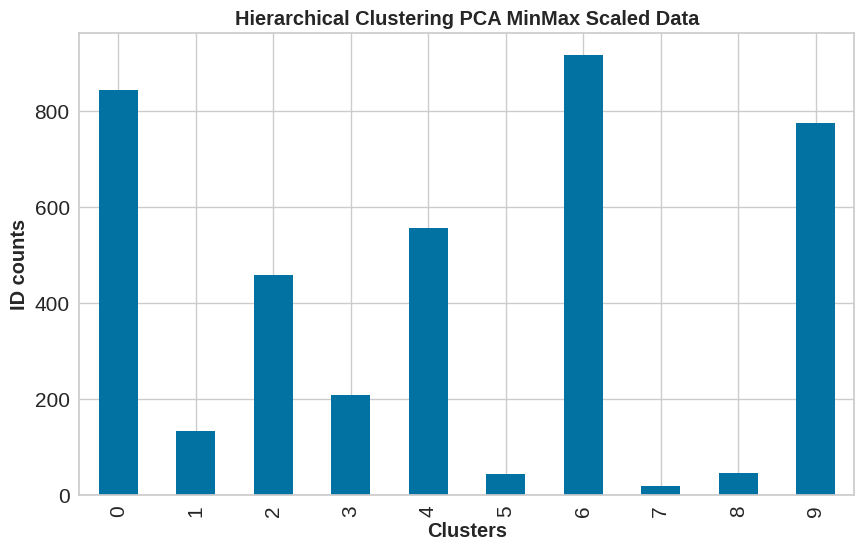

In [ ]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['Hierarchical_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

## **7.3D Running PCA of MinMaxscalar data.**

In [ ]:
# applying PCA on minmax_df

from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [ ]:
# eigenvalues..

print(pca_minmax.singular_values_)

[33.23332299 23.19162531 19.5800065   6.55425077]


In [ ]:
# variance containing in each formed PCA

print(pca_minmax.explained_variance_ratio_*100)

[51.04747241 24.85931043 17.71953699  1.98551336]


**Conclusion:**
By applying PCA on MinMaxscalr transformation data gives 4 PCA components.

### **7.3E Silhouette Score method for PCA MinMax Scaled Data**

In [ ]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(pca_minmax_df)
        silhouette_score2 = sil(pca_minmax_df, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.489880365195642
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4409625822717486
For n_clusters = 2 The average silhouette_score with linkage- average : 0.489880365195642
For n_clusters = 2 The average silhouette_score with linkage- single : 0.489880365195642

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.37619746036840257
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.48753998097609497
For n_clusters = 3 The average silhouette_score with linkage- average : 0.46388377469375813
For n_clusters = 3 The average silhouette_score with linkage- single : 0.46849335771943157

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.4144144522608323
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4342850514835462
For n_clusters = 4 The average silhouette_score with linkage- average : 0.44245039064143055
For

**Conclusion**: Max score is with cluster numbers 2 for ward and mostly others.

### **7.3F Run Hierarchical Clustering.(Agglomerative Clustering)**

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(pca_minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(3998,)


array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# Cluster numbers

agg_clustering.n_clusters_

2

In [ ]:
# Clustering Score

(sil(pca_minmax_df, agg_clustering.labels_)*100).round(3)

48.988

### **Putting Cluster lables into original dataset And analysis of the same**

In [ ]:
# Concating Labels with main dataset copy

data['Hierarchical_labels'] = agg_clustering.labels_
data.head()

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  1   28143    0           1          1          1          174           
1  2   19244    0           1          1          1          215           
2  3   41354    0           1          1          1          4123          
3  4   14776    0           1          1          1          500           
4  5   97752    0           4          1          1          43300         

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
0  1            0                  0                7000               0       
1  2            0                  0                6968               0       
2  4            0                  0                7034               0       
3  1            0                  0                6952               0       
4  26           2077               4                6935               1       

   Kmeans_label  Hierarchical_labels  
0  1             0                    
1  1             0                    
2  1             0                    
3  1             0                    
4  0             1

In [ ]:
data.groupby('Hierarchical_labels').agg(['mean'])

ID       Balance  Qual_miles cc1_miles  \
                            mean          mean        mean      mean   
Hierarchical_labels                                                    
0                    2172.483512  59831.203814  87.637267   1.705602   
1                    1745.592843  97053.051317  240.196489  2.661715   

                    cc2_miles cc3_miles   Bonus_miles Bonus_trans  \
                         mean      mean          mean        mean   
Hierarchical_labels                                                 
0                    1.013905  1.008741  10231.752483  9.146603     
1                    1.015530  1.018231  28905.414585  15.782579    

                    Flight_miles_12mo Flight_trans_12 Days_since_enroll Award  \
                                 mean            mean              mean  mean   
Hierarchical_labels                                                             
0                    226.382201        0.652761        3821.535558       0.0    
1                    857.501013        2.599595        4625.062120       1.0    

                    Kmeans_label  
                            mean  
Hierarchical_labels               
0                    1.0          
1                    0.0

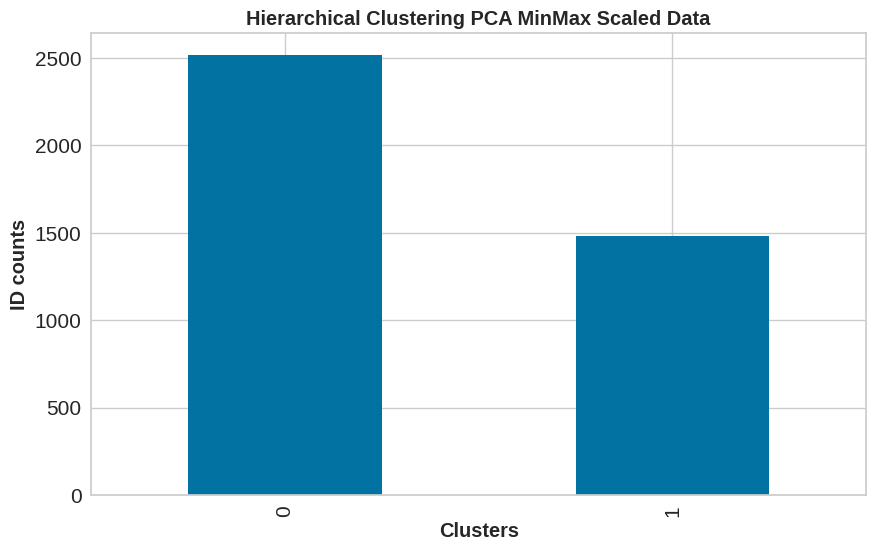

In [ ]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['Hierarchical_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

## **8. DBSCAN - (Density Based Spatial Clustering of Applications with Noise)**

Why do we need a Density-Based clustering algorithm like DBSCAN when we already have K-means clustering?

K-Means clustering may cluster loosely related observations together. Every observation becomes a part of some cluster eventually, even if the observations are scattered far away in the vector space. Since clusters depend on the mean value of cluster elements, each data point plays a role in forming the clusters. A slight change in data points might affect the clustering outcome. This problem is greatly reduced in DBSCAN due to the way clusters are formed. This is usually not a big problem unless we come across some odd shape data.

Another challenge with k-means is that you need to specify the number of clusters (“k”) in order to use it. Much of the time, we won’t know what a reasonable k value is a priori.

What’s nice about DBSCAN is that you don’t have to specify the number of clusters to use it. All you need is a function to calculate the distance between values and some guidance for what amount of distance is considered “close”. DBSCAN also produces more reasonable results than k-means across a variety of different distributions. Below figure illustrates the fact:

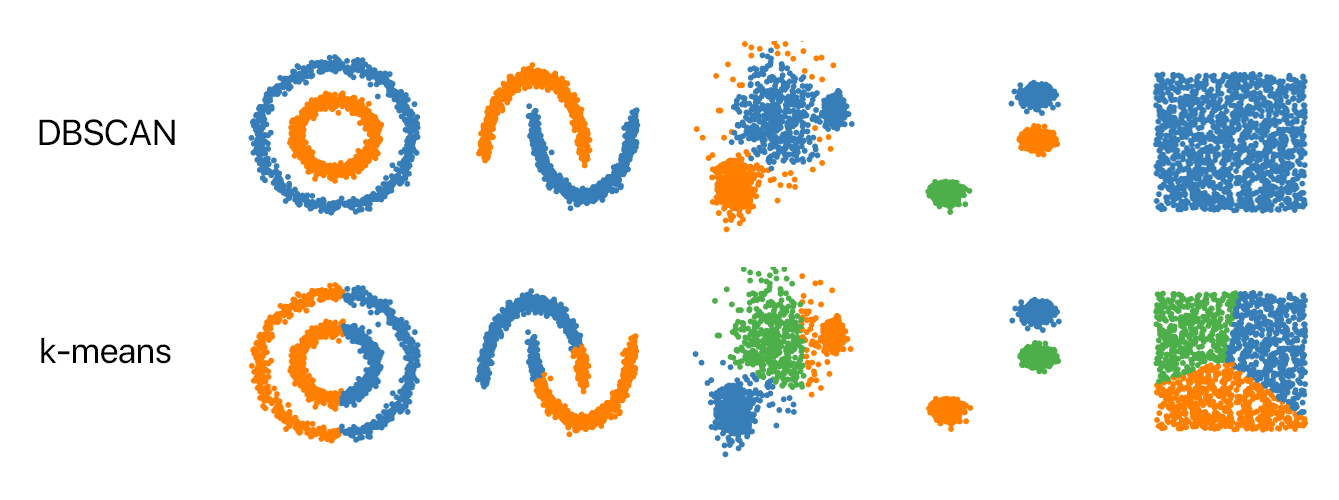

### **Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.**
The DBSCAN algorithm uses two parameters:

+ minPts: The minimum number of points (a threshold) clustered together for a region to be considered dense.

+ eps (ε): A distance measure that will be used to locate the points in the neighborhood of any point.

**These parameters can be understood if we explore two concepts called Density Reachability and Density Connectivity.**

+ Reachability in terms of density establishes a point to be reachable from another if it lies within a particular distance (eps) from it.

+ Connectivity, on the other hand, involves a transitivity based chaining-approach to determine whether points are located in a particular cluster. For example, p and q points could be connected if p->r->s->t->q, where a->b means b is in the neighborhood of a.

There are three types of points after the DBSCAN clustering is complete:
**bold text**


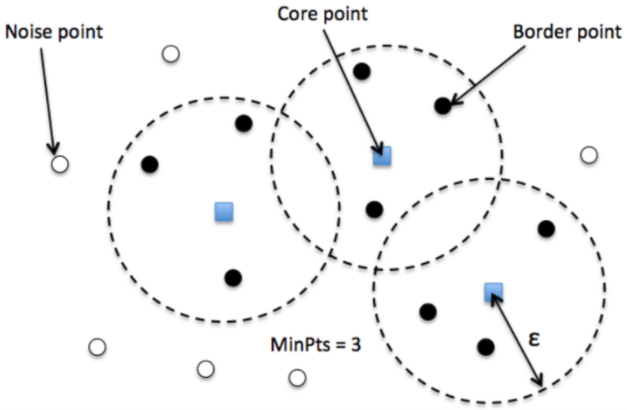

**Core — This is a point that has at least m points within distance n from itself.**

**Border — This is a point that has at least one Core point at a distance n.**

**Noise — This is a point that is neither a Core nor a Border. And it has less than m points within distance n from itself.**

### **Minimum Samples (“MinPts”)**
There is no automatic way to determine the MinPts value for DBSCAN. Ultimately, the MinPts value should be set using domain knowledge and familiarity with the data set. From some research I’ve done, here are a few rules of thumb for selecting the MinPts value:

+ The larger the data set, the larger the value of MinPts should be
+ If the data set is noisier, choose a larger value of MinPts
+ Generally, MinPts should be greater than or equal to the dimensionality of the data set
+ For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).
+ If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998).

### **Epsilon (ε)**
After you select your MinPts value, you can move on to determining ε. One technique to automatically determine the optimal ε value is described in this paper. This technique calculates the average distance between each point and its k nearest neighbors, where k = the MinPts value you selected. The average k-distances are then plotted in ascending order on a k-distance graph. You’ll find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope).

## **8.1 DBSCAN of Standard Scaled Data**
**To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.**

In [ ]:
from itertools import product

eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [ ]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_df, DBS_clustering.labels_))

### **Collecting number of generated clusters.**

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


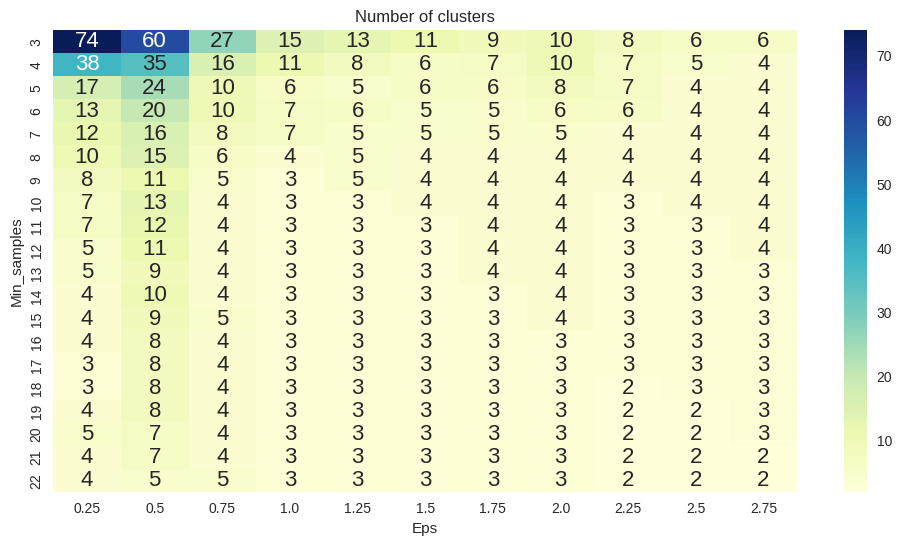

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

### **As the heatplot above shows, the number of clusters vary from 74 to 2.**

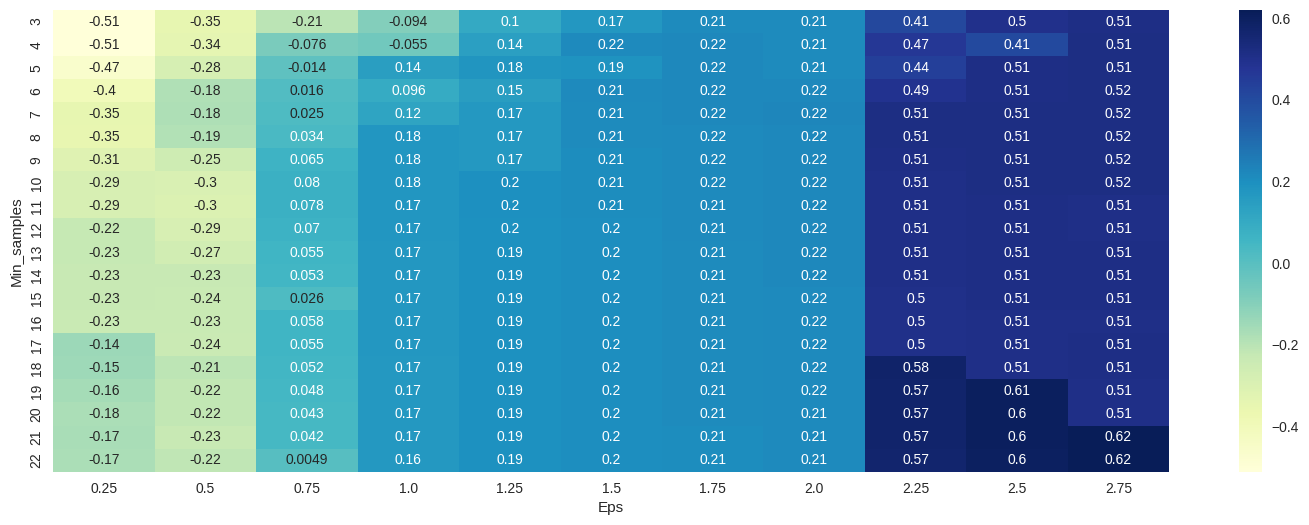

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

### **Global maximum is 0.63 for eps=2.5 and min_samples=21 and 22**

In [ ]:
epsilon = [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75]
min_samples = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 2.75 
min_sample= 21 
number of clusters= 1 
average silhouette score= 0.6197


### **Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values**

In [ ]:
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(std_df)

DBSCAN(eps=2.5, min_samples=21)

In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# -1 are the noise points in our dataset and the rest are the clusters
# Concating Labels with main dataset copy

data['DBSCAN_labels'] = dbscan.labels_
data.head()

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  1   28143    0           1          1          1          174           
1  2   19244    0           1          1          1          215           
2  3   41354    0           1          1          1          4123          
3  4   14776    0           1          1          1          500           
4  5   97752    0           4          1          1          43300         

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
0  1            0                  0                7000               0       
1  2            0                  0                6968               0       
2  4            0                  0                7034               0       
3  1            0                  0                6952               0       
4  26           2077               4                6935               1       

   Kmeans_label  Hierarchical_labels  DBSCAN_labels  
0  1             0                    0              
1  1             0                    0              
2  1             0                    0              
3  1             0                    0              
4  0             1                    0

In [ ]:
data.groupby('DBSCAN_labels').agg(['mean'])

ID        Balance   Qual_miles cc1_miles cc2_miles  \
                      mean           mean         mean      mean      mean   
DBSCAN_labels                                                                
-1             1717.255708  209141.000000  1508.424658  2.479452  1.26484    
 0             2031.565229  65765.766076   65.088383    2.035459  1.00000    

              cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo  \
                   mean          mean        mean              mean   
DBSCAN_labels                                                         
-1             1.223744  44253.849315  24.447489   3323.054795        
 0             1.000000  15578.366499  10.860545   294.261445         

              Flight_trans_12 Days_since_enroll     Award Kmeans_label  \
                         mean              mean      mean         mean   
DBSCAN_labels                                                            
-1             9.56621         4740.178082       0.675799  0.324201      
 0             0.89918         4083.202699       0.352739  0.647261      

              Hierarchical_labels  
                             mean  
DBSCAN_labels                      
-1             0.675799            
 0             0.352739

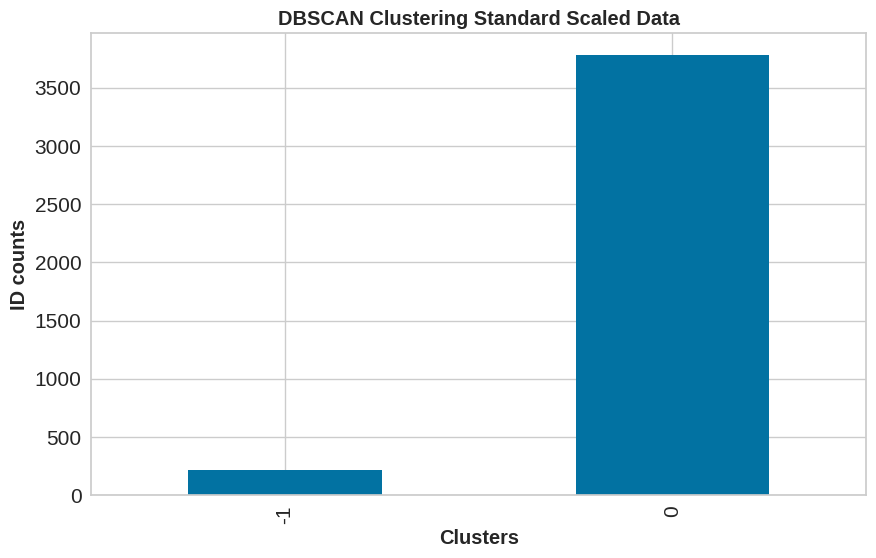

In [ ]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['DBSCAN_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

## **8.2 DBSCAN on MinMax Scaled Data**
**To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.**

In [ ]:
from itertools import product

eps_values = np.arange(0.25,1.25,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [ ]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(minmax_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(minmax_df, DBS_clustering.labels_))

### **Collecting number of generated clusters.**

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


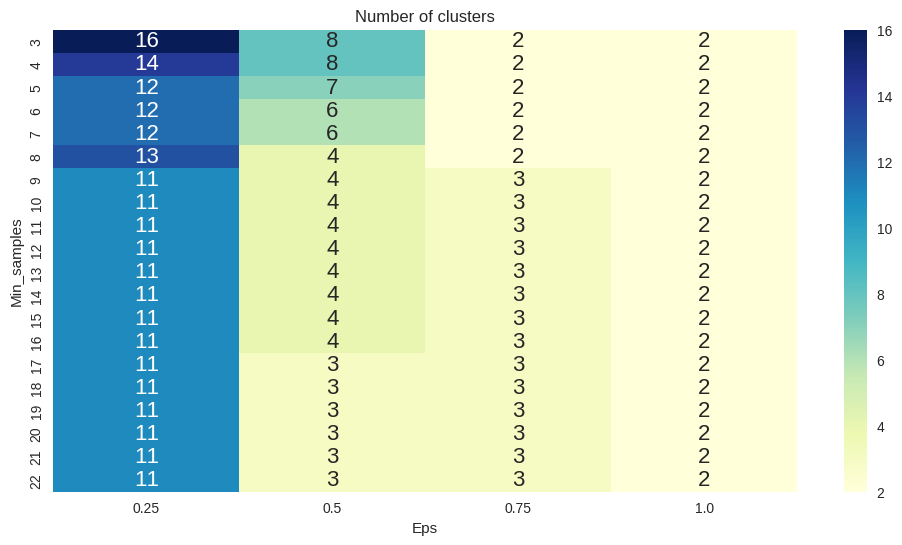

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

### **As the heatplot above shows, the number of clusters vary from 18 to 2.**

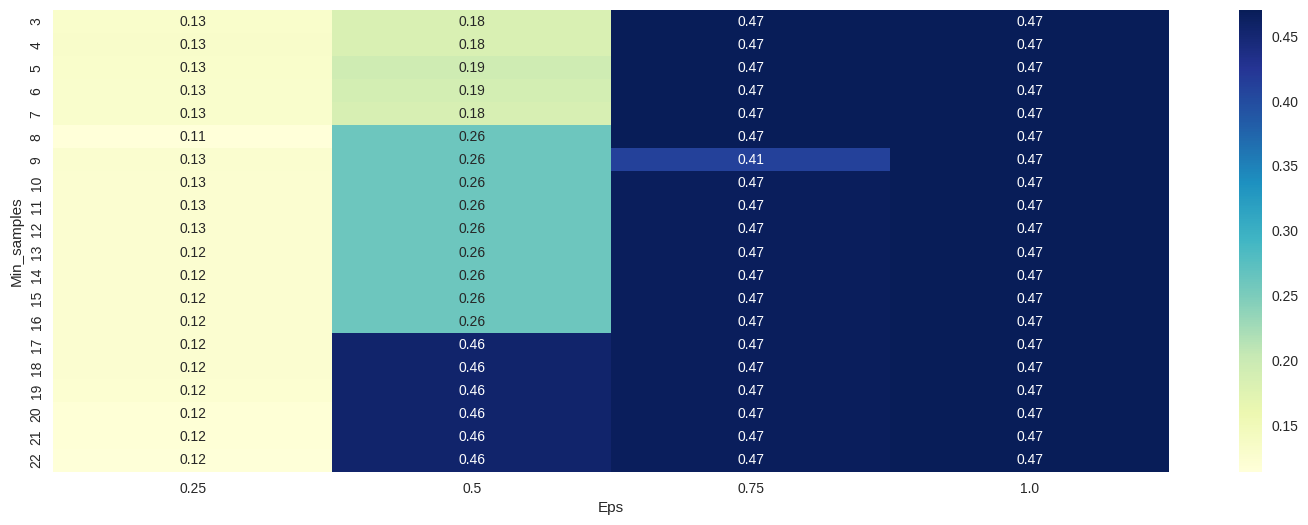

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

### **Global maximum is 0.54 for eps=1.0 and min_samples=from 22 to 3**

In [ ]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1 
min_sample= 11 
number of clusters= 2 
average silhouette score= 0.4702


In [ ]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [3,4,5,6,7,8,9,10,11]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.75 
min_sample= 3 
number of clusters= 2 
average silhouette score= 0.4702


### **Run DBSCAN on MinMax Scaled data with optimal min_sample and epsilon values**

In [ ]:
dbscan = DBSCAN(eps=1, min_samples=22) # min_samples = number of clumns * 3
dbscan.fit(minmax_df)

DBSCAN(eps=1, min_samples=22)

In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# -1 are the noise points in our dataset and the rest are the clusters
# Concating Labels with main dataset copy

data['DBSCAN_labels'] = dbscan.labels_
data.head()

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  1   28143    0           1          1          1          174           
1  2   19244    0           1          1          1          215           
2  3   41354    0           1          1          1          4123          
3  4   14776    0           1          1          1          500           
4  5   97752    0           4          1          1          43300         

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
0  1            0                  0                7000               0       
1  2            0                  0                6968               0       
2  4            0                  0                7034               0       
3  1            0                  0                6952               0       
4  26           2077               4                6935               1       

   Kmeans_label  Hierarchical_labels  DBSCAN_labels  
0  1             0                    0              
1  1             0                    0              
2  1             0                    0              
3  1             0                    0              
4  0             1                    1

In [ ]:
data.groupby('DBSCAN_labels').agg(['mean'])

ID       Balance  Qual_miles cc1_miles cc2_miles  \
                      mean          mean        mean      mean      mean   
DBSCAN_labels                                                              
0              2172.483512  59831.203814  87.637267   1.705602  1.013905   
1              1745.592843  97053.051317  240.196489  2.661715  1.015530   

              cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo  \
                   mean          mean        mean              mean   
DBSCAN_labels                                                         
0              1.008741  10231.752483  9.146603    226.382201         
1              1.018231  28905.414585  15.782579   857.501013         

              Flight_trans_12 Days_since_enroll Award Kmeans_label  \
                         mean              mean  mean         mean   
DBSCAN_labels                                                        
0              0.652761        3821.535558       0.0   1.0           
1              2.599595        4625.062120       1.0   0.0           

              Hierarchical_labels  
                             mean  
DBSCAN_labels                      
0              0.0                 
1              1.0

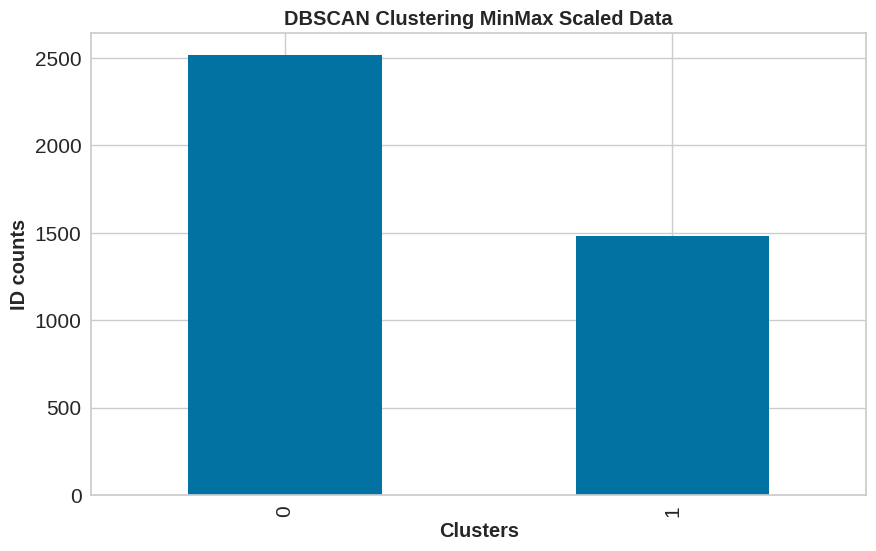

In [ ]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['DBSCAN_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

**Conclusion:**

In cluster number 0 & 1 there are more customers. Need to focus on cluster 0 & 1.

In [ ]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(data.loc[data.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(data.loc[data.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [ ]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

Cluster1_avg  Cluster2_avg
ID                   2172.483512   1745.592843 
Balance              59831.203814  97053.051317
Qual_miles           87.637267     240.196489  
cc1_miles            1.705602      2.661715    
cc2_miles            1.013905      1.015530    
cc3_miles            1.008741      1.018231    
Bonus_miles          10231.752483  28905.414585
Bonus_trans          9.146603      15.782579   
Flight_miles_12mo    226.382201    857.501013  
Flight_trans_12      0.652761      2.599595    
Days_since_enroll    3821.535558   4625.062120 
Award                0.000000      1.000000    
Kmeans_label         1.000000      0.000000    
Hierarchical_labels  0.000000      1.000000    
DBSCAN_labels        0.000000      1.000000

**Conclusion :**

As decided need to focous on first two clusters.. Considering past Award status(0 or 1) cluster number2 shows award avg as 1 that means people awarded with scheme. Similarly for cluster number 2 award avg. is 0. Since avg is low that means now maximim award given to cluster number1 in the past. Need to add future schemes for cluster number two members on different bonus points & different card transaction bonus.

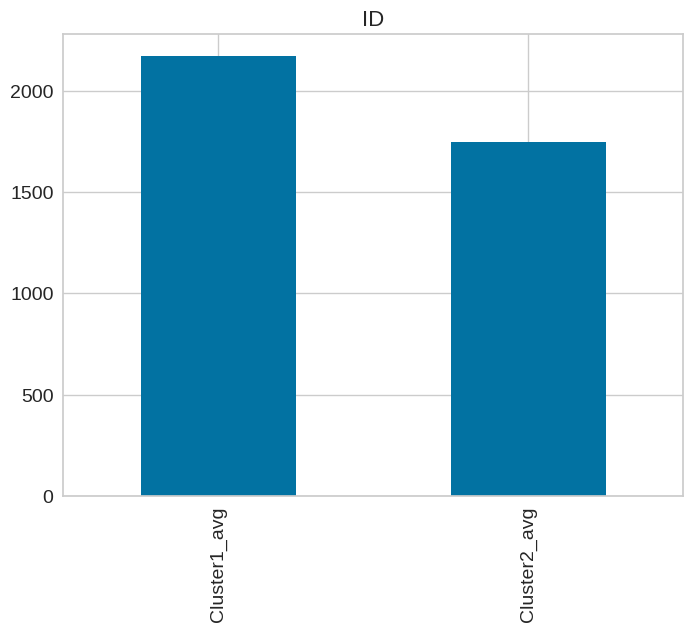

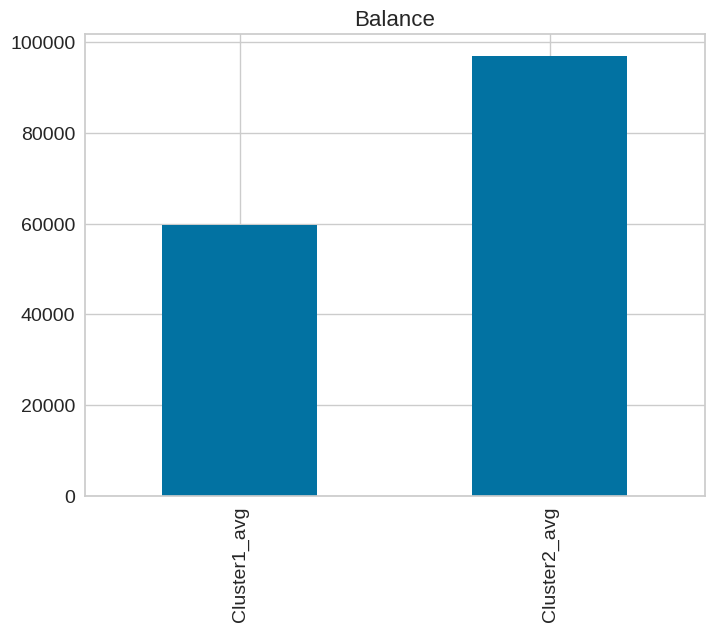

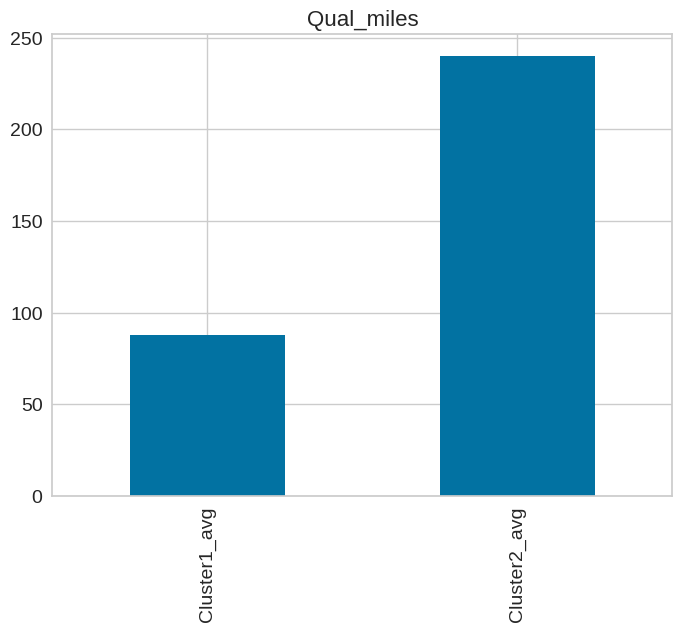

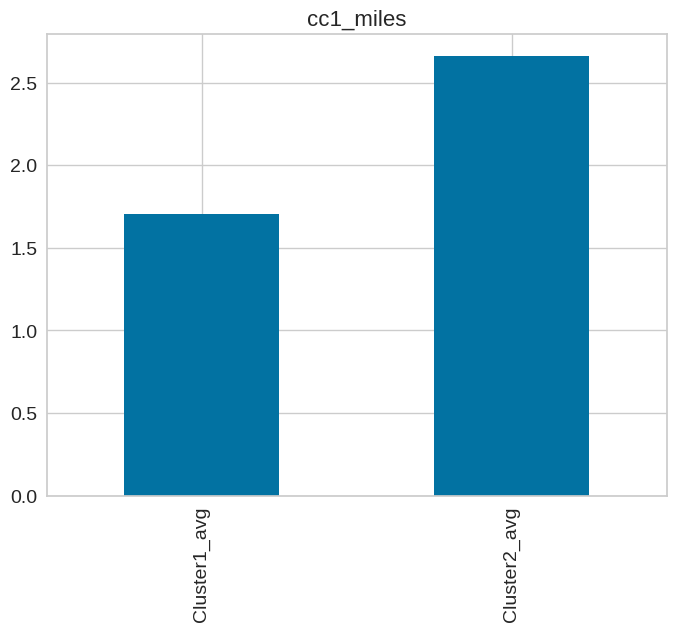

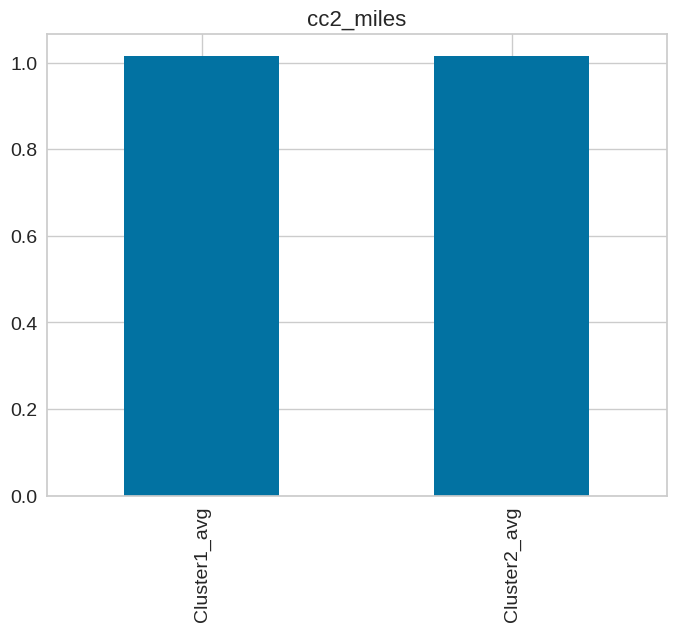

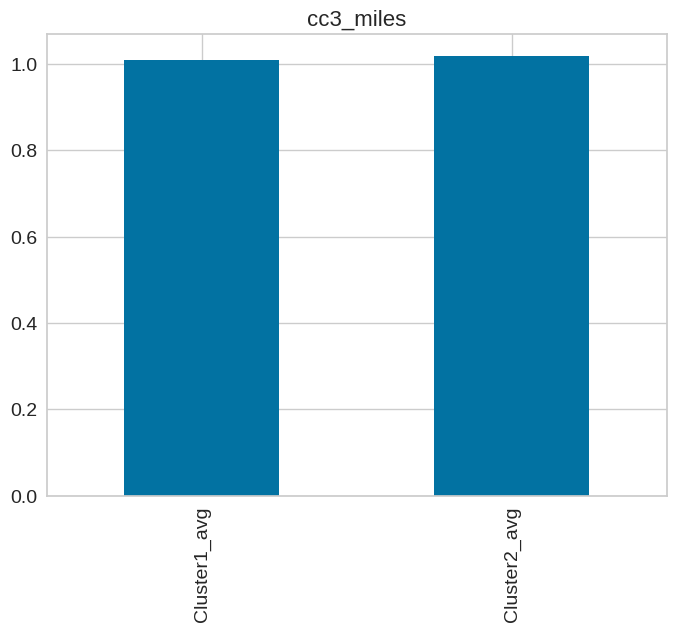

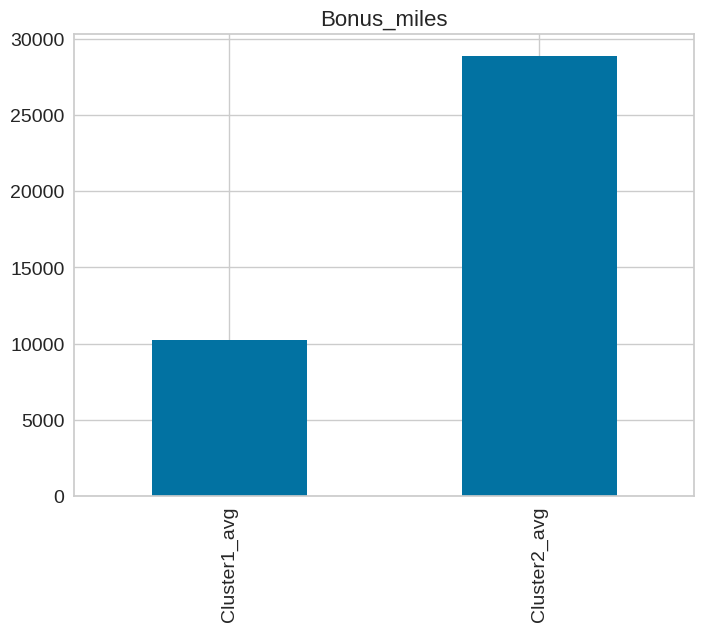

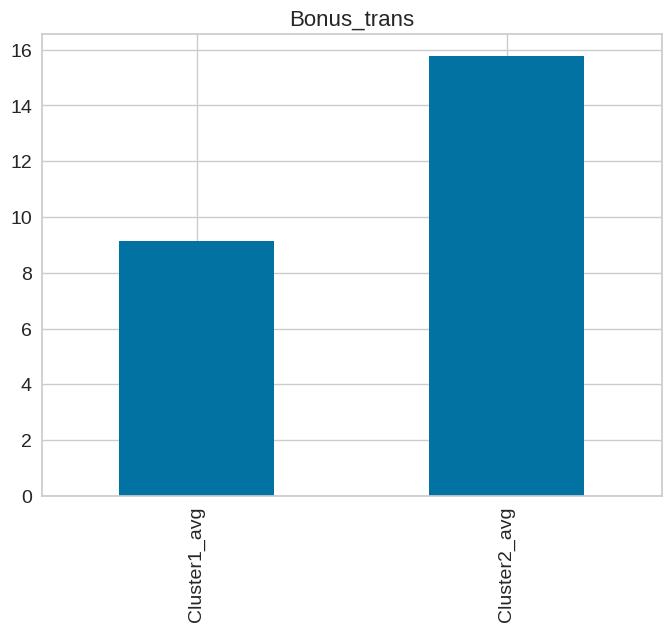

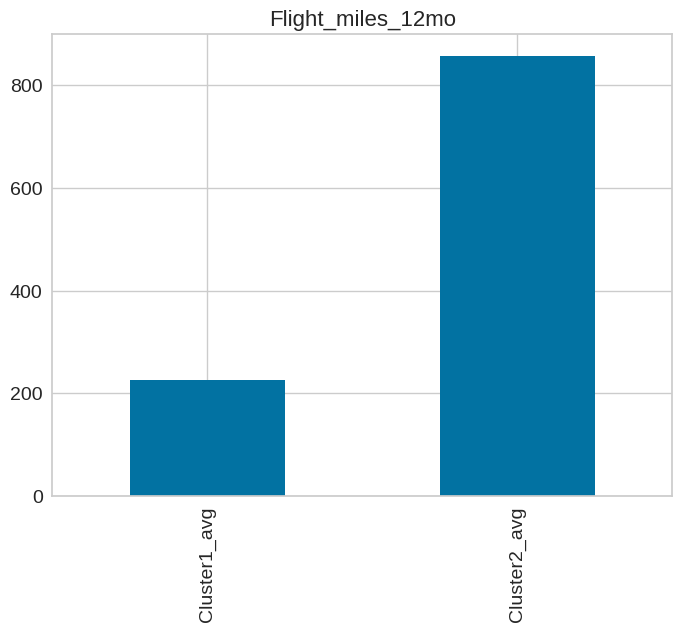

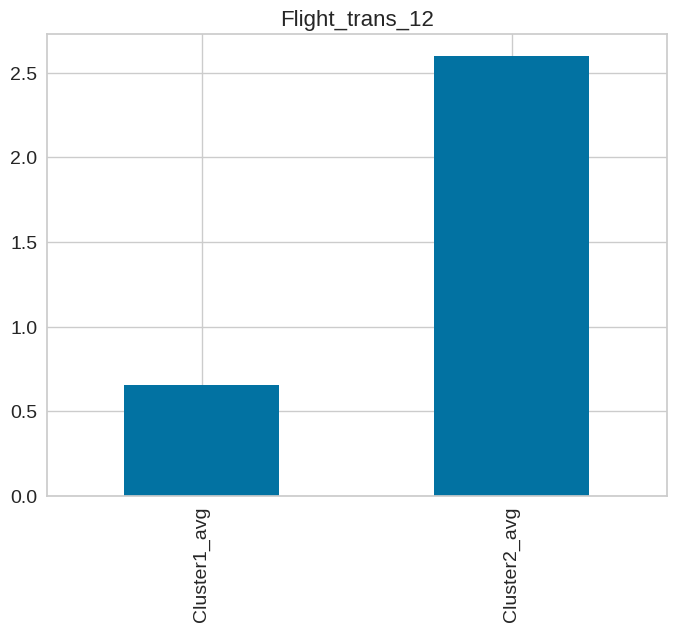

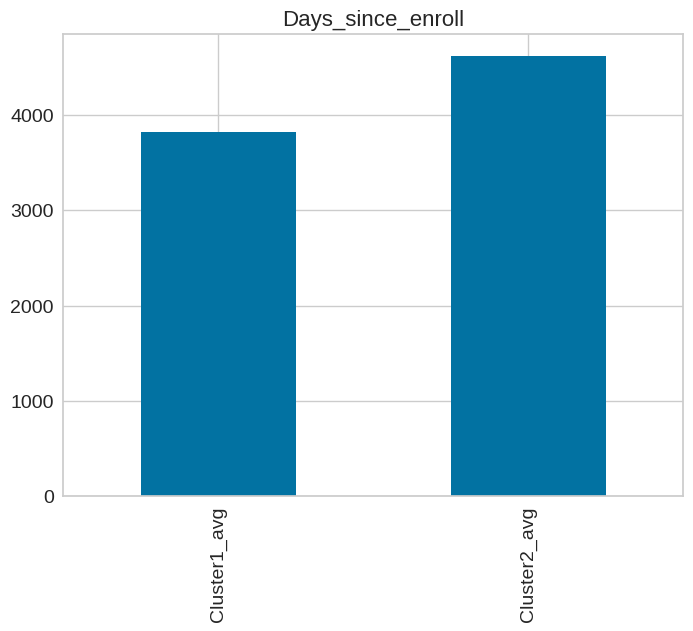

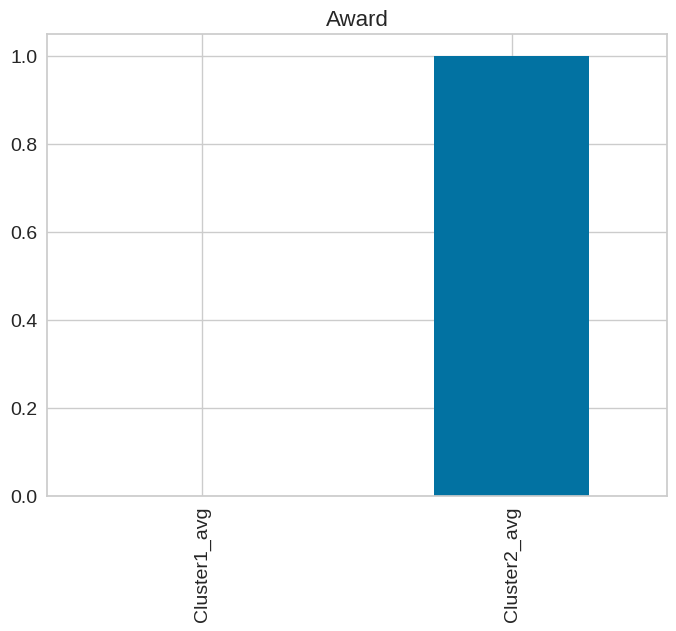

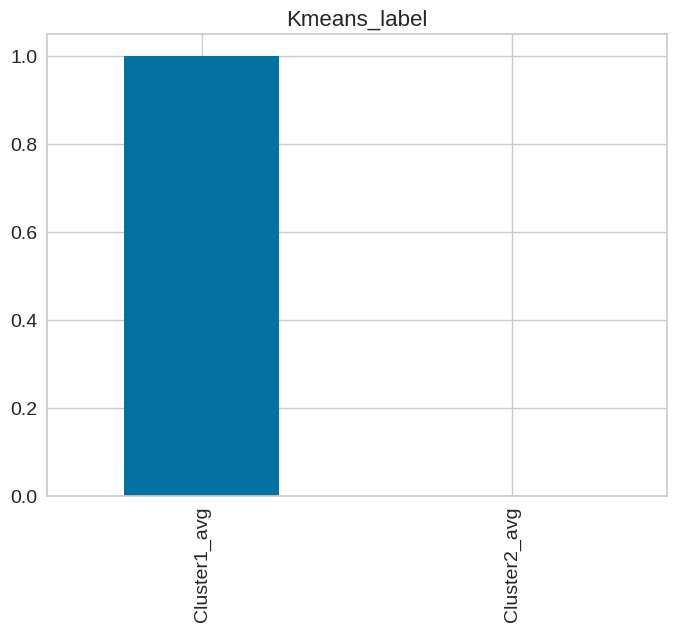

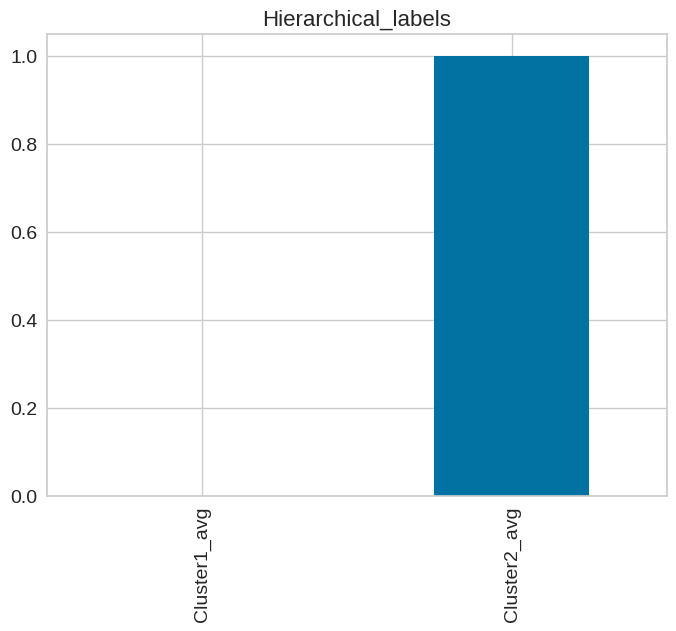

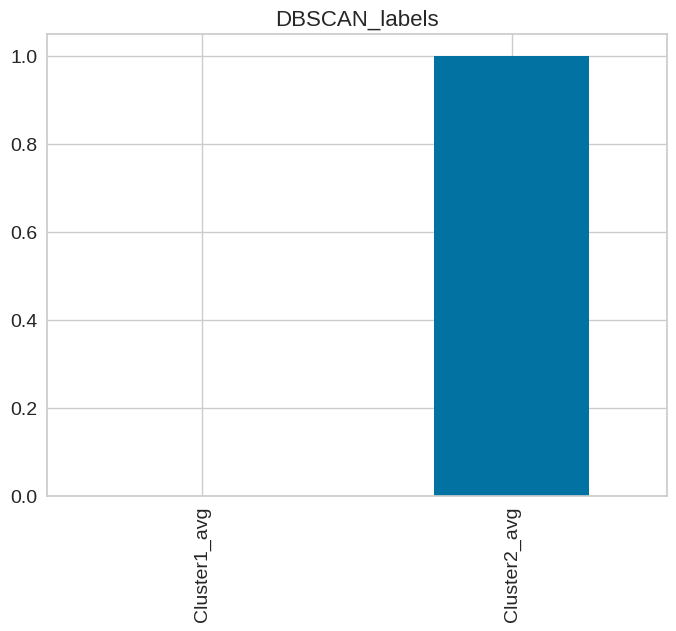

In [ ]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

**9. Conclusion:**

I have applied EDA to analyze dataset.Discovered correlation between diff variables and found colinearity.
Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively.
I have used & analyzed two clustering techniques here..i) KMeans, ii) Hierarchical Clusterig & iii) DBSCAN.
By applying clustering on diff. PCA obtained with diff transformation data shows fluctuation in model score. So finally the Standard Scaler found less score so not used for further model building.
KMeans clustering is sensitive to outliers

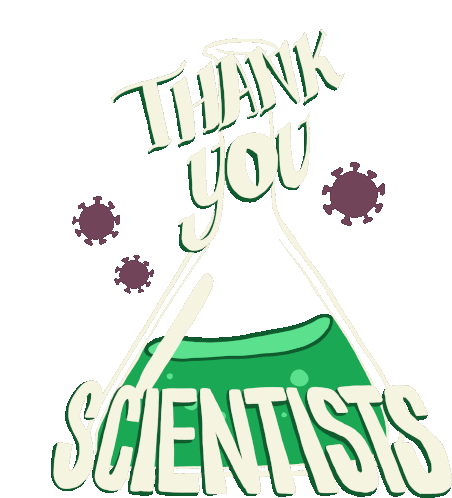